## Prerequisites


In [1]:
import dotenv

dotenv.load_dotenv()

True

In [2]:
project_names = [
    "gender_female",
    "gender_male",
    "language_de",
    "language_en",
    "language_es",
    "language_fr",
    "language_it",
    "language_ja",
    "language_pt",
]
encoder_ids = [
    ("mert_v1_95m", 768),
    ("whisper_large_v2", 1280),
    ("muq_large_msd", 1024),
    ("muq_mulan_large", 512),
]


## 1. Create CAVs using LogisticRegression for Significance Test


In [3]:
# training meta parameters
num_train_runs = 500
training_sample_frac = 0.25

### Prepare Data


In [4]:
import itertools
import os
import sys

import s3fs
from cavmir.utils import (
    create_in_memory_test_dataloader,
    lda_one_cav,
    load_df_and_embeddings,
    store_cav_vector_array,
    store_evaluation_metrics,
    train_one_cav,
)

s3 = s3fs.S3FileSystem(anon=False)

dataset_prefix = os.environ["DATASET_PREFIX"]
embedding_prefix = os.environ["EMBEDDING_PREFIX"]


### Training


In [5]:
train_variations = [*itertools.product(project_names, encoder_ids)]


for project_name, (encoder_id, embedding_dim) in train_variations:
    print(f"\nFitting project: {project_name} for encoder: {encoder_id}")
    df = load_df_and_embeddings(
        project_name, "train", encoder_id, dataset_prefix, embedding_prefix, s3
    )

    df_test = load_df_and_embeddings(
        project_name, "test", encoder_id, dataset_prefix, embedding_prefix, s3
    )

    test_dataloader = create_in_memory_test_dataloader(df_test)

    training_sample_size = int(len(df) * training_sample_frac)
    print(f"Training sample size: {training_sample_size}")

    cav_vectors = []
    evaluation_metrics = []

    for i in range(num_train_runs):
        sys.stdout.write(f"\rIteration {i + 1}/{num_train_runs}")

        cav_vector, evaluation_metric = lda_one_cav(
            random_state=i,
            df=df,
            project_name=project_name,
            training_sample_size=training_sample_size,
            embedding_dim=embedding_dim,
            test_dataloader=test_dataloader,
            plot_evaluation=False,
        )

        cav_vectors.append(cav_vector)
        evaluation_metrics.append(evaluation_metric)

    store_cav_vector_array(
        cav_vectors, f"cav_ttest_{project_name}.npy", encoder_id, project_name
    )
    store_evaluation_metrics(
        evaluation_metrics,
        f"evaluation_metrics_ttest_{project_name}.json",
        encoder_id,
        project_name,
    )



Fitting project: gender_female for encoder: mert_v1_95m
Training sample size: 548
Iteration 500/500
Fitting project: gender_female for encoder: whisper_large_v2
Training sample size: 548
Iteration 500/500
Fitting project: gender_female for encoder: muq_large_msd
Training sample size: 548
Iteration 500/500
Fitting project: gender_female for encoder: muq_mulan_large
Training sample size: 548
Iteration 500/500
Fitting project: gender_male for encoder: mert_v1_95m
Training sample size: 548
Iteration 500/500
Fitting project: gender_male for encoder: whisper_large_v2
Training sample size: 548
Iteration 500/500
Fitting project: gender_male for encoder: muq_large_msd
Training sample size: 548
Iteration 500/500
Fitting project: gender_male for encoder: muq_mulan_large
Training sample size: 548
Iteration 500/500
Fitting project: language_de for encoder: mert_v1_95m
Training sample size: 106
Iteration 500/500
Fitting project: language_de for encoder: whisper_large_v2
Training sample size: 106
It

## 2. Train CAV for Qualitative Tests


In [ ]:
train_val_split = 0.9

# training parameters
epochs = 10000
learning_rate = 0.005
dropout_rate = 0.0

### Prepare Data


In [ ]:
import itertools
import os

import s3fs
from cavmir.utils import (
    store_cav_vector_array,
    store_evaluation_metrics,
    train_one_cav,
    load_df_and_embeddings,
)

s3 = s3fs.S3FileSystem(anon=False)

dataset_prefix = os.environ["DATASET_PREFIX"]
embedding_prefix = os.environ["EMBEDDING_PREFIX"]


### Training



Fitting project: gender_female for encoder: mert_v1_95m
Epoch 1/10000
Epoch 1 Train Loss: 0.7018
Epoch 1 Validation Loss: 0.6929
Model saved to trainings/gender_female/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.4043
Epoch 101 Validation Loss: 0.4269
Model saved to trainings/gender_female/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.3483
Epoch 201 Validation Loss: 0.3984
Model saved to trainings/gender_female/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.3208
Epoch 301 Validation Loss: 0.3911
Model saved to trainings/gender_female/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.3056
Epoch 401 Validation Loss: 0.3893
Early stopping at epoch 401
Loss history saved to trainings/gender_female/loss_history.json


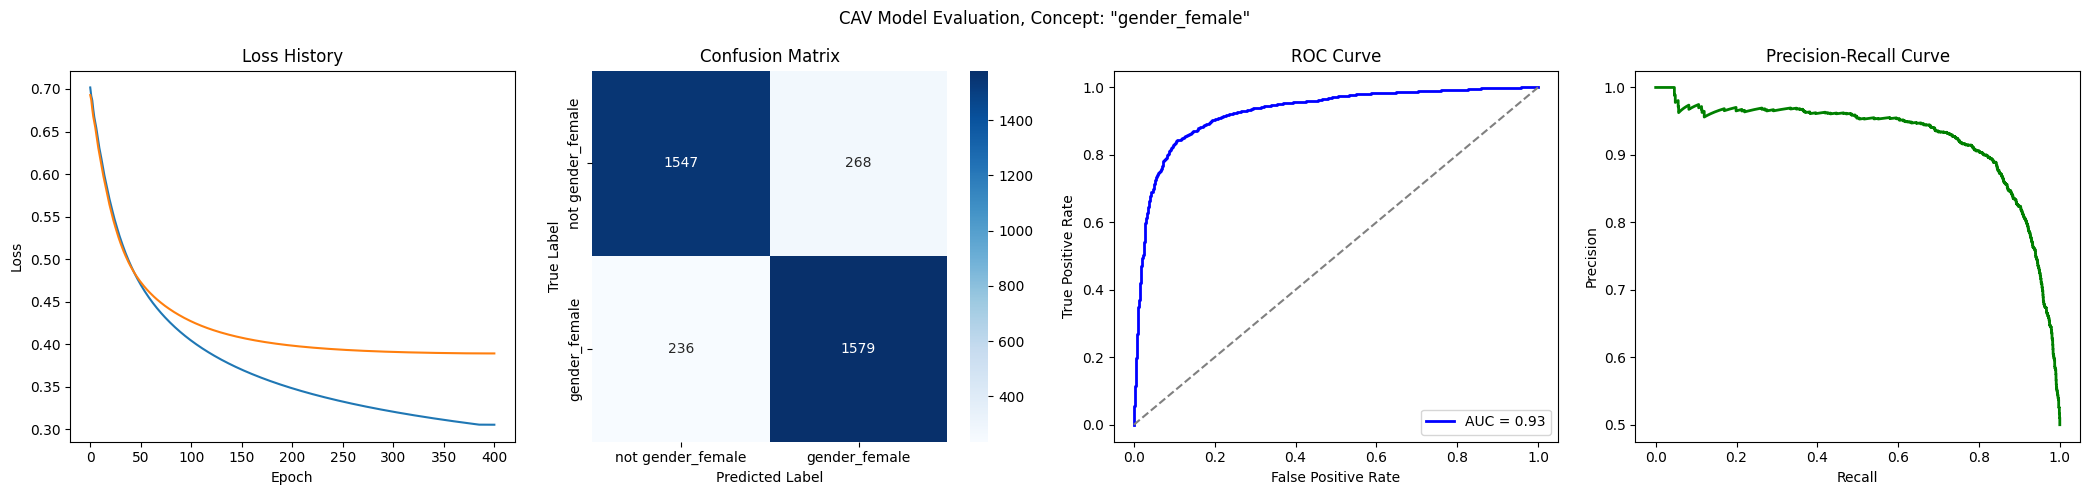


Fitting project: gender_female for encoder: whisper_large_v2
Epoch 1/10000
Epoch 1 Train Loss: 0.6909
Epoch 1 Validation Loss: 0.6793
Model saved to trainings/gender_female/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.4226
Epoch 101 Validation Loss: 0.4590
Model saved to trainings/gender_female/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.3348
Epoch 201 Validation Loss: 0.3917
Model saved to trainings/gender_female/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.2906
Epoch 301 Validation Loss: 0.3639
Model saved to trainings/gender_female/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.2627
Epoch 401 Validation Loss: 0.3502
Model saved to trainings/gender_female/state_dict.pth
Epoch 501/10000
Epoch 501 Train Loss: 0.2425
Epoch 501 Validation Loss: 0.3430
Model saved to trainings/gender_female/state_dict.pth
Epoch 601/10000
Epoch 601 Train Loss: 0.2267
Epoch 601 Validation Loss: 0.3393
Model saved to trainings/gender_female/state_dict.pth
Epoch 701/100

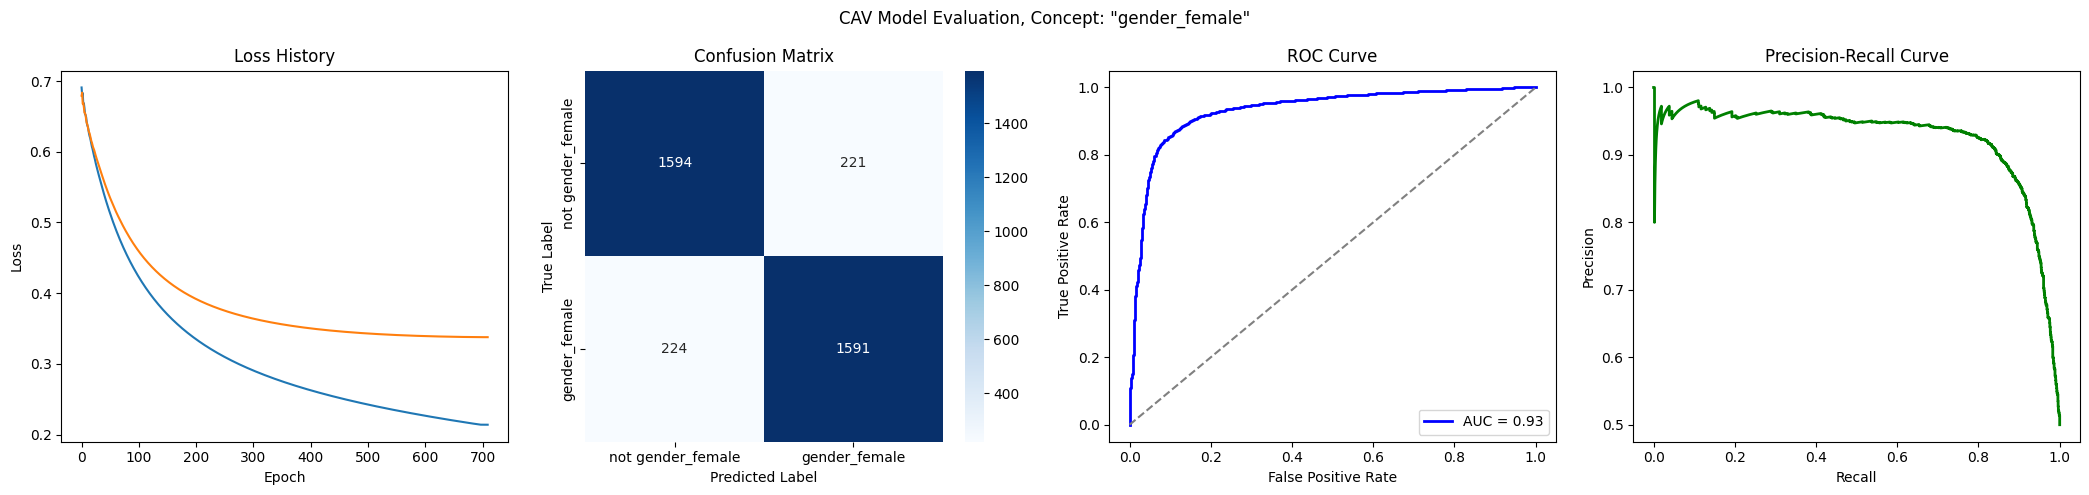


Fitting project: gender_female for encoder: muq_large_msd
Epoch 1/10000
Epoch 1 Train Loss: 0.7024
Epoch 1 Validation Loss: 0.6831
Model saved to trainings/gender_female/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.2840
Epoch 101 Validation Loss: 0.3789
Model saved to trainings/gender_female/state_dict.pth
Early stopping at epoch 159
Loss history saved to trainings/gender_female/loss_history.json


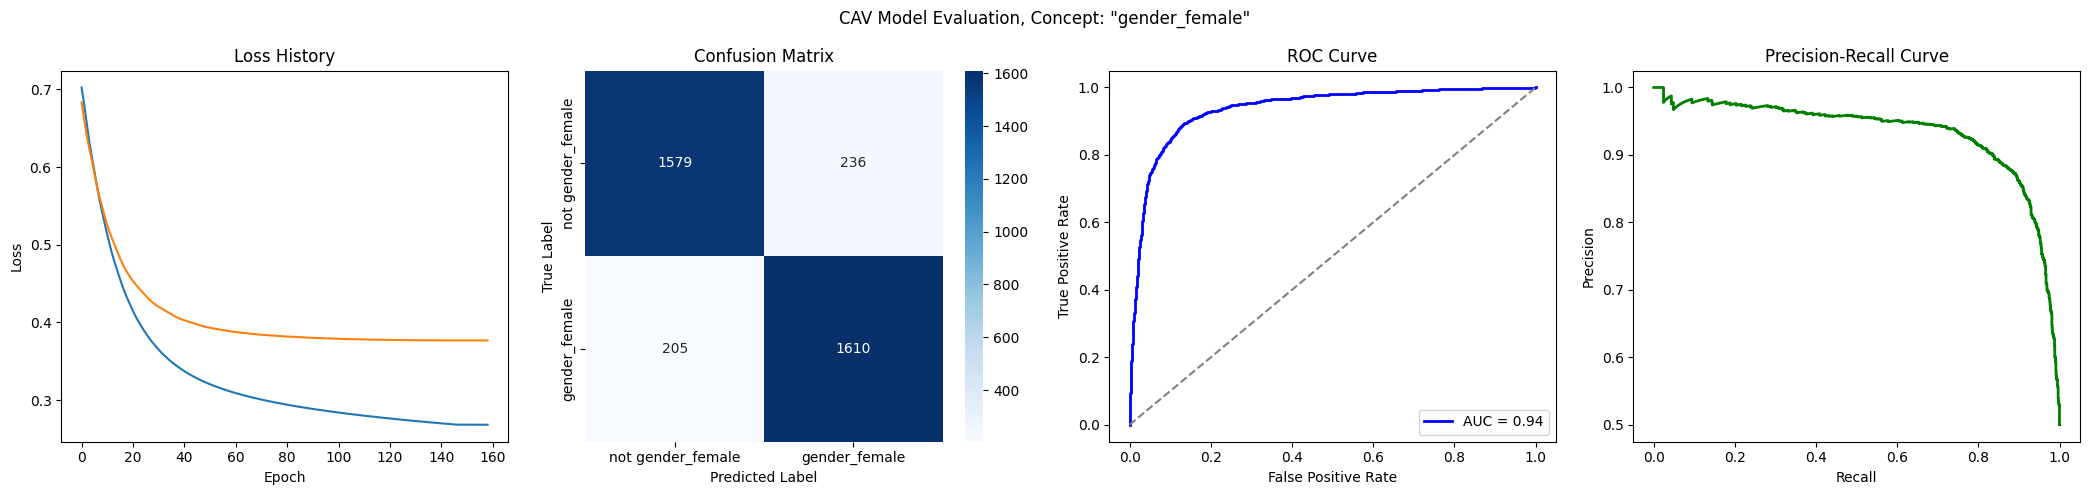


Fitting project: gender_female for encoder: muq_mulan_large
Epoch 1/10000
Epoch 1 Train Loss: 0.6931
Epoch 1 Validation Loss: 0.6904
Model saved to trainings/gender_female/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.6050
Epoch 101 Validation Loss: 0.6084
Model saved to trainings/gender_female/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.5817
Epoch 201 Validation Loss: 0.5921
Model saved to trainings/gender_female/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.5669
Epoch 301 Validation Loss: 0.5809
Model saved to trainings/gender_female/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.5551
Epoch 401 Validation Loss: 0.5716
Model saved to trainings/gender_female/state_dict.pth
Epoch 501/10000
Epoch 501 Train Loss: 0.5447
Epoch 501 Validation Loss: 0.5633
Model saved to trainings/gender_female/state_dict.pth
Epoch 601/10000
Epoch 601 Train Loss: 0.5352
Epoch 601 Validation Loss: 0.5557
Model saved to trainings/gender_female/state_dict.pth
Epoch 701/1000

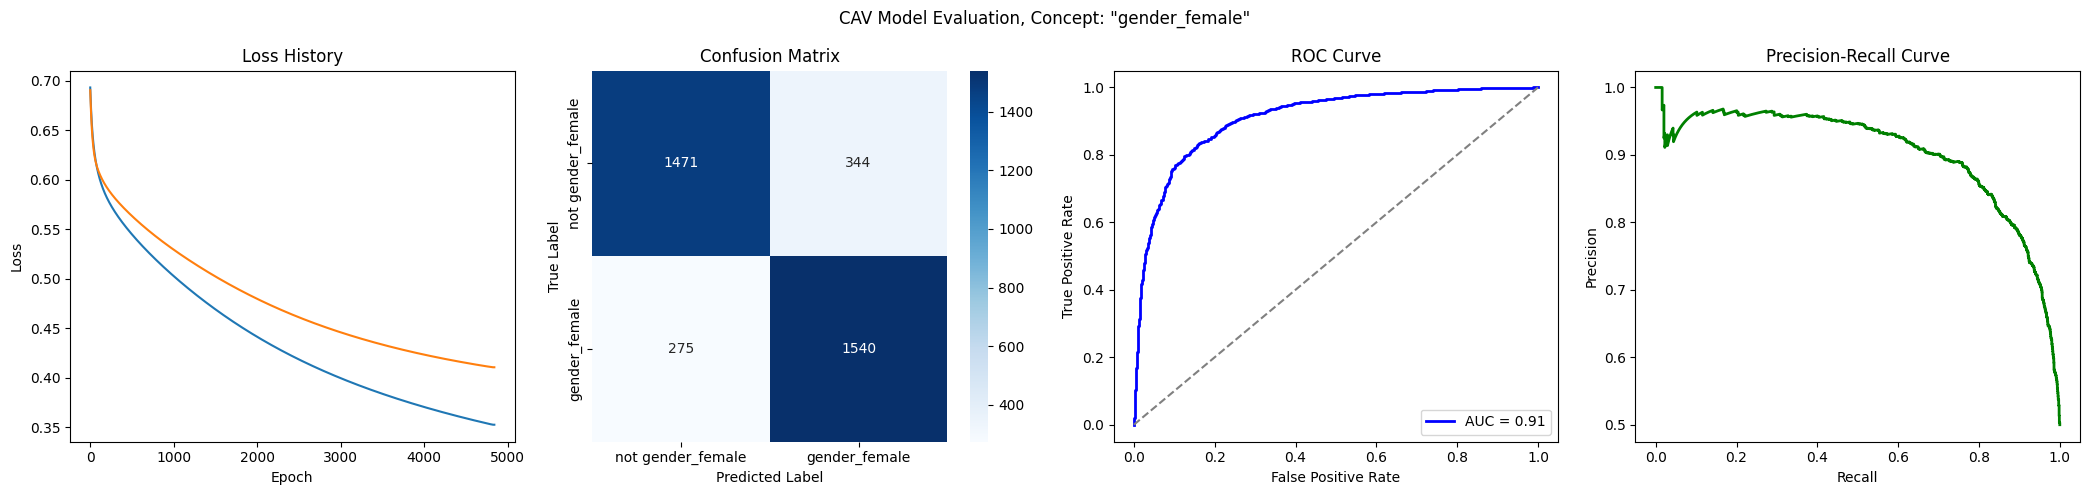


Fitting project: gender_male for encoder: mert_v1_95m
Epoch 1/10000
Epoch 1 Train Loss: 0.6987
Epoch 1 Validation Loss: 0.6906
Model saved to trainings/gender_male/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.3916
Epoch 101 Validation Loss: 0.4328
Model saved to trainings/gender_male/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.3353
Epoch 201 Validation Loss: 0.3935
Model saved to trainings/gender_male/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.3076
Epoch 301 Validation Loss: 0.3782
Model saved to trainings/gender_male/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.2899
Epoch 401 Validation Loss: 0.3712
Model saved to trainings/gender_male/state_dict.pth
Epoch 501/10000
Epoch 501 Train Loss: 0.2771
Epoch 501 Validation Loss: 0.3679
Model saved to trainings/gender_male/state_dict.pth
Epoch 601/10000
Epoch 601 Train Loss: 0.2682
Epoch 601 Validation Loss: 0.3666
Model saved to trainings/gender_male/state_dict.pth
Early stopping at epoch 611
Loss h

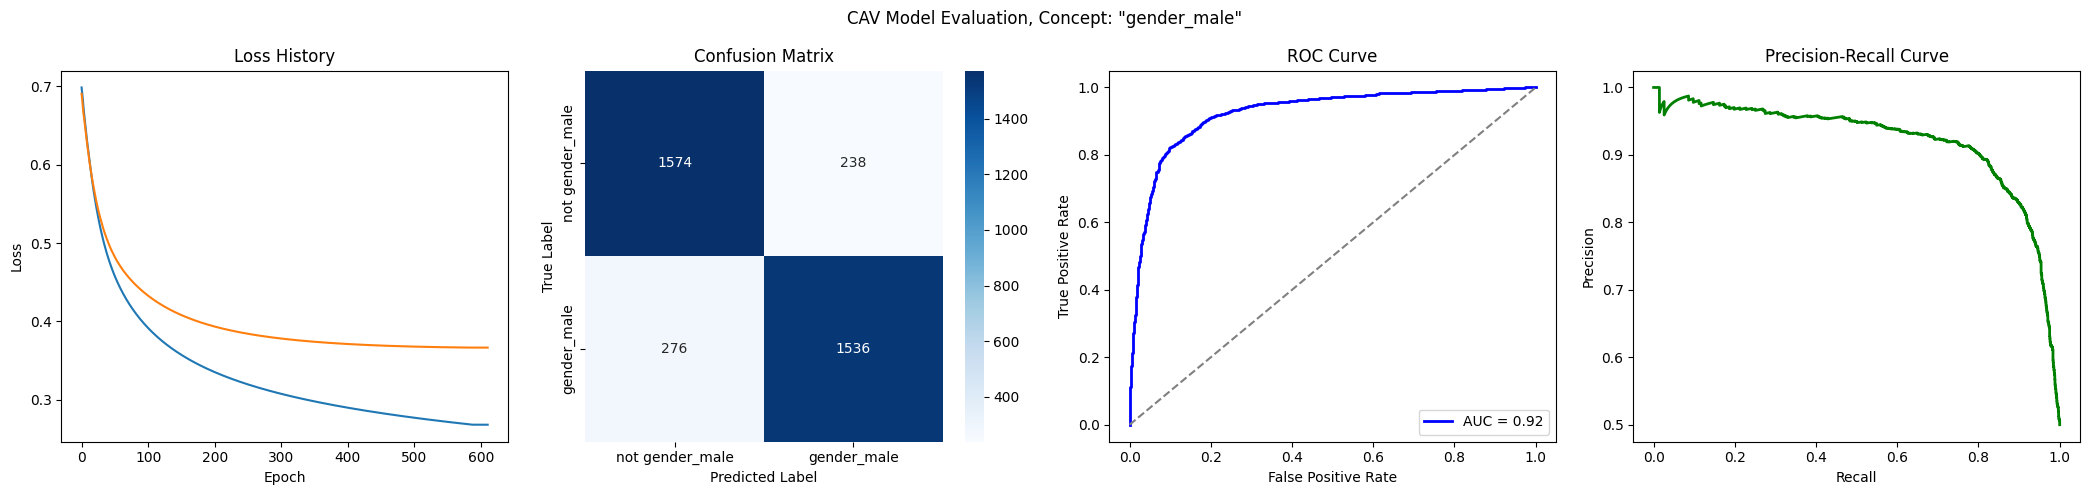


Fitting project: gender_male for encoder: whisper_large_v2
Epoch 1/10000
Epoch 1 Train Loss: 0.6967
Epoch 1 Validation Loss: 0.6960
Model saved to trainings/gender_male/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.4197
Epoch 101 Validation Loss: 0.4510
Model saved to trainings/gender_male/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.3310
Epoch 201 Validation Loss: 0.3749
Model saved to trainings/gender_male/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.2868
Epoch 301 Validation Loss: 0.3406
Model saved to trainings/gender_male/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.2589
Epoch 401 Validation Loss: 0.3216
Model saved to trainings/gender_male/state_dict.pth
Epoch 501/10000
Epoch 501 Train Loss: 0.2388
Epoch 501 Validation Loss: 0.3104
Model saved to trainings/gender_male/state_dict.pth
Epoch 601/10000
Epoch 601 Train Loss: 0.2230
Epoch 601 Validation Loss: 0.3035
Model saved to trainings/gender_male/state_dict.pth
Epoch 701/10000
Epoch 701 Tra

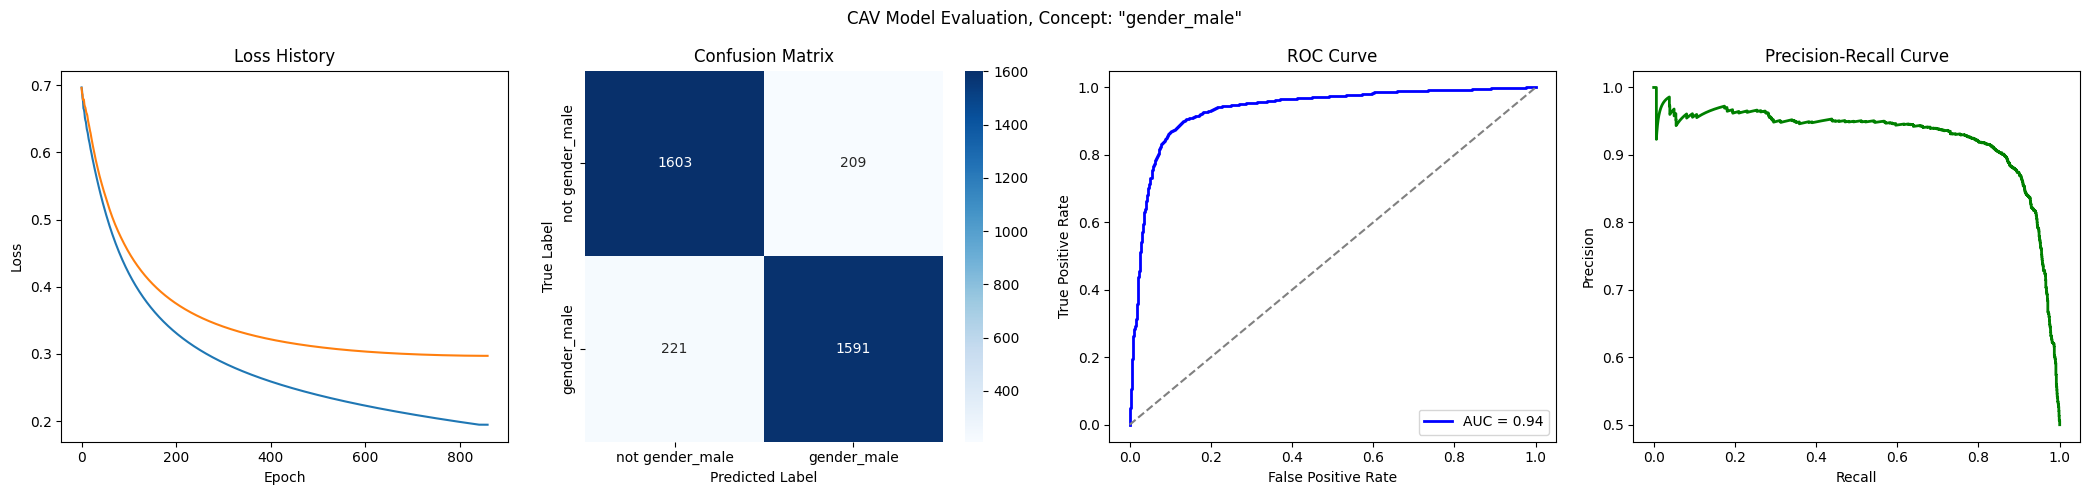


Fitting project: gender_male for encoder: muq_large_msd
Epoch 1/10000
Epoch 1 Train Loss: 0.7027
Epoch 1 Validation Loss: 0.6770
Model saved to trainings/gender_male/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.2753
Epoch 101 Validation Loss: 0.3070
Model saved to trainings/gender_male/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.2468
Epoch 201 Validation Loss: 0.2991
Model saved to trainings/gender_male/state_dict.pth
Early stopping at epoch 237
Loss history saved to trainings/gender_male/loss_history.json


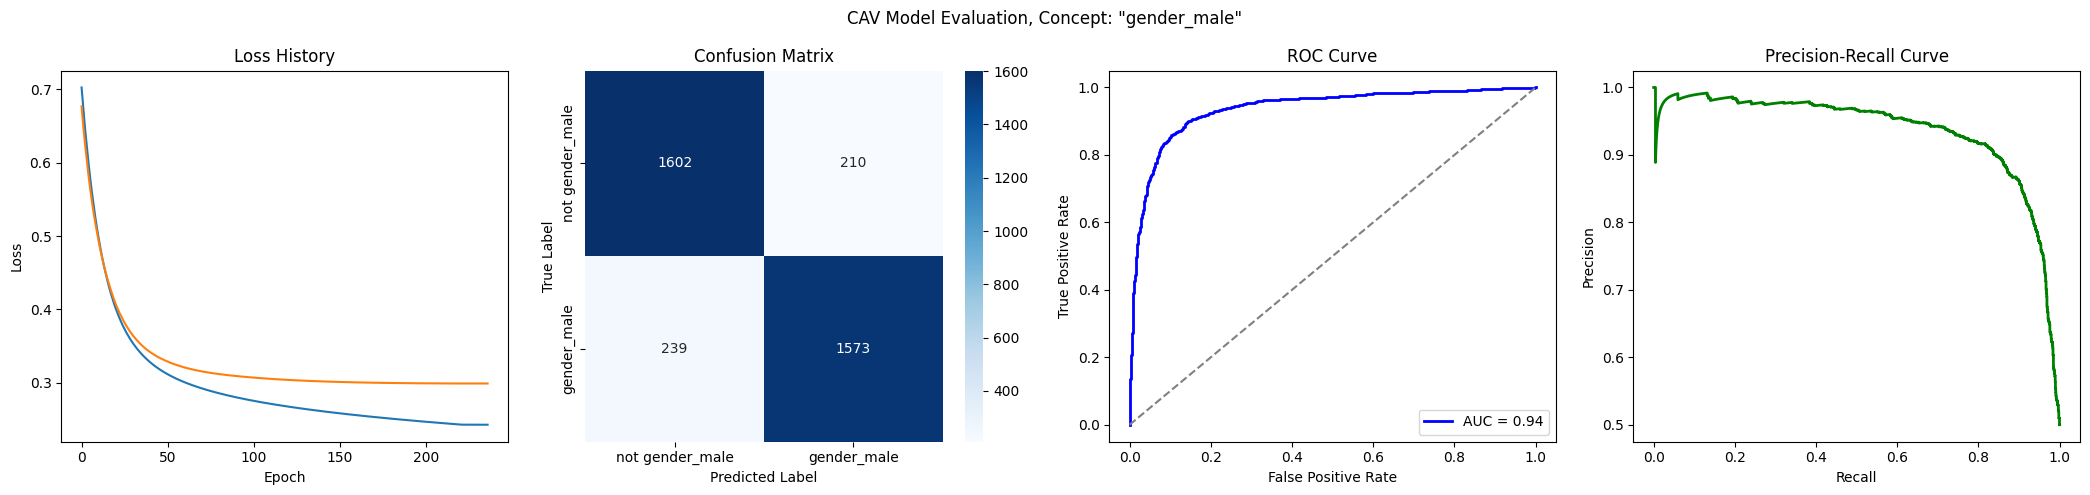


Fitting project: gender_male for encoder: muq_mulan_large
Epoch 1/10000
Epoch 1 Train Loss: 0.6924
Epoch 1 Validation Loss: 0.6898
Model saved to trainings/gender_male/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.5993
Epoch 101 Validation Loss: 0.6212
Model saved to trainings/gender_male/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.5745
Epoch 201 Validation Loss: 0.6054
Model saved to trainings/gender_male/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.5594
Epoch 301 Validation Loss: 0.5941
Model saved to trainings/gender_male/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.5480
Epoch 401 Validation Loss: 0.5845
Model saved to trainings/gender_male/state_dict.pth
Epoch 501/10000
Epoch 501 Train Loss: 0.5383
Epoch 501 Validation Loss: 0.5756
Model saved to trainings/gender_male/state_dict.pth
Epoch 601/10000
Epoch 601 Train Loss: 0.5296
Epoch 601 Validation Loss: 0.5671
Model saved to trainings/gender_male/state_dict.pth
Epoch 701/10000
Epoch 701 Trai

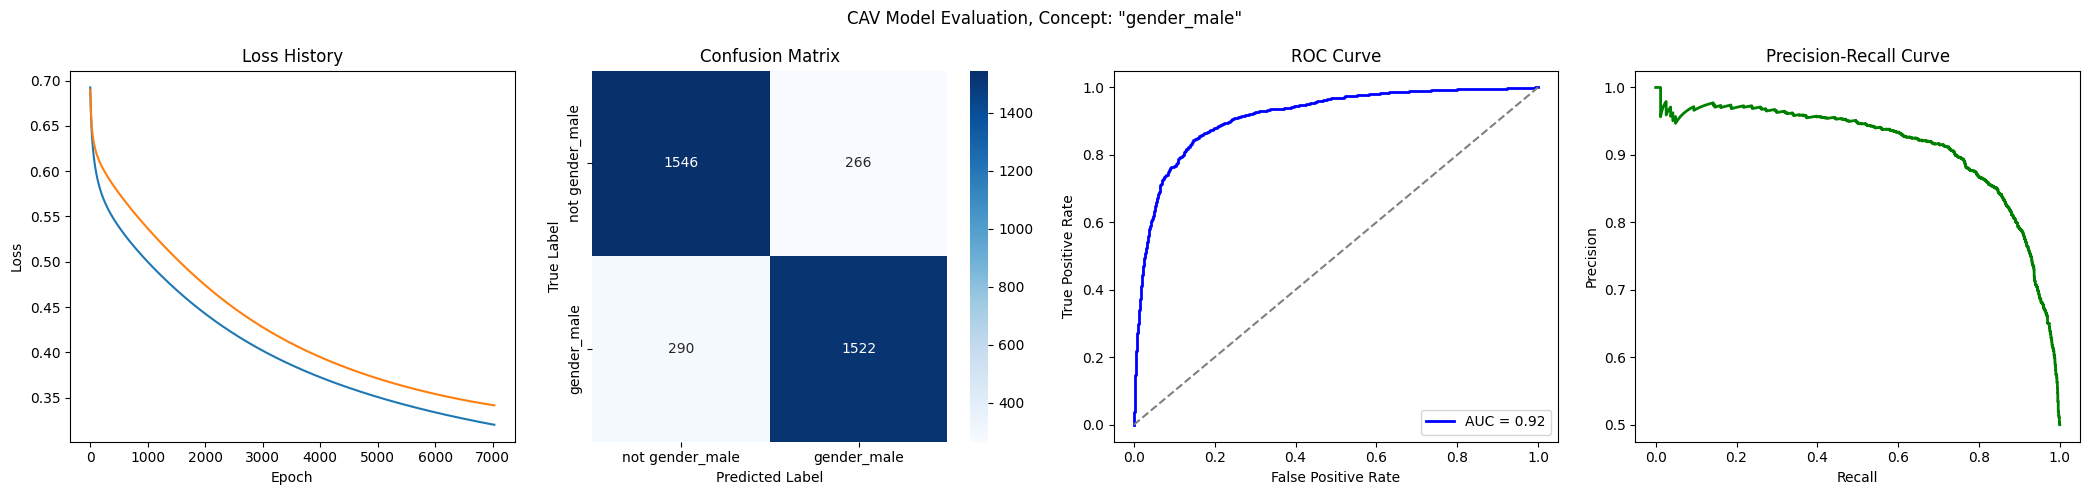


Fitting project: language_de for encoder: mert_v1_95m
Epoch 1/10000
Epoch 1 Train Loss: 0.6975
Epoch 1 Validation Loss: 0.6900
Model saved to trainings/language_de/state_dict.pth
Early stopping at epoch 41
Loss history saved to trainings/language_de/loss_history.json


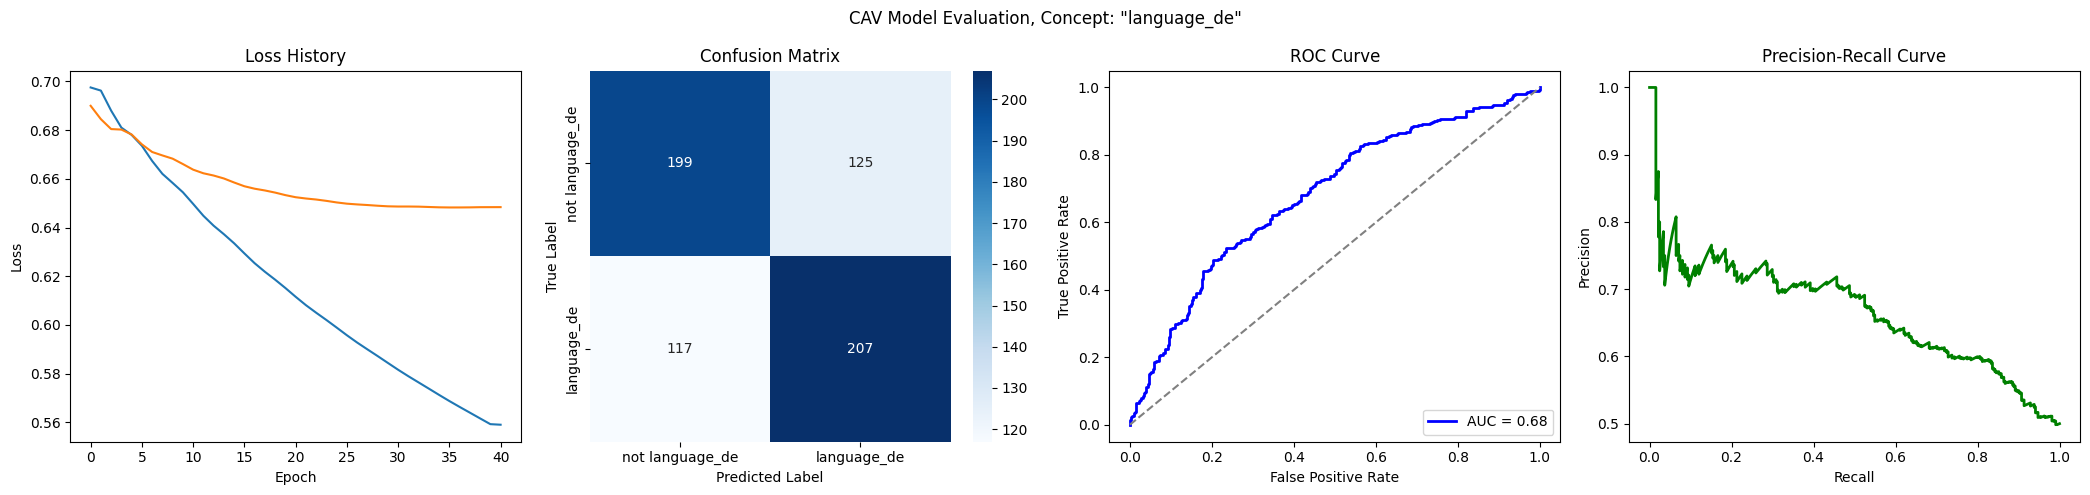


Fitting project: language_de for encoder: whisper_large_v2
Epoch 1/10000
Epoch 1 Train Loss: 0.7034
Epoch 1 Validation Loss: 0.6545
Model saved to trainings/language_de/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.0608
Epoch 101 Validation Loss: 0.0479
Model saved to trainings/language_de/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.0354
Epoch 201 Validation Loss: 0.0369
Model saved to trainings/language_de/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.0228
Epoch 301 Validation Loss: 0.0309
Model saved to trainings/language_de/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.0157
Epoch 401 Validation Loss: 0.0263
Model saved to trainings/language_de/state_dict.pth
Epoch 501/10000
Epoch 501 Train Loss: 0.0115
Epoch 501 Validation Loss: 0.0227
Model saved to trainings/language_de/state_dict.pth
Epoch 601/10000
Epoch 601 Train Loss: 0.0088
Epoch 601 Validation Loss: 0.0201
Model saved to trainings/language_de/state_dict.pth
Epoch 701/10000
Epoch 701 Tra

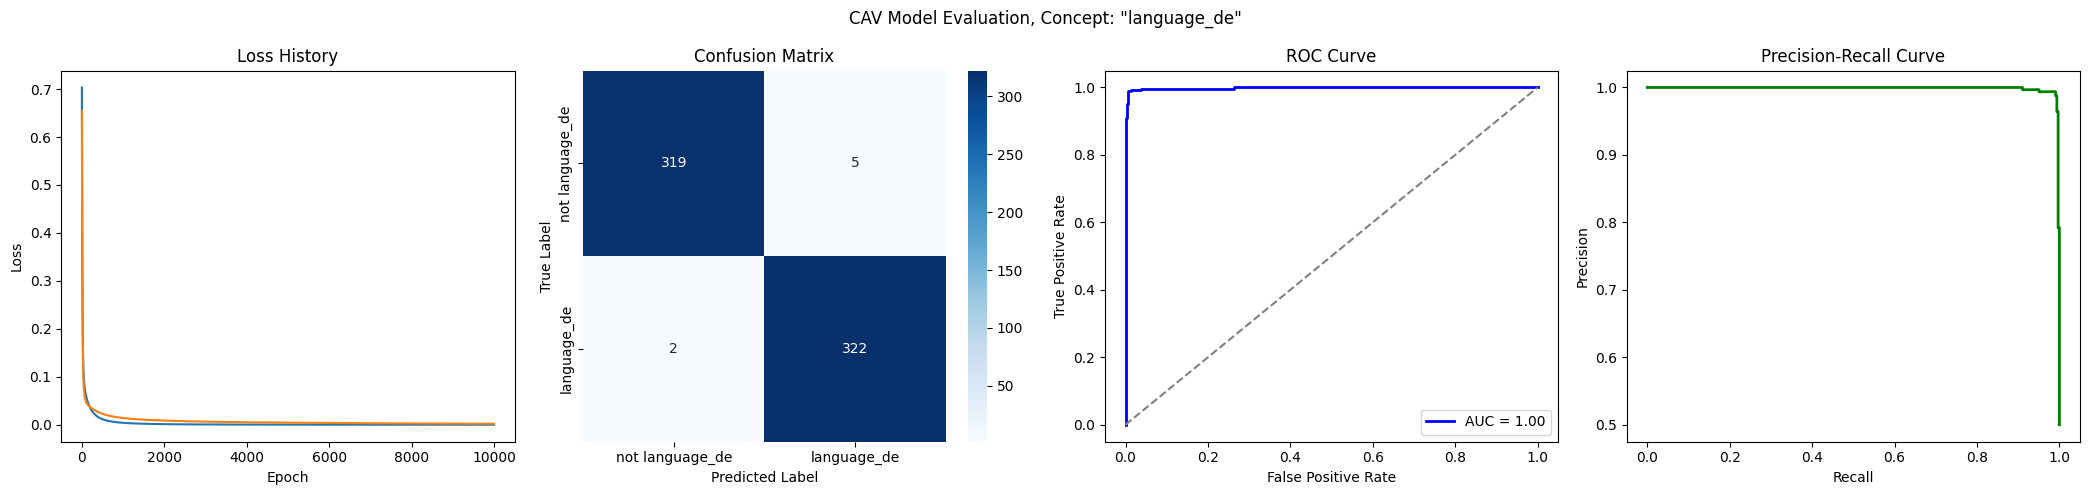


Fitting project: language_de for encoder: muq_large_msd
Epoch 1/10000
Epoch 1 Train Loss: 0.6983
Epoch 1 Validation Loss: 0.6729
Model saved to trainings/language_de/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.1773
Epoch 101 Validation Loss: 0.4089
Model saved to trainings/language_de/state_dict.pth
Early stopping at epoch 148
Loss history saved to trainings/language_de/loss_history.json


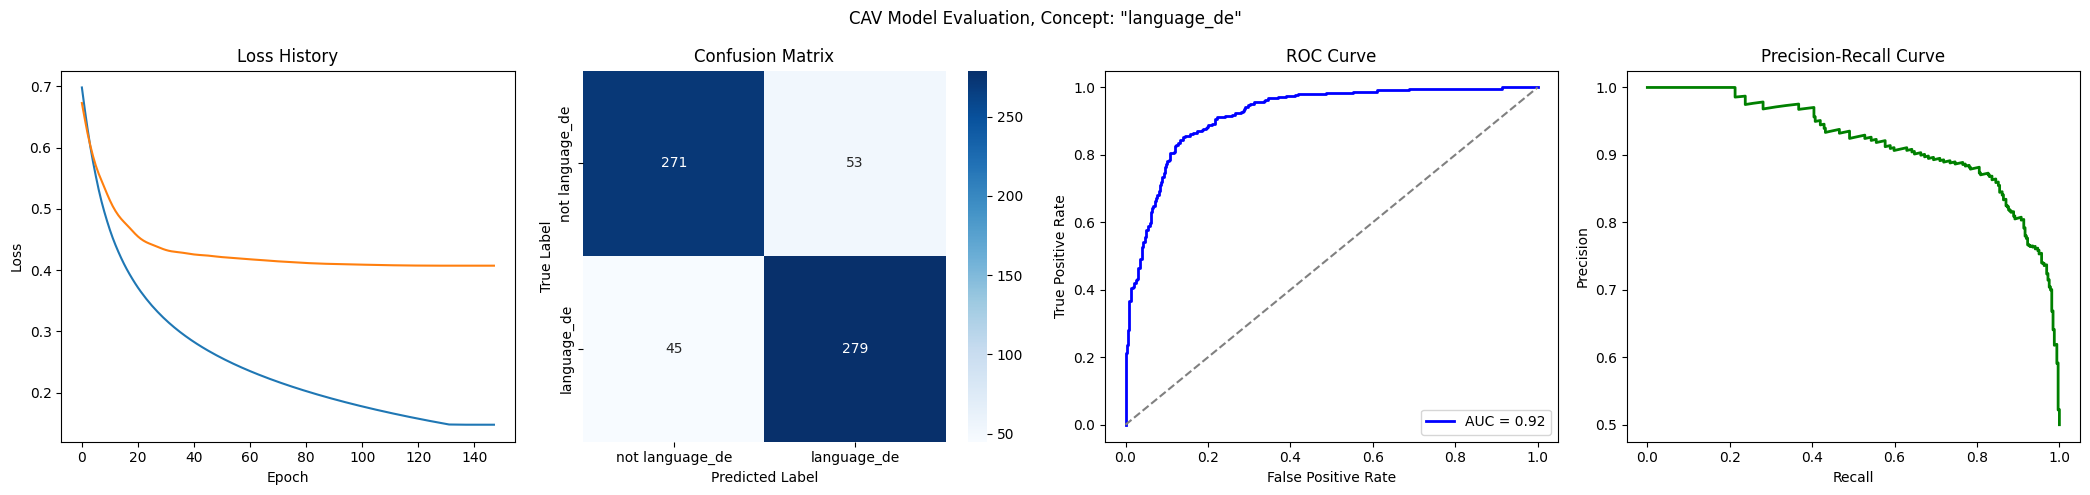


Fitting project: language_de for encoder: muq_mulan_large
Epoch 1/10000
Epoch 1 Train Loss: 0.6921
Epoch 1 Validation Loss: 0.6869
Model saved to trainings/language_de/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.5248
Epoch 101 Validation Loss: 0.5613
Model saved to trainings/language_de/state_dict.pth
Early stopping at epoch 169
Loss history saved to trainings/language_de/loss_history.json


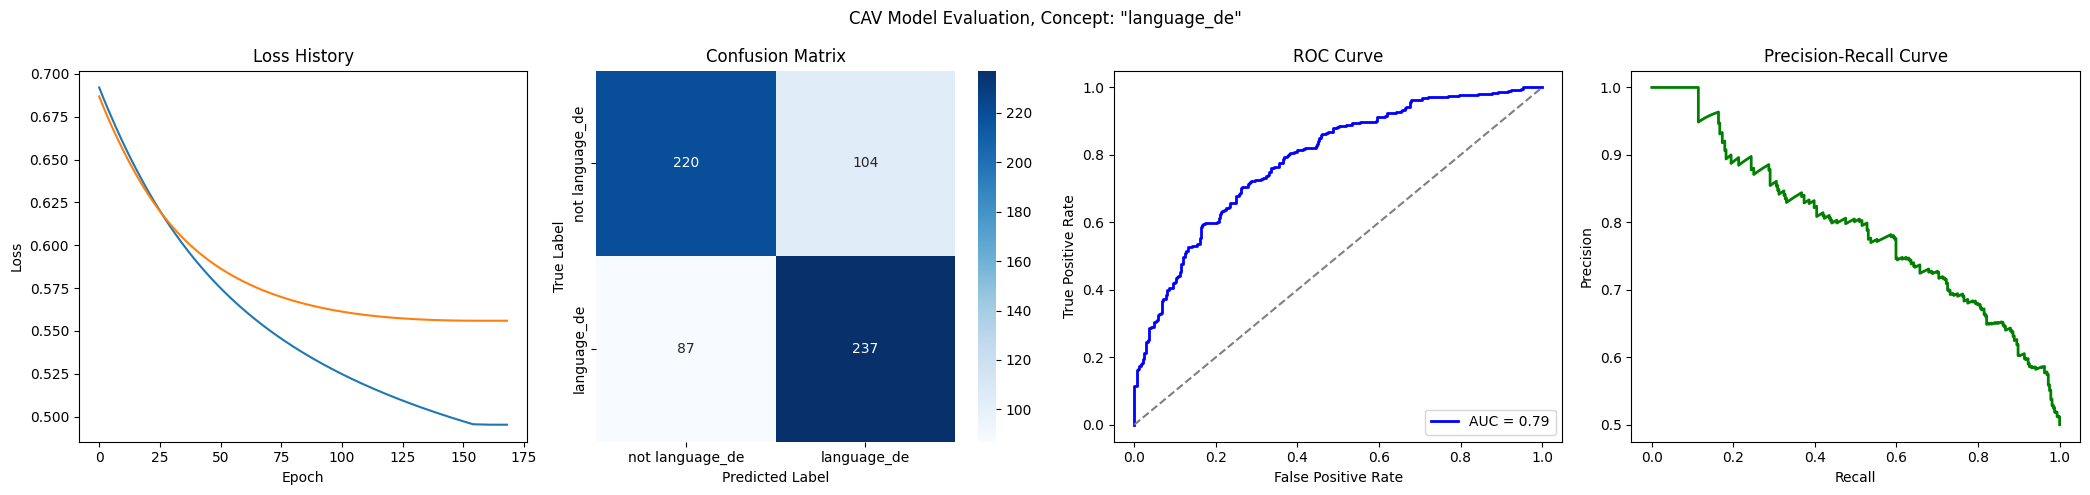


Fitting project: language_en for encoder: mert_v1_95m
Epoch 1/10000
Epoch 1 Train Loss: 0.7058
Epoch 1 Validation Loss: 0.6946
Model saved to trainings/language_en/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.6311
Epoch 101 Validation Loss: 0.6788
Model saved to trainings/language_en/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.6115
Epoch 201 Validation Loss: 0.6722
Model saved to trainings/language_en/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.5946
Epoch 301 Validation Loss: 0.6663
Model saved to trainings/language_en/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.5799
Epoch 401 Validation Loss: 0.6616
Model saved to trainings/language_en/state_dict.pth
Epoch 501/10000
Epoch 501 Train Loss: 0.5668
Epoch 501 Validation Loss: 0.6583
Model saved to trainings/language_en/state_dict.pth
Epoch 601/10000
Epoch 601 Train Loss: 0.5551
Epoch 601 Validation Loss: 0.6559
Model saved to trainings/language_en/state_dict.pth
Early stopping at epoch 671
Loss h

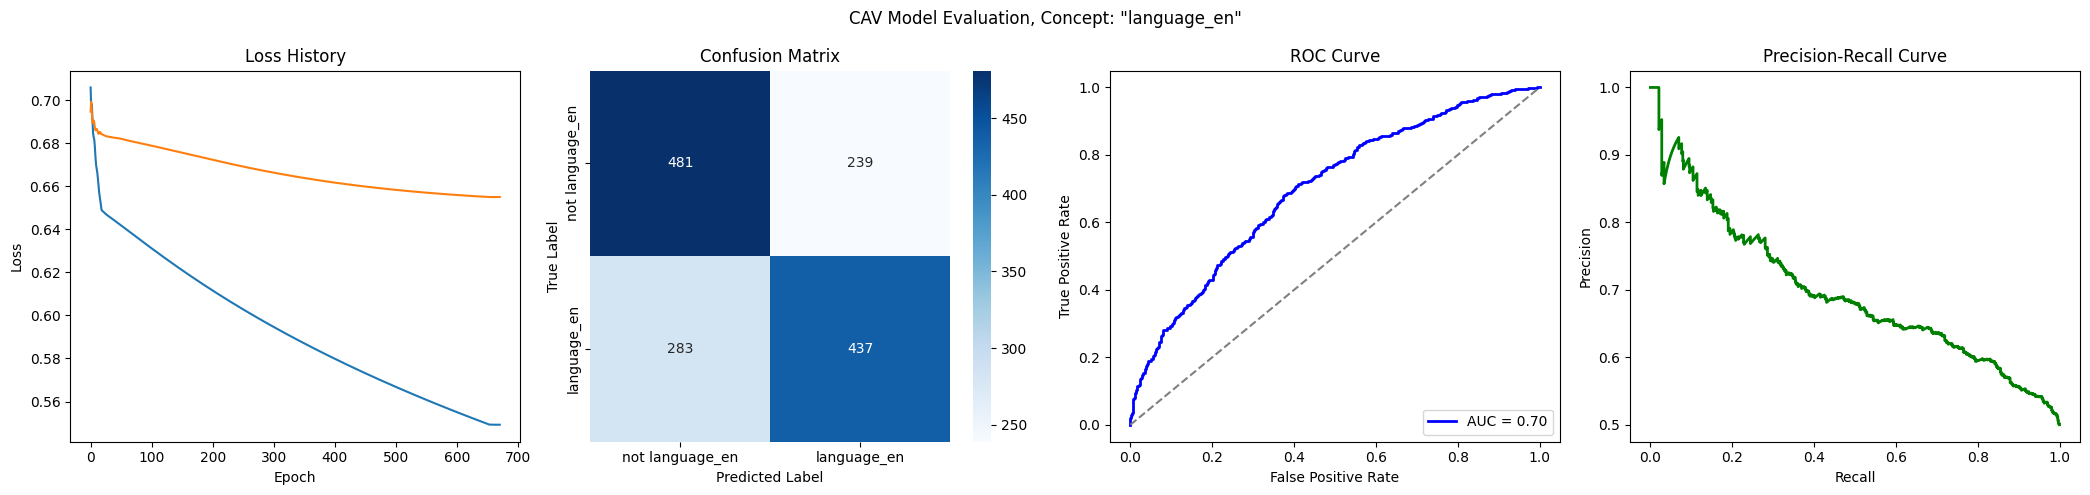


Fitting project: language_en for encoder: whisper_large_v2
Epoch 1/10000
Epoch 1 Train Loss: 0.6943
Epoch 1 Validation Loss: 0.6337
Model saved to trainings/language_en/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.0670
Epoch 101 Validation Loss: 0.0704
Model saved to trainings/language_en/state_dict.pth
Early stopping at epoch 141
Loss history saved to trainings/language_en/loss_history.json


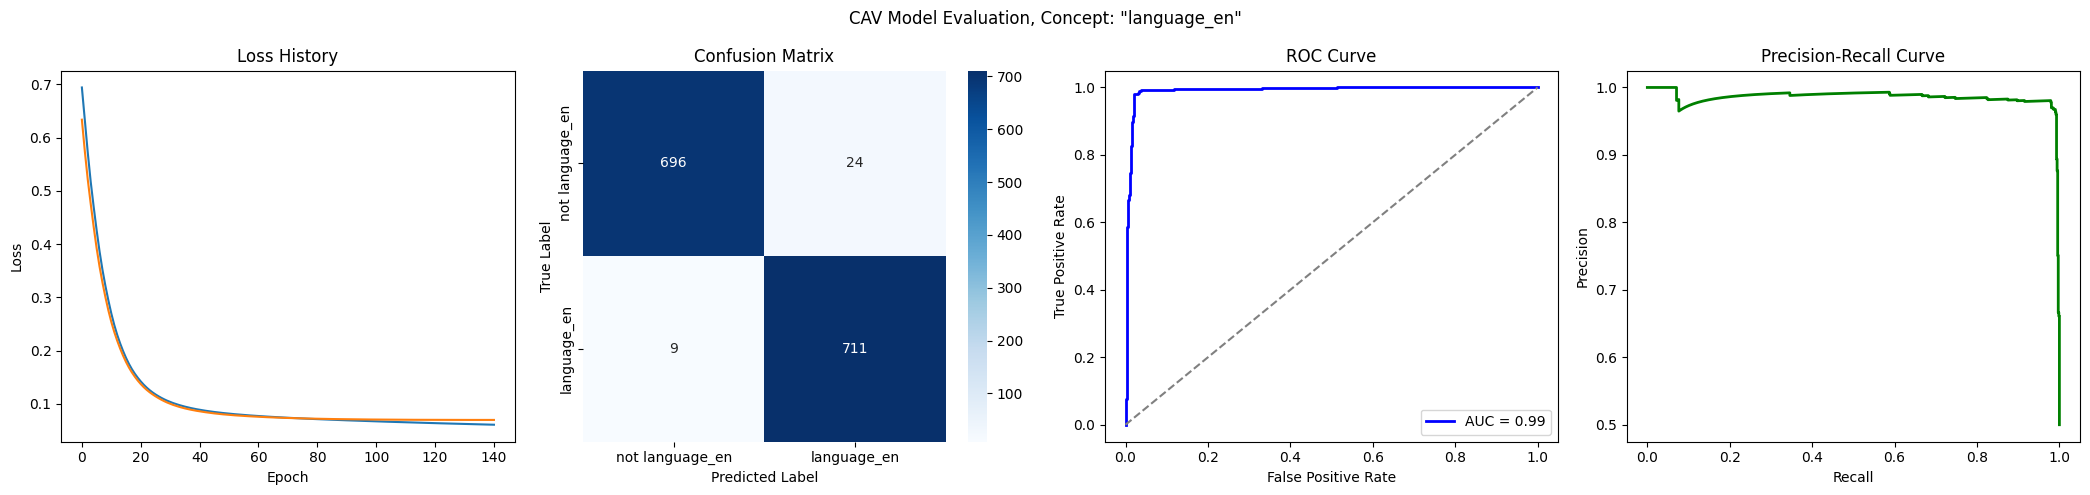


Fitting project: language_en for encoder: muq_large_msd
Epoch 1/10000
Epoch 1 Train Loss: 0.6934
Epoch 1 Validation Loss: 0.6734
Model saved to trainings/language_en/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.2193
Epoch 101 Validation Loss: 0.2698
Model saved to trainings/language_en/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.1631
Epoch 201 Validation Loss: 0.2384
Model saved to trainings/language_en/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.1330
Epoch 301 Validation Loss: 0.2320
Model saved to trainings/language_en/state_dict.pth
Early stopping at epoch 331
Loss history saved to trainings/language_en/loss_history.json


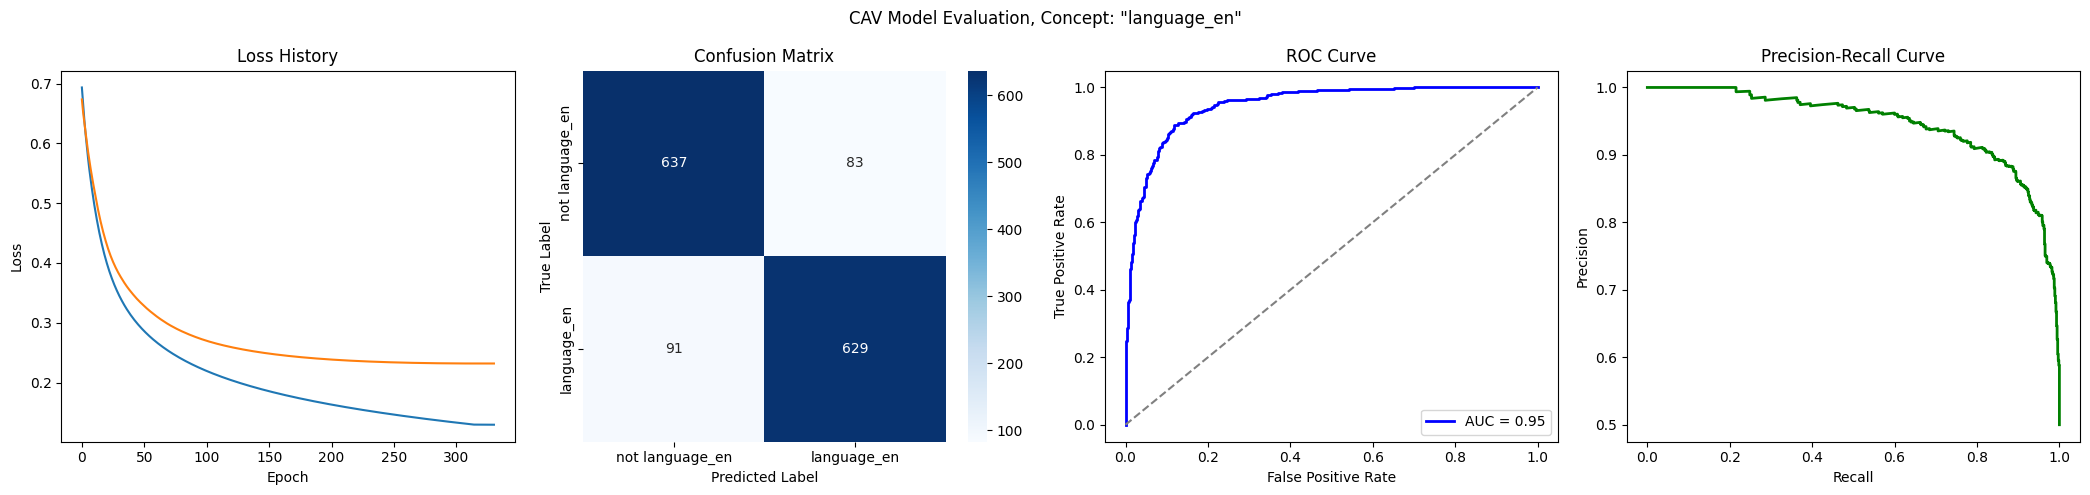


Fitting project: language_en for encoder: muq_mulan_large
Epoch 1/10000
Epoch 1 Train Loss: 0.6947
Epoch 1 Validation Loss: 0.6905
Model saved to trainings/language_en/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.4814
Epoch 101 Validation Loss: 0.4778
Model saved to trainings/language_en/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.4263
Epoch 201 Validation Loss: 0.4115
Model saved to trainings/language_en/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.4002
Epoch 301 Validation Loss: 0.3788
Model saved to trainings/language_en/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.3840
Epoch 401 Validation Loss: 0.3592
Model saved to trainings/language_en/state_dict.pth
Epoch 501/10000
Epoch 501 Train Loss: 0.3725
Epoch 501 Validation Loss: 0.3459
Model saved to trainings/language_en/state_dict.pth
Epoch 601/10000
Epoch 601 Train Loss: 0.3638
Epoch 601 Validation Loss: 0.3362
Model saved to trainings/language_en/state_dict.pth
Epoch 701/10000
Epoch 701 Trai

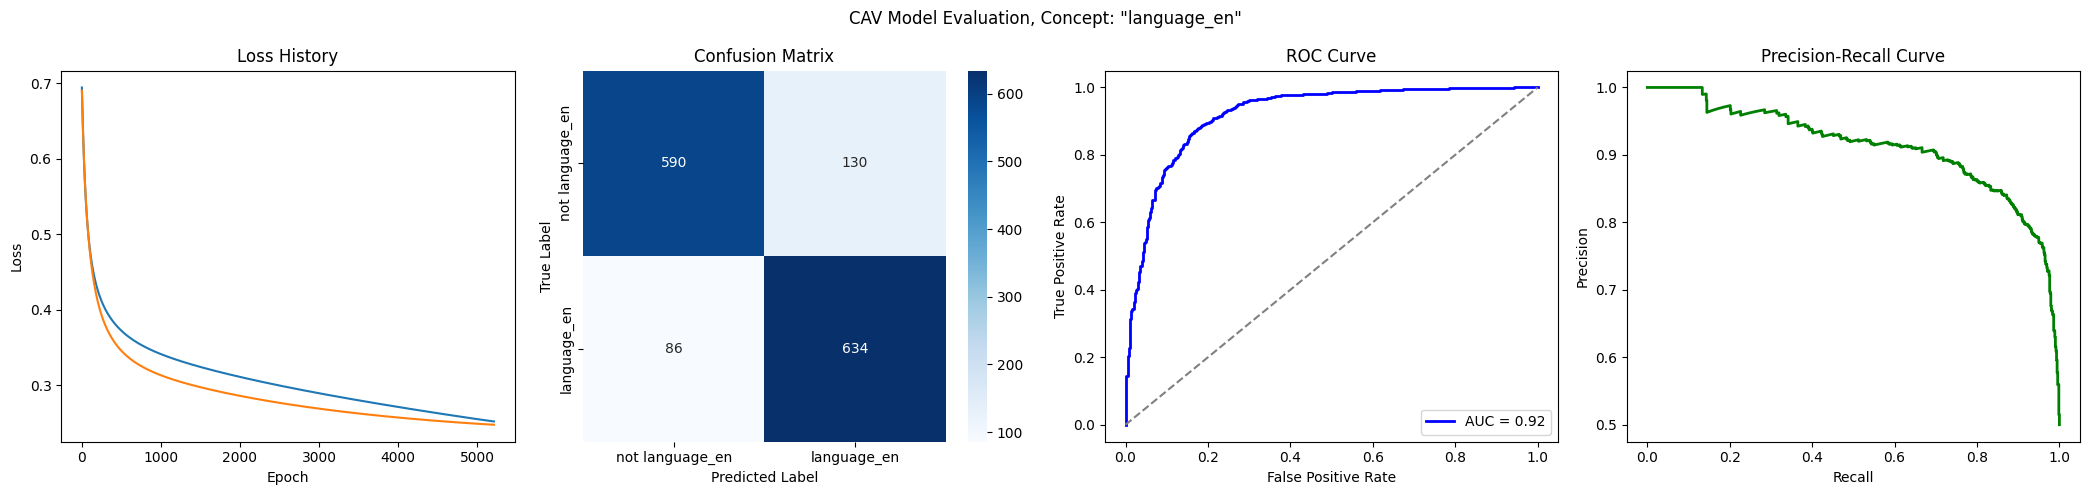


Fitting project: language_es for encoder: mert_v1_95m
Epoch 1/10000
Epoch 1 Train Loss: 0.6970
Epoch 1 Validation Loss: 0.7008
Model saved to trainings/language_es/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.5139
Epoch 101 Validation Loss: 0.6128
Model saved to trainings/language_es/state_dict.pth
Early stopping at epoch 120
Loss history saved to trainings/language_es/loss_history.json


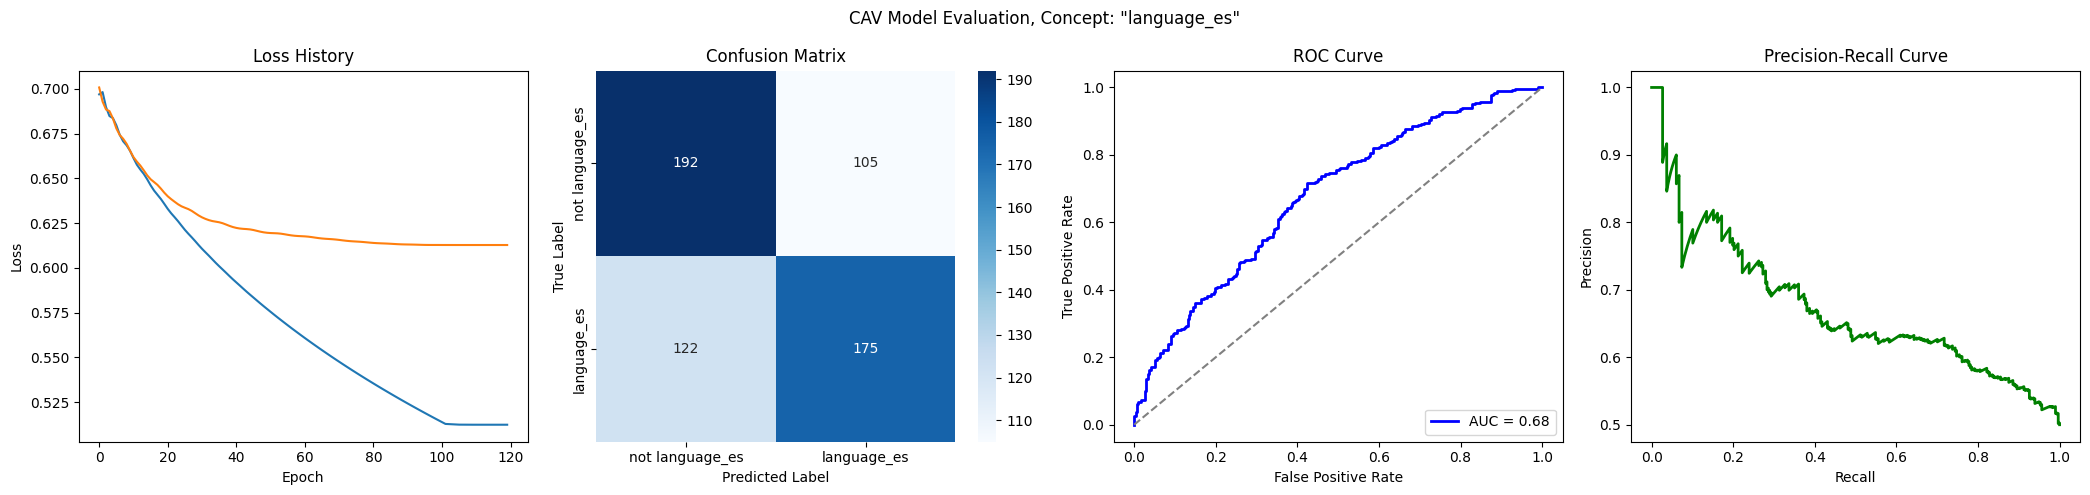


Fitting project: language_es for encoder: whisper_large_v2
Epoch 1/10000
Epoch 1 Train Loss: 0.7382
Epoch 1 Validation Loss: 0.6809
Model saved to trainings/language_es/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.1184
Epoch 101 Validation Loss: 0.0869
Model saved to trainings/language_es/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.0809
Epoch 201 Validation Loss: 0.0594
Model saved to trainings/language_es/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.0606
Epoch 301 Validation Loss: 0.0533
Model saved to trainings/language_es/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.0461
Epoch 401 Validation Loss: 0.0511
Model saved to trainings/language_es/state_dict.pth
Epoch 501/10000
Epoch 501 Train Loss: 0.0355
Epoch 501 Validation Loss: 0.0494
Model saved to trainings/language_es/state_dict.pth
Epoch 601/10000
Epoch 601 Train Loss: 0.0278
Epoch 601 Validation Loss: 0.0474
Model saved to trainings/language_es/state_dict.pth
Epoch 701/10000
Epoch 701 Tra

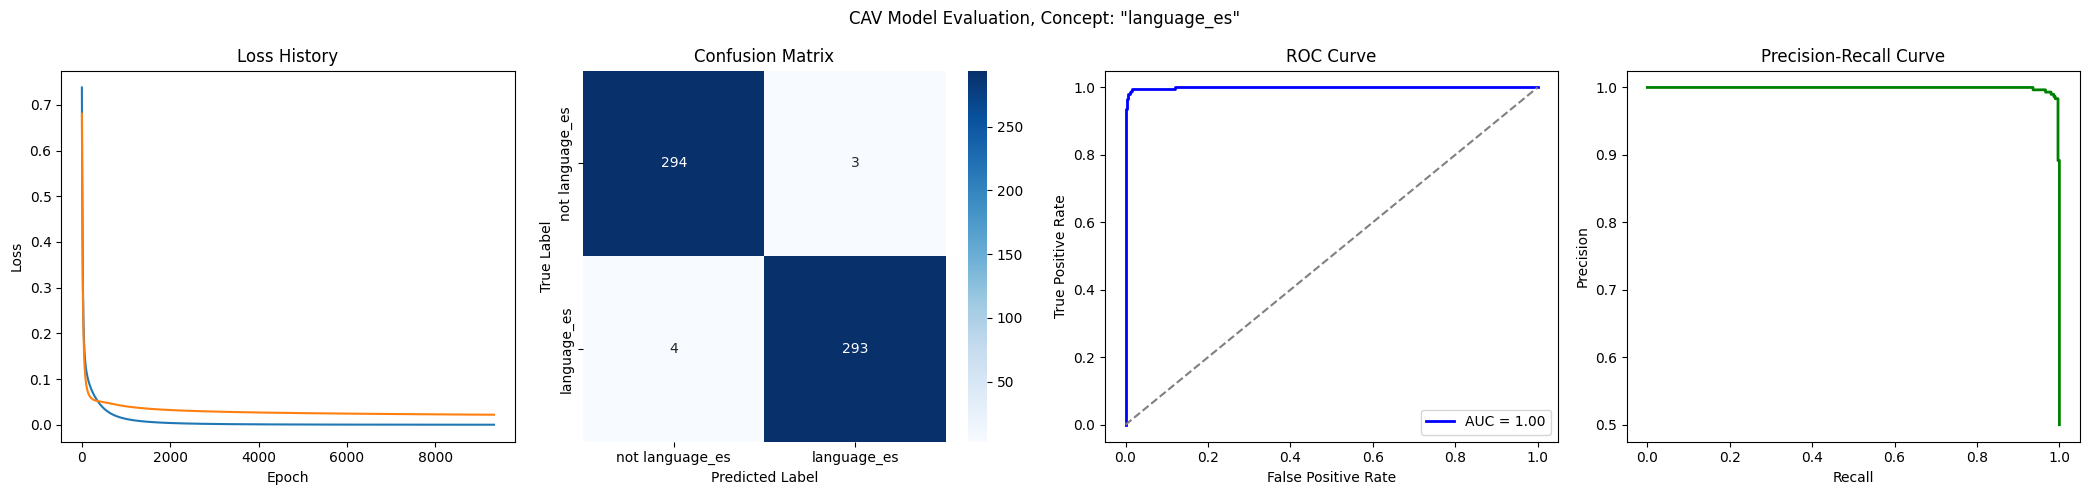


Fitting project: language_es for encoder: muq_large_msd
Epoch 1/10000
Epoch 1 Train Loss: 0.6963
Epoch 1 Validation Loss: 0.6762
Model saved to trainings/language_es/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.3049
Epoch 101 Validation Loss: 0.4477
Model saved to trainings/language_es/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.2154
Epoch 201 Validation Loss: 0.4143
Model saved to trainings/language_es/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.1634
Epoch 301 Validation Loss: 0.4025
Model saved to trainings/language_es/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.1281
Epoch 401 Validation Loss: 0.3981
Model saved to trainings/language_es/state_dict.pth
Early stopping at epoch 432
Loss history saved to trainings/language_es/loss_history.json


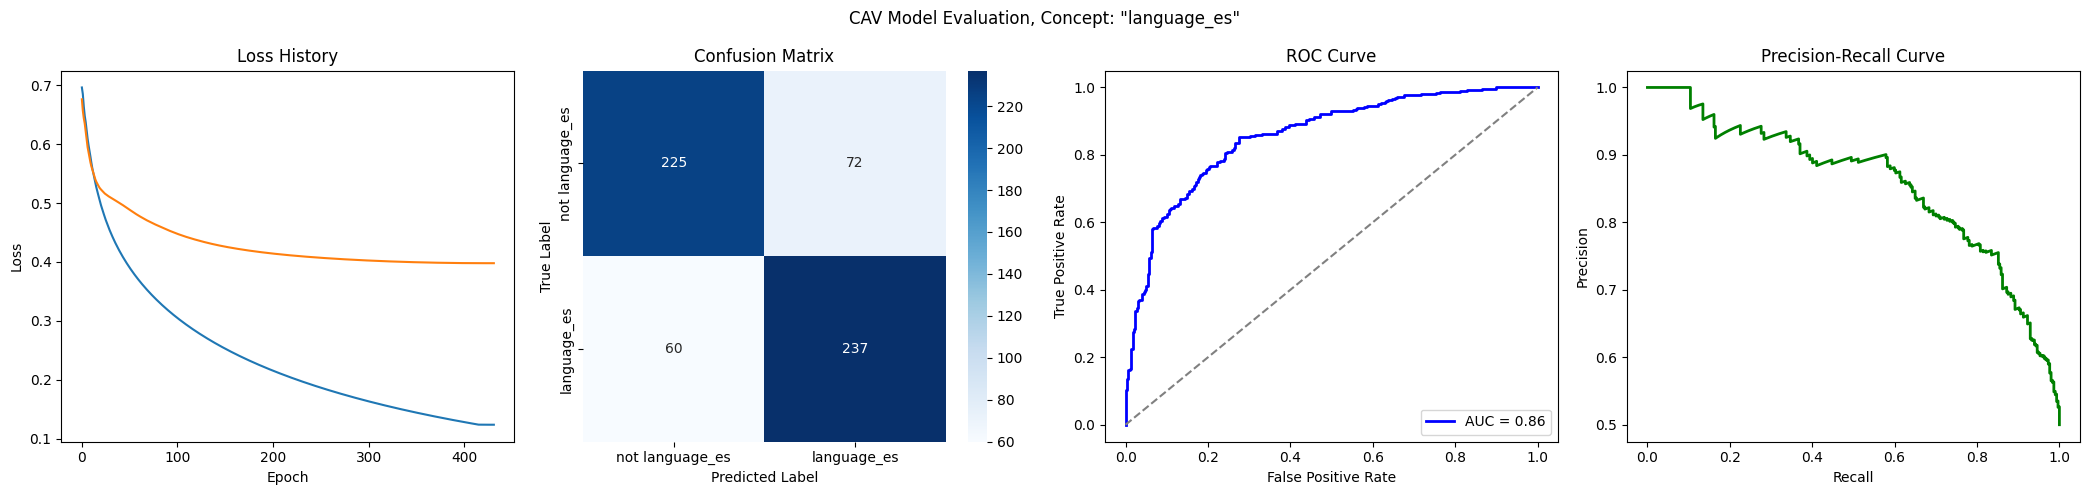


Fitting project: language_es for encoder: muq_mulan_large
Epoch 1/10000
Epoch 1 Train Loss: 0.6931
Epoch 1 Validation Loss: 0.6868
Model saved to trainings/language_es/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.5987
Epoch 101 Validation Loss: 0.5405
Model saved to trainings/language_es/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.5739
Epoch 201 Validation Loss: 0.5179
Model saved to trainings/language_es/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.5586
Epoch 301 Validation Loss: 0.5052
Model saved to trainings/language_es/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.5475
Epoch 401 Validation Loss: 0.4972
Model saved to trainings/language_es/state_dict.pth
Epoch 501/10000
Epoch 501 Train Loss: 0.5388
Epoch 501 Validation Loss: 0.4919
Model saved to trainings/language_es/state_dict.pth
Epoch 601/10000
Epoch 601 Train Loss: 0.5313
Epoch 601 Validation Loss: 0.4884
Model saved to trainings/language_es/state_dict.pth
Epoch 701/10000
Epoch 701 Trai

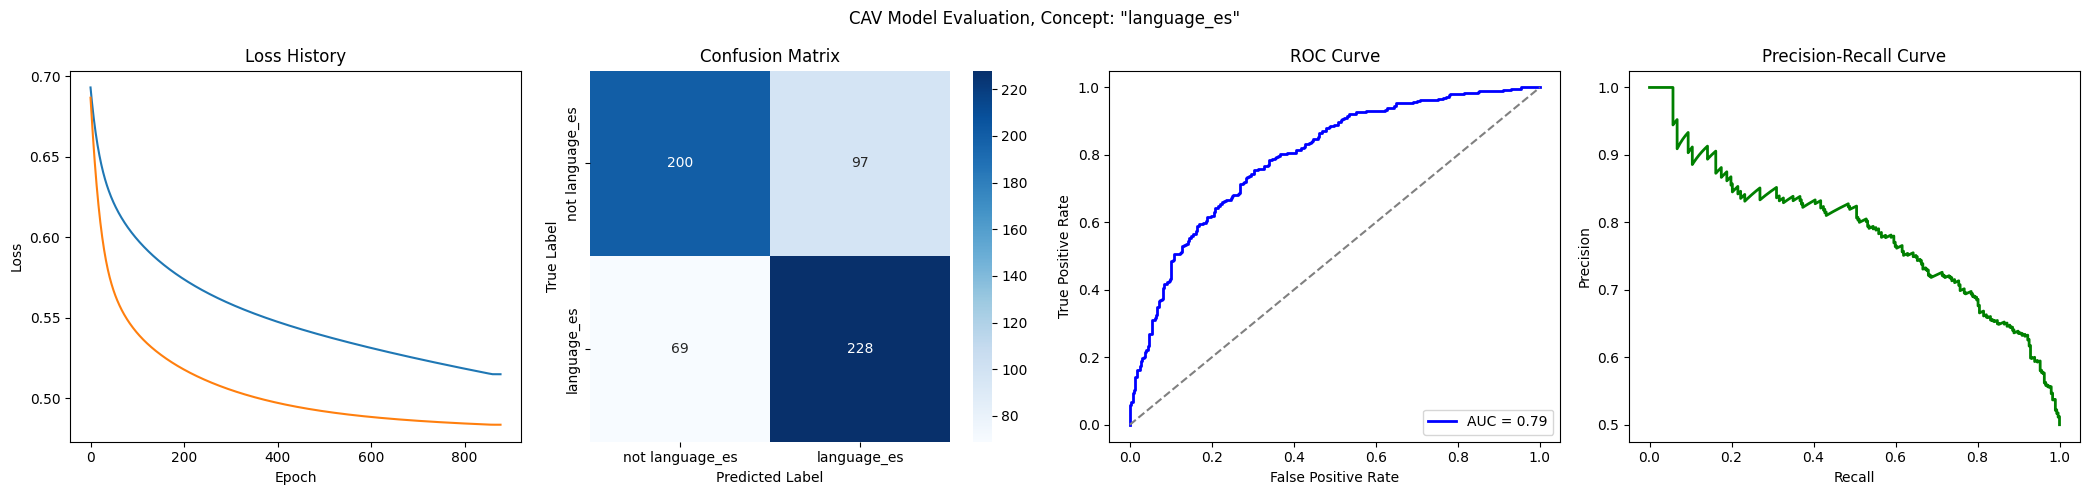


Fitting project: language_fr for encoder: mert_v1_95m
Epoch 1/10000
Epoch 1 Train Loss: 0.6971
Epoch 1 Validation Loss: 0.6950
Model saved to trainings/language_fr/state_dict.pth
Early stopping at epoch 21
Loss history saved to trainings/language_fr/loss_history.json


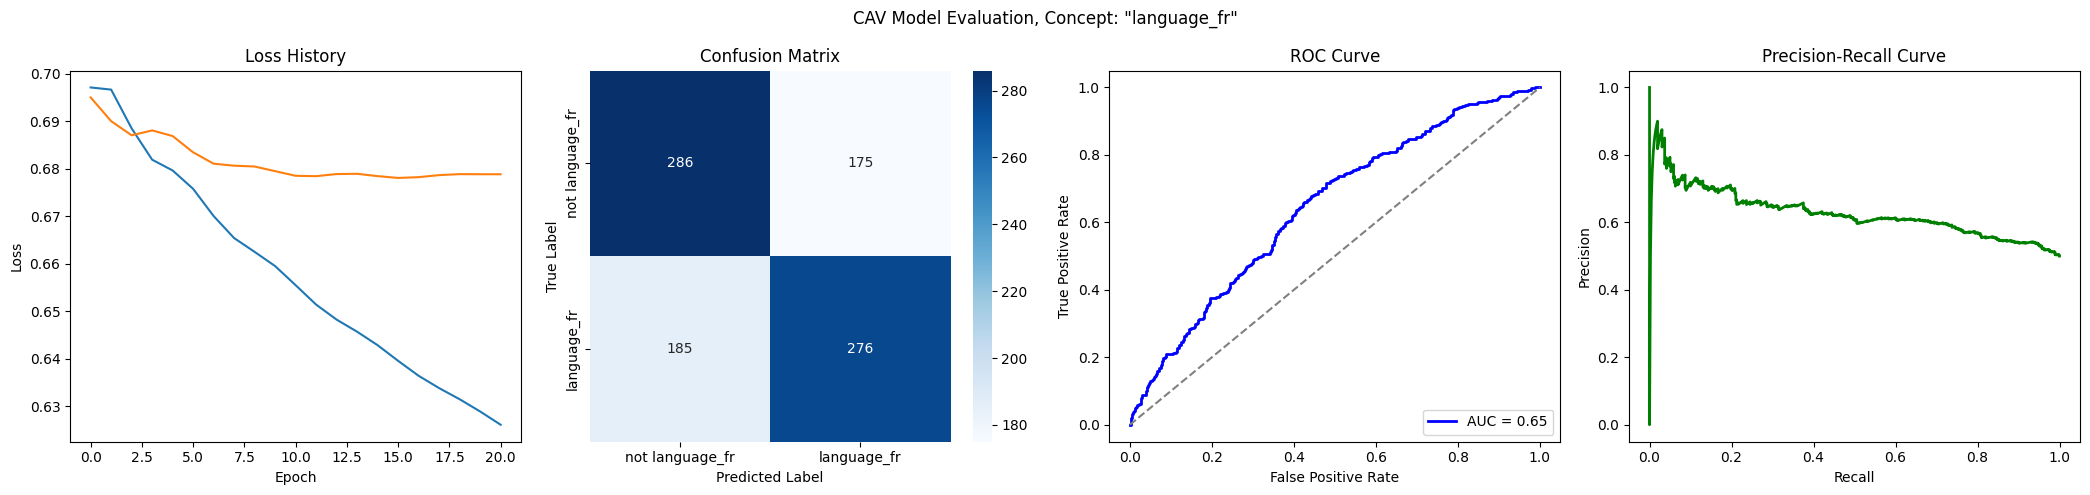


Fitting project: language_fr for encoder: whisper_large_v2
Epoch 1/10000
Epoch 1 Train Loss: 0.7057
Epoch 1 Validation Loss: 0.6664
Model saved to trainings/language_fr/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.0473
Epoch 101 Validation Loss: 0.1348
Model saved to trainings/language_fr/state_dict.pth
Early stopping at epoch 152
Loss history saved to trainings/language_fr/loss_history.json


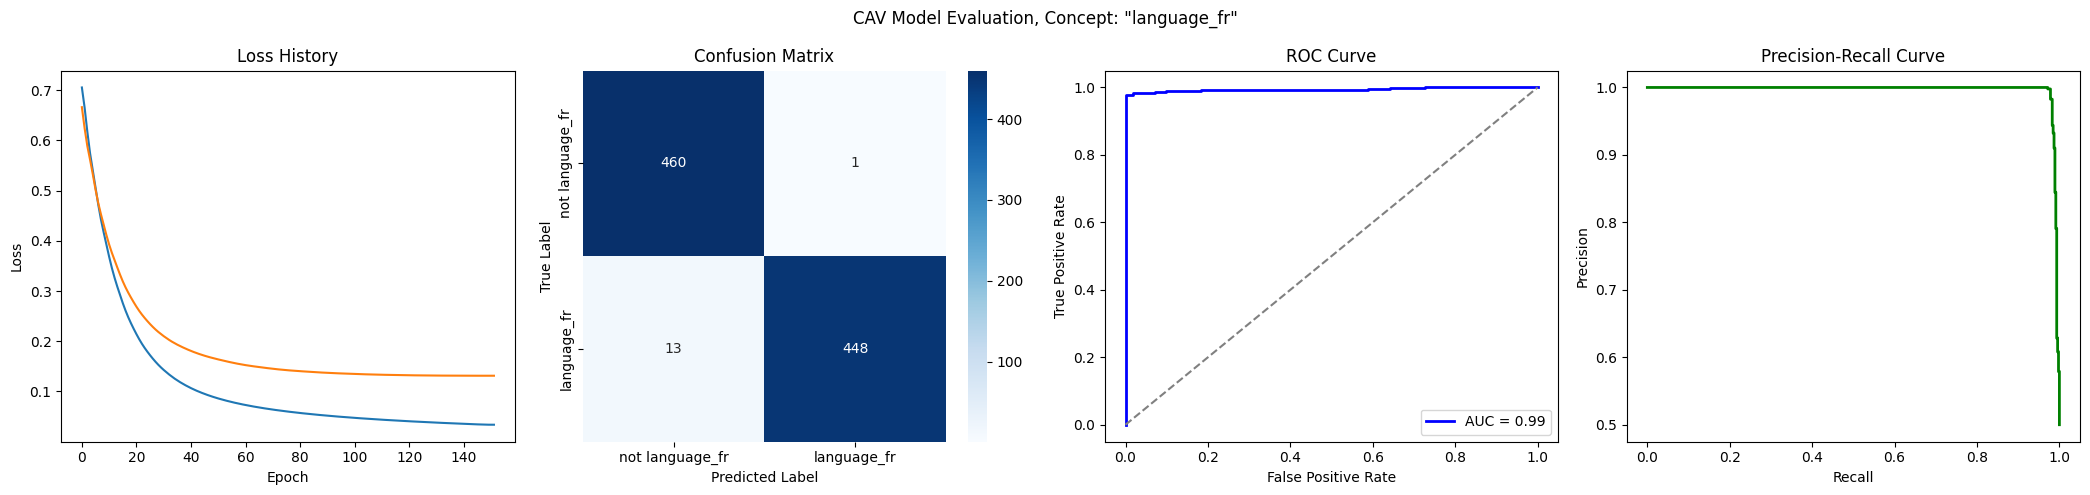


Fitting project: language_fr for encoder: muq_large_msd
Epoch 1/10000
Epoch 1 Train Loss: 0.6979
Epoch 1 Validation Loss: 0.6810
Model saved to trainings/language_fr/state_dict.pth
Early stopping at epoch 47
Loss history saved to trainings/language_fr/loss_history.json


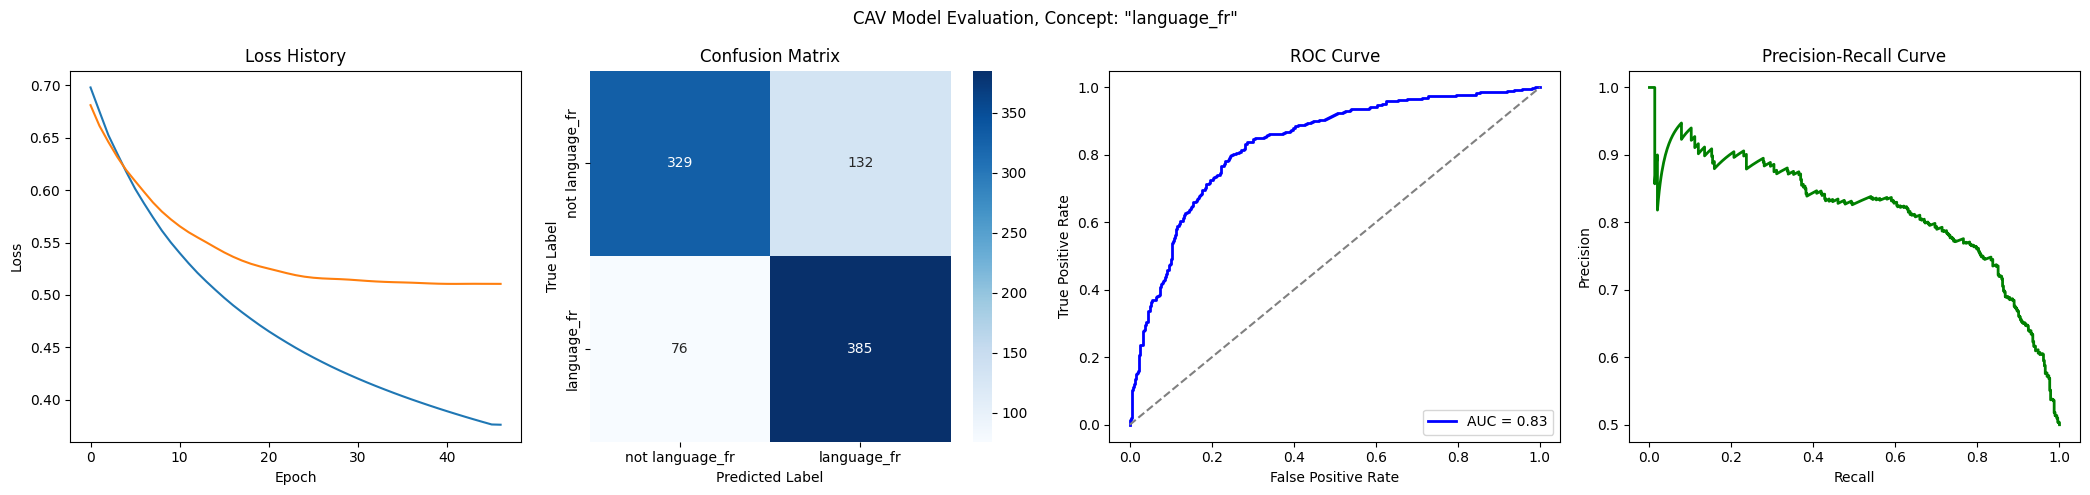


Fitting project: language_fr for encoder: muq_mulan_large
Epoch 1/10000
Epoch 1 Train Loss: 0.6917
Epoch 1 Validation Loss: 0.6890
Model saved to trainings/language_fr/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.5577
Epoch 101 Validation Loss: 0.5986
Model saved to trainings/language_fr/state_dict.pth
Early stopping at epoch 158
Loss history saved to trainings/language_fr/loss_history.json


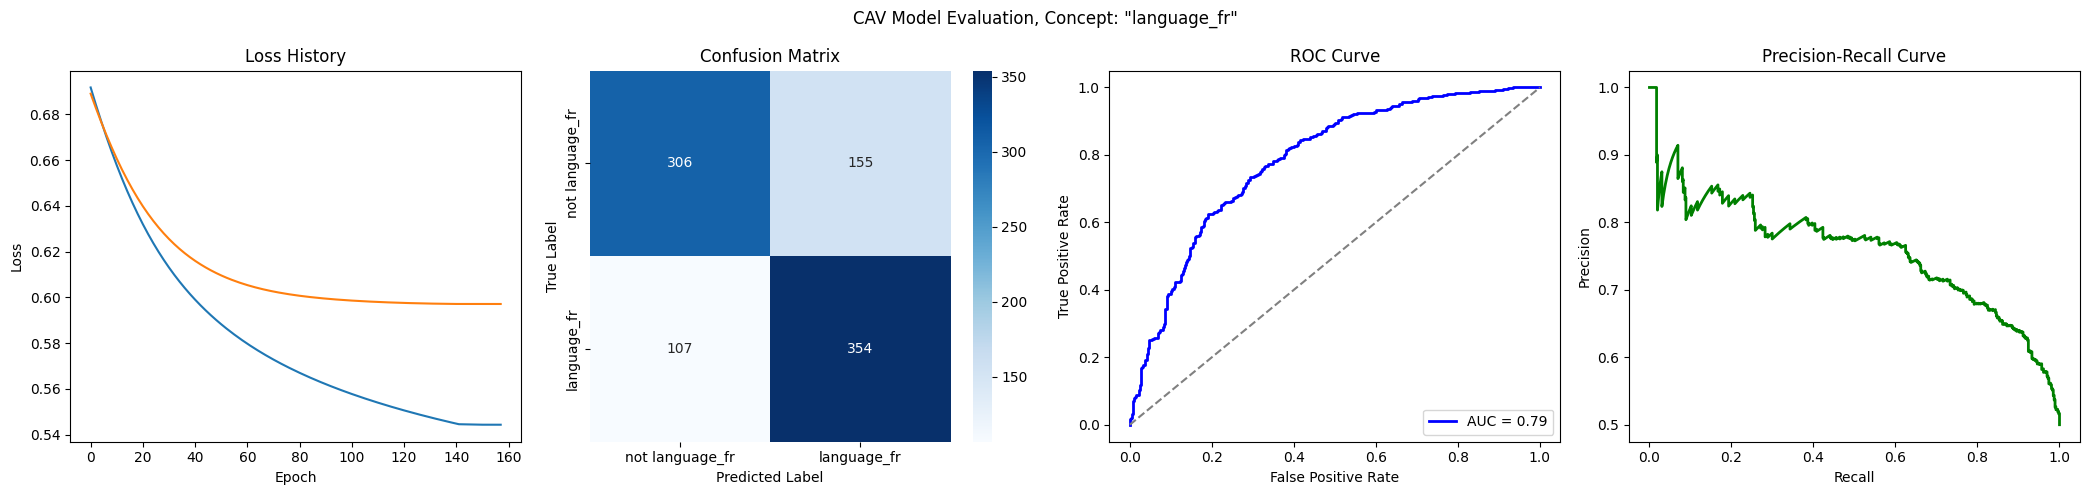


Fitting project: language_it for encoder: mert_v1_95m
Epoch 1/10000
Epoch 1 Train Loss: 0.6946
Epoch 1 Validation Loss: 0.6910
Model saved to trainings/language_it/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.5001
Epoch 101 Validation Loss: 0.6071
Model saved to trainings/language_it/state_dict.pth
Early stopping at epoch 196
Loss history saved to trainings/language_it/loss_history.json


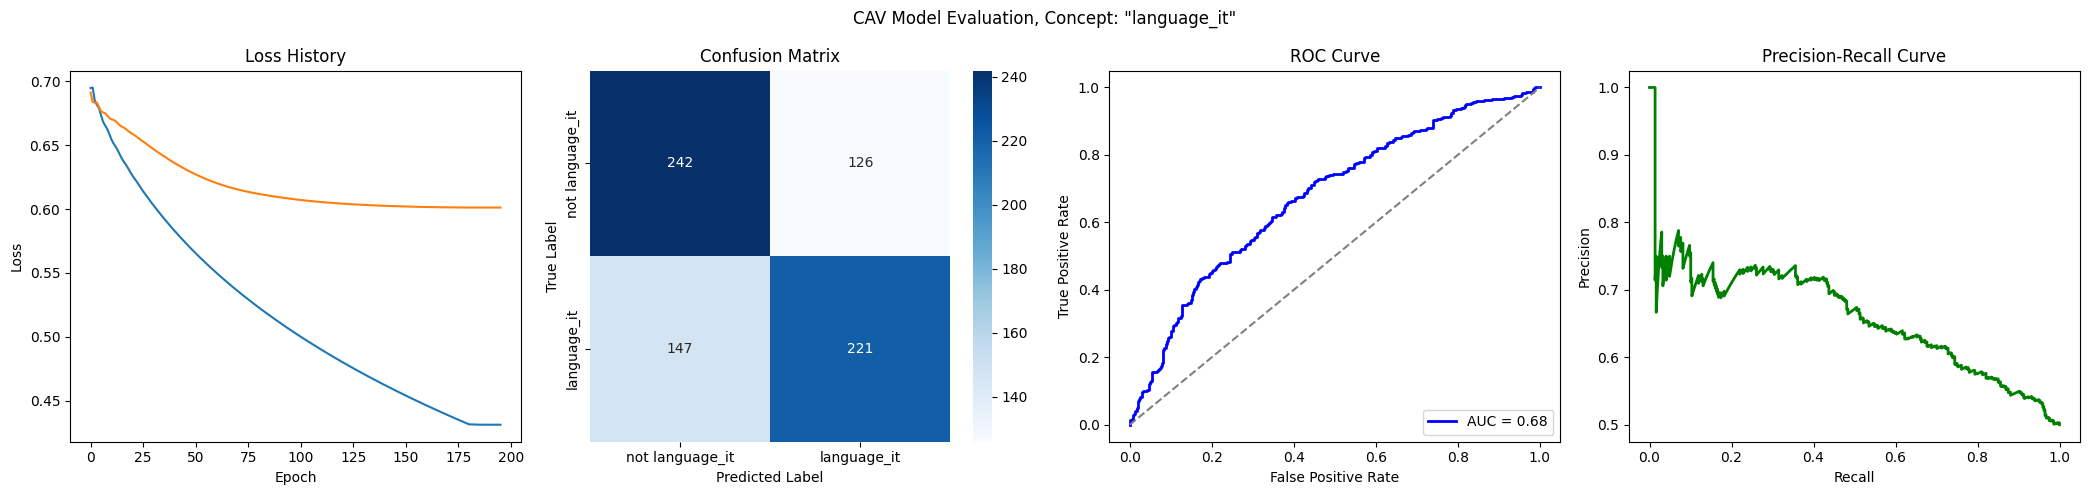


Fitting project: language_it for encoder: whisper_large_v2
Epoch 1/10000
Epoch 1 Train Loss: 0.7022
Epoch 1 Validation Loss: 0.6611
Model saved to trainings/language_it/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.0552
Epoch 101 Validation Loss: 0.0806
Model saved to trainings/language_it/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.0274
Epoch 201 Validation Loss: 0.0614
Model saved to trainings/language_it/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.0171
Epoch 301 Validation Loss: 0.0547
Model saved to trainings/language_it/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.0118
Epoch 401 Validation Loss: 0.0514
Model saved to trainings/language_it/state_dict.pth
Epoch 501/10000
Epoch 501 Train Loss: 0.0088
Epoch 501 Validation Loss: 0.0495
Model saved to trainings/language_it/state_dict.pth
Epoch 601/10000
Epoch 601 Train Loss: 0.0068
Epoch 601 Validation Loss: 0.0484
Model saved to trainings/language_it/state_dict.pth
Epoch 701/10000
Epoch 701 Tra

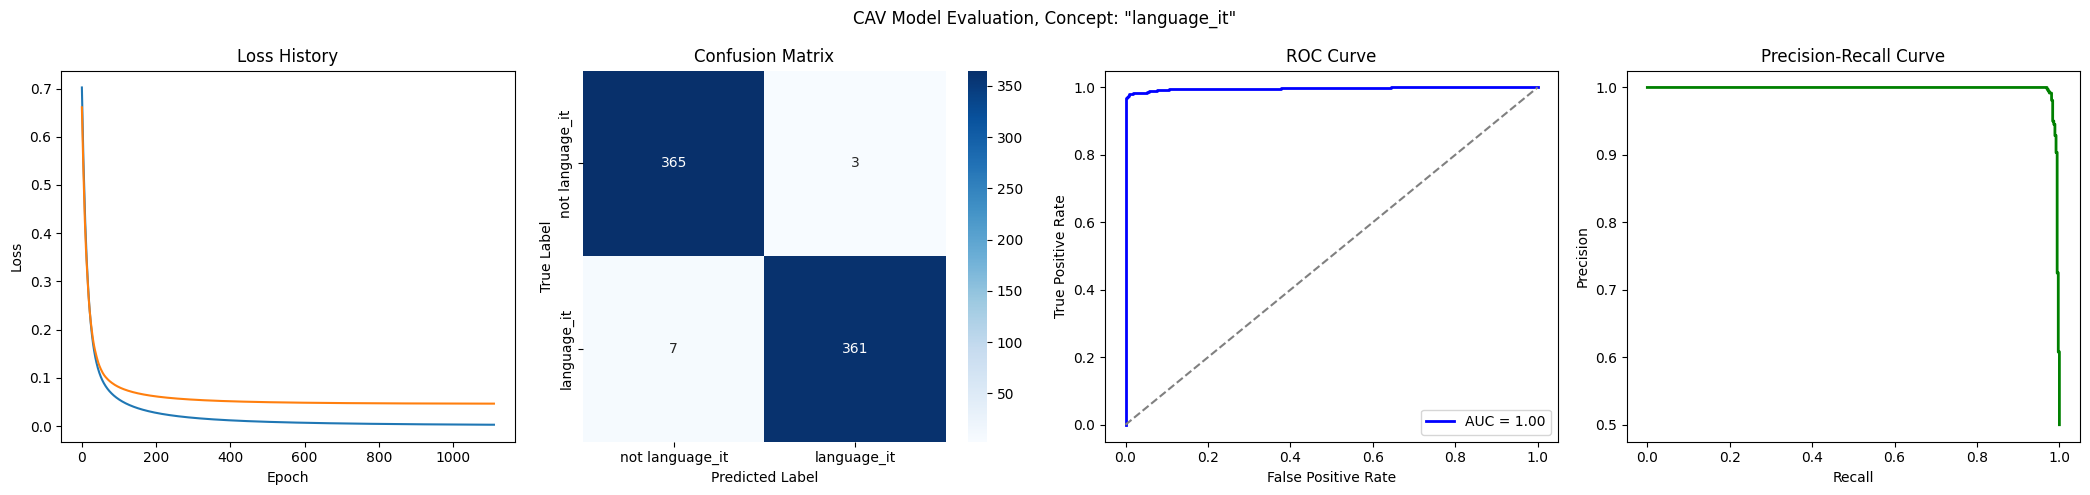


Fitting project: language_it for encoder: muq_large_msd
Epoch 1/10000
Epoch 1 Train Loss: 0.6982
Epoch 1 Validation Loss: 0.6795
Model saved to trainings/language_it/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.3055
Epoch 101 Validation Loss: 0.4693
Model saved to trainings/language_it/state_dict.pth
Early stopping at epoch 138
Loss history saved to trainings/language_it/loss_history.json


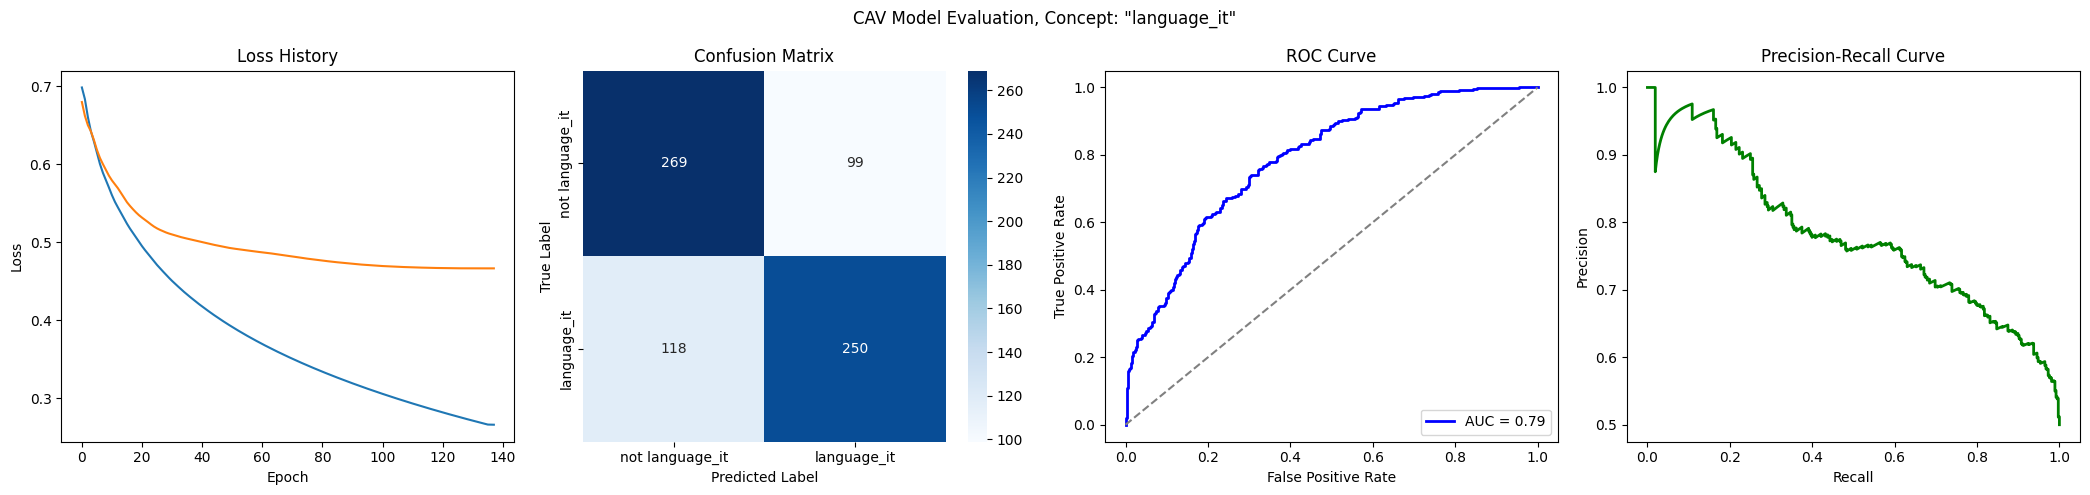


Fitting project: language_it for encoder: muq_mulan_large
Epoch 1/10000
Epoch 1 Train Loss: 0.6927
Epoch 1 Validation Loss: 0.6891
Model saved to trainings/language_it/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.5789
Epoch 101 Validation Loss: 0.5904
Model saved to trainings/language_it/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.5482
Epoch 201 Validation Loss: 0.5712
Model saved to trainings/language_it/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.5325
Epoch 301 Validation Loss: 0.5655
Model saved to trainings/language_it/state_dict.pth
Early stopping at epoch 357
Loss history saved to trainings/language_it/loss_history.json


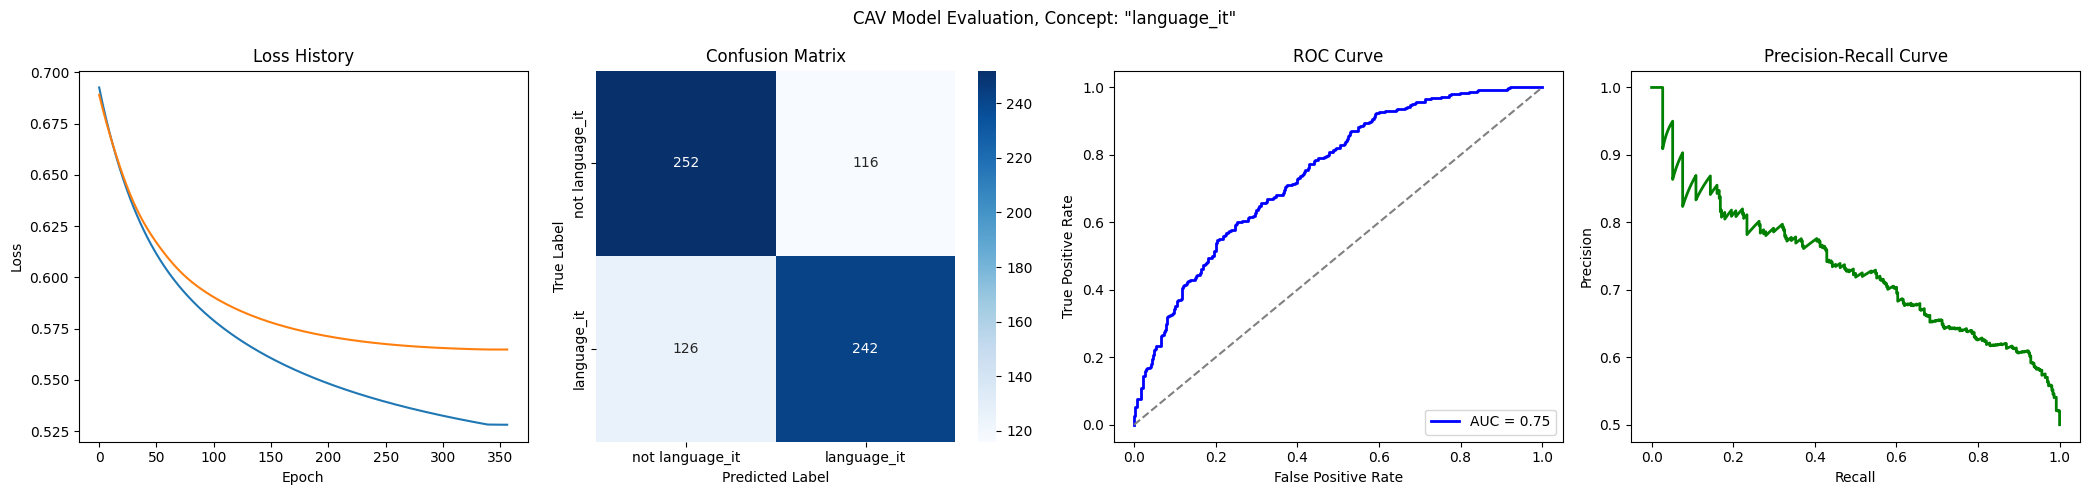


Fitting project: language_ja for encoder: mert_v1_95m
Epoch 1/10000
Epoch 1 Train Loss: 0.6925
Epoch 1 Validation Loss: 0.6678
Model saved to trainings/language_ja/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.3557
Epoch 101 Validation Loss: 0.3834
Model saved to trainings/language_ja/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.2700
Epoch 201 Validation Loss: 0.3511
Model saved to trainings/language_ja/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.2215
Epoch 301 Validation Loss: 0.3426
Model saved to trainings/language_ja/state_dict.pth
Early stopping at epoch 360
Loss history saved to trainings/language_ja/loss_history.json


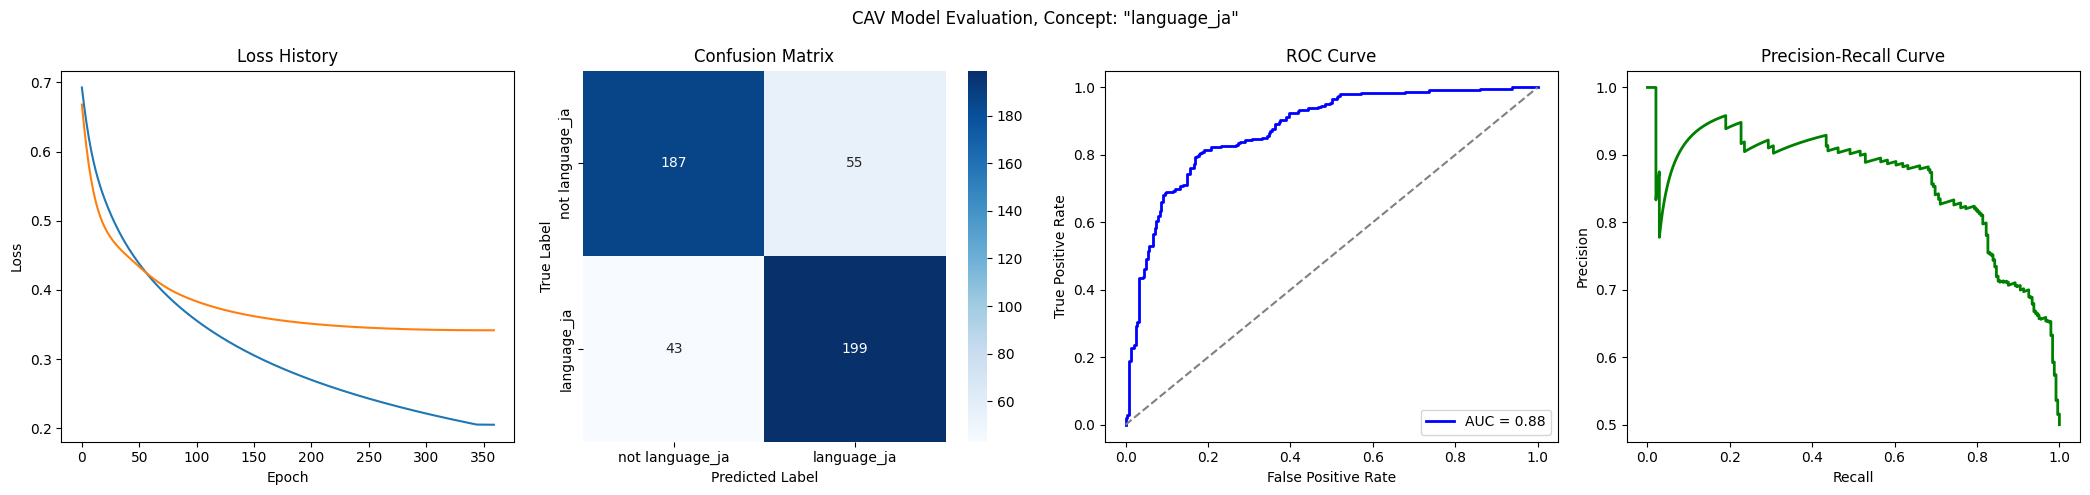


Fitting project: language_ja for encoder: whisper_large_v2
Epoch 1/10000
Epoch 1 Train Loss: 0.6968
Epoch 1 Validation Loss: 0.6287
Model saved to trainings/language_ja/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.0530
Epoch 101 Validation Loss: 0.0777
Model saved to trainings/language_ja/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.0324
Epoch 201 Validation Loss: 0.0669
Model saved to trainings/language_ja/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.0220
Epoch 301 Validation Loss: 0.0621
Model saved to trainings/language_ja/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.0158
Epoch 401 Validation Loss: 0.0599
Model saved to trainings/language_ja/state_dict.pth
Epoch 501/10000
Epoch 501 Train Loss: 0.0119
Epoch 501 Validation Loss: 0.0590
Model saved to trainings/language_ja/state_dict.pth
Early stopping at epoch 579
Loss history saved to trainings/language_ja/loss_history.json


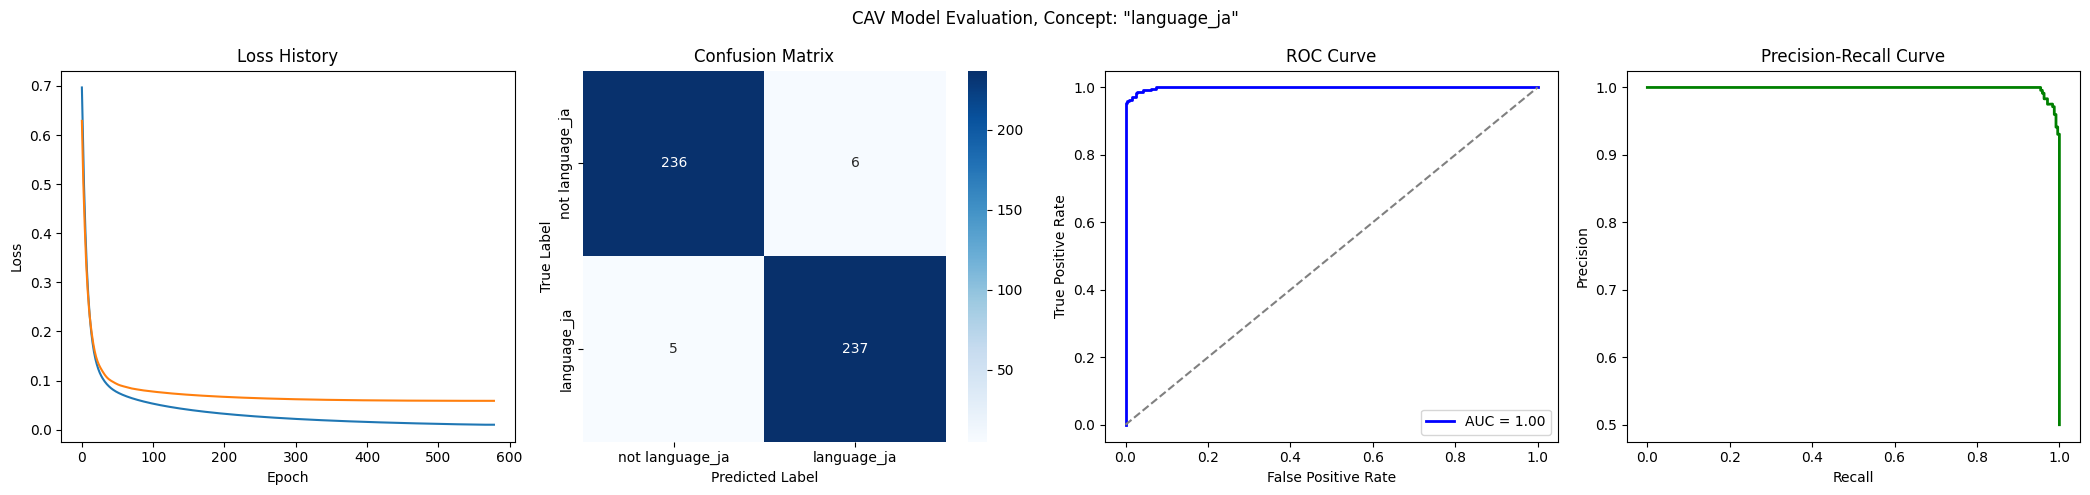


Fitting project: language_ja for encoder: muq_large_msd
Epoch 1/10000
Epoch 1 Train Loss: 0.7087
Epoch 1 Validation Loss: 0.6394
Model saved to trainings/language_ja/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.1412
Epoch 101 Validation Loss: 0.2604
Model saved to trainings/language_ja/state_dict.pth
Early stopping at epoch 190
Loss history saved to trainings/language_ja/loss_history.json


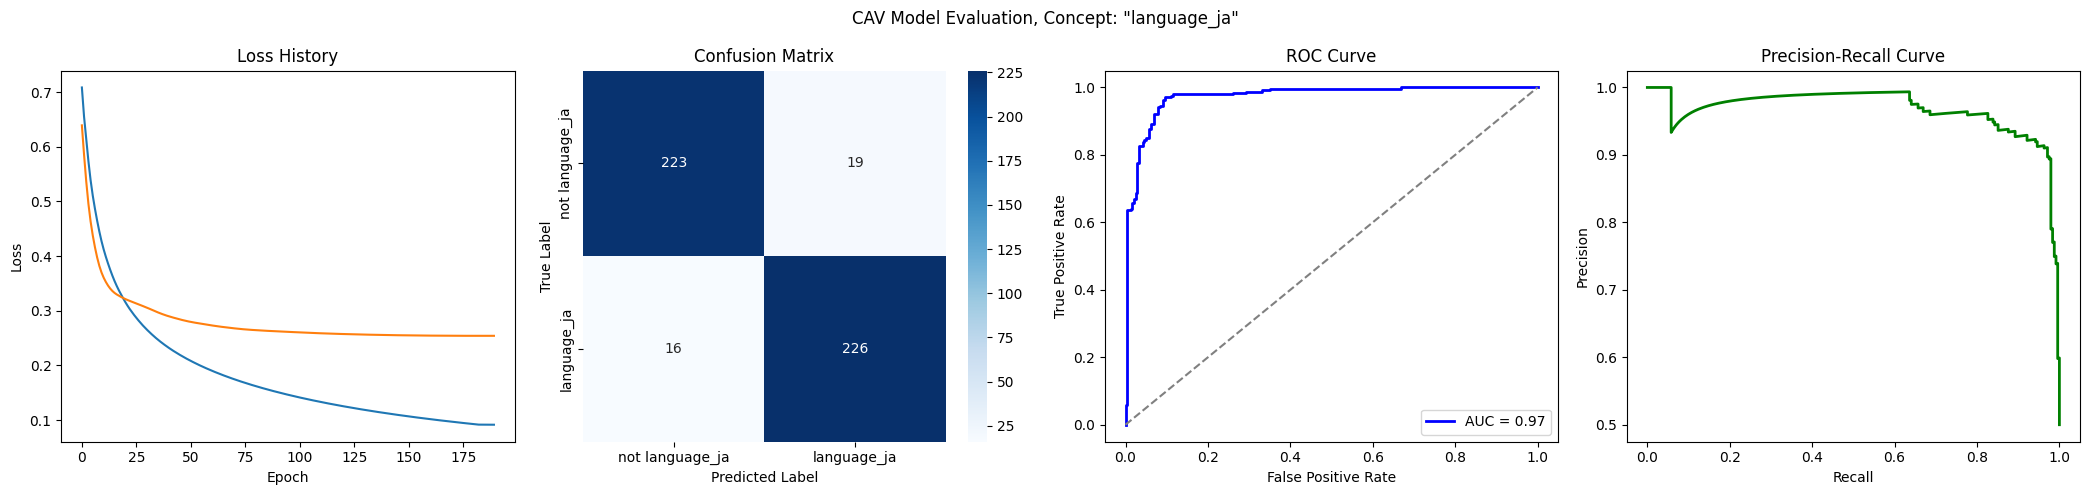


Fitting project: language_ja for encoder: muq_mulan_large
Epoch 1/10000
Epoch 1 Train Loss: 0.6953
Epoch 1 Validation Loss: 0.6868
Model saved to trainings/language_ja/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.4491
Epoch 101 Validation Loss: 0.4364
Model saved to trainings/language_ja/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.3831
Epoch 201 Validation Loss: 0.3805
Model saved to trainings/language_ja/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.3521
Epoch 301 Validation Loss: 0.3579
Model saved to trainings/language_ja/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.3330
Epoch 401 Validation Loss: 0.3447
Model saved to trainings/language_ja/state_dict.pth
Epoch 501/10000
Epoch 501 Train Loss: 0.3194
Epoch 501 Validation Loss: 0.3345
Model saved to trainings/language_ja/state_dict.pth
Epoch 601/10000
Epoch 601 Train Loss: 0.3090
Epoch 601 Validation Loss: 0.3256
Model saved to trainings/language_ja/state_dict.pth
Epoch 701/10000
Epoch 701 Trai

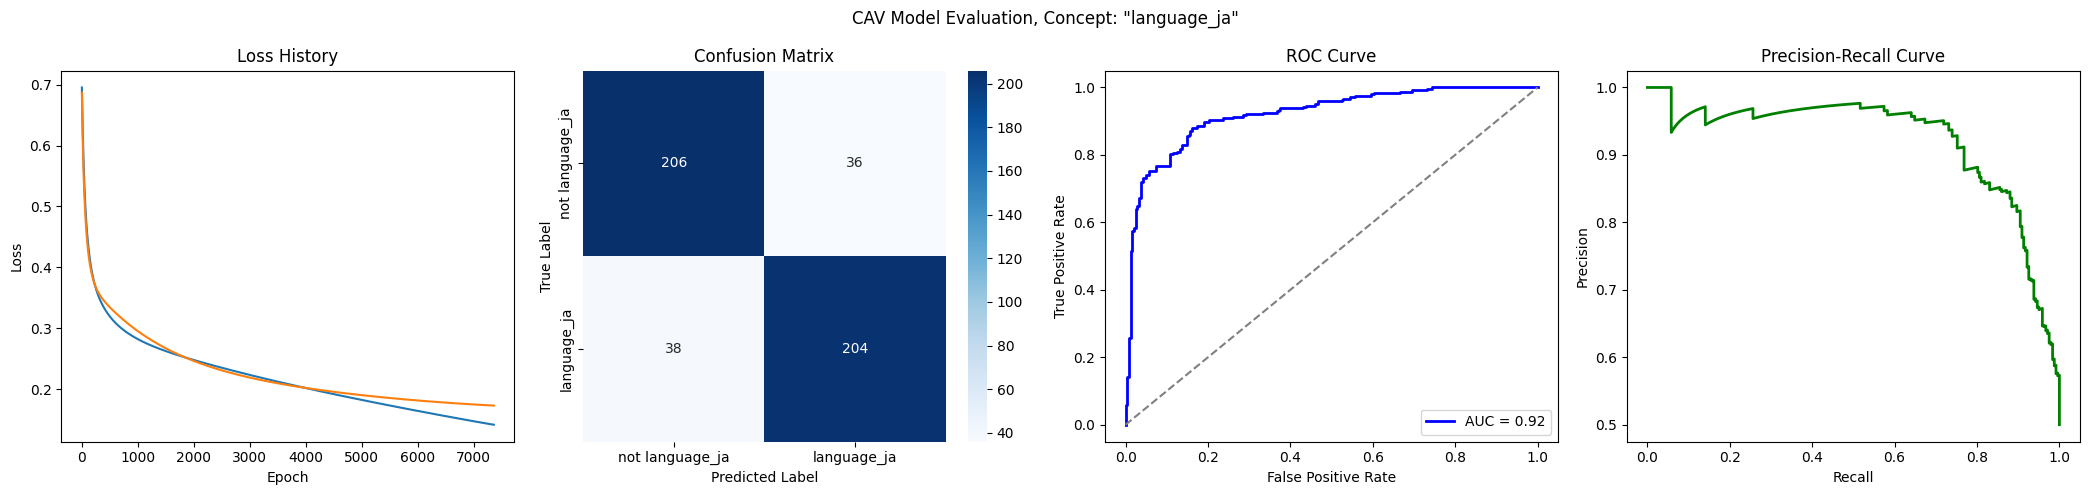


Fitting project: language_pt for encoder: mert_v1_95m
Epoch 1/10000
Epoch 1 Train Loss: 0.6951
Epoch 1 Validation Loss: 0.7026
Model saved to trainings/language_pt/state_dict.pth
Early stopping at epoch 94
Loss history saved to trainings/language_pt/loss_history.json


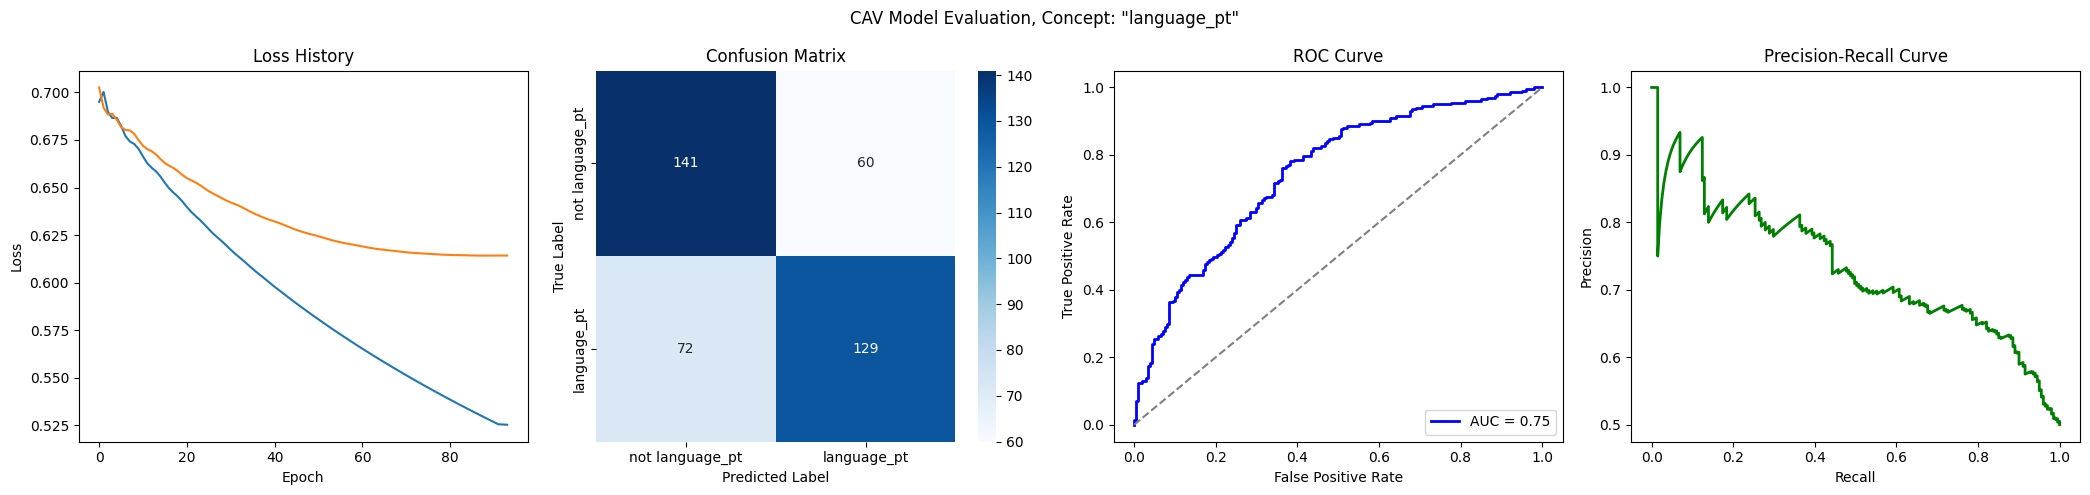


Fitting project: language_pt for encoder: whisper_large_v2
Epoch 1/10000
Epoch 1 Train Loss: 0.7090
Epoch 1 Validation Loss: 0.6711
Model saved to trainings/language_pt/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.0575
Epoch 101 Validation Loss: 0.0531
Model saved to trainings/language_pt/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.0331
Epoch 201 Validation Loss: 0.0322
Model saved to trainings/language_pt/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.0214
Epoch 301 Validation Loss: 0.0277
Model saved to trainings/language_pt/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.0145
Epoch 401 Validation Loss: 0.0259
Model saved to trainings/language_pt/state_dict.pth
Epoch 501/10000
Epoch 501 Train Loss: 0.0105
Epoch 501 Validation Loss: 0.0245
Model saved to trainings/language_pt/state_dict.pth
Epoch 601/10000
Epoch 601 Train Loss: 0.0079
Epoch 601 Validation Loss: 0.0234
Model saved to trainings/language_pt/state_dict.pth
Epoch 701/10000
Epoch 701 Tra

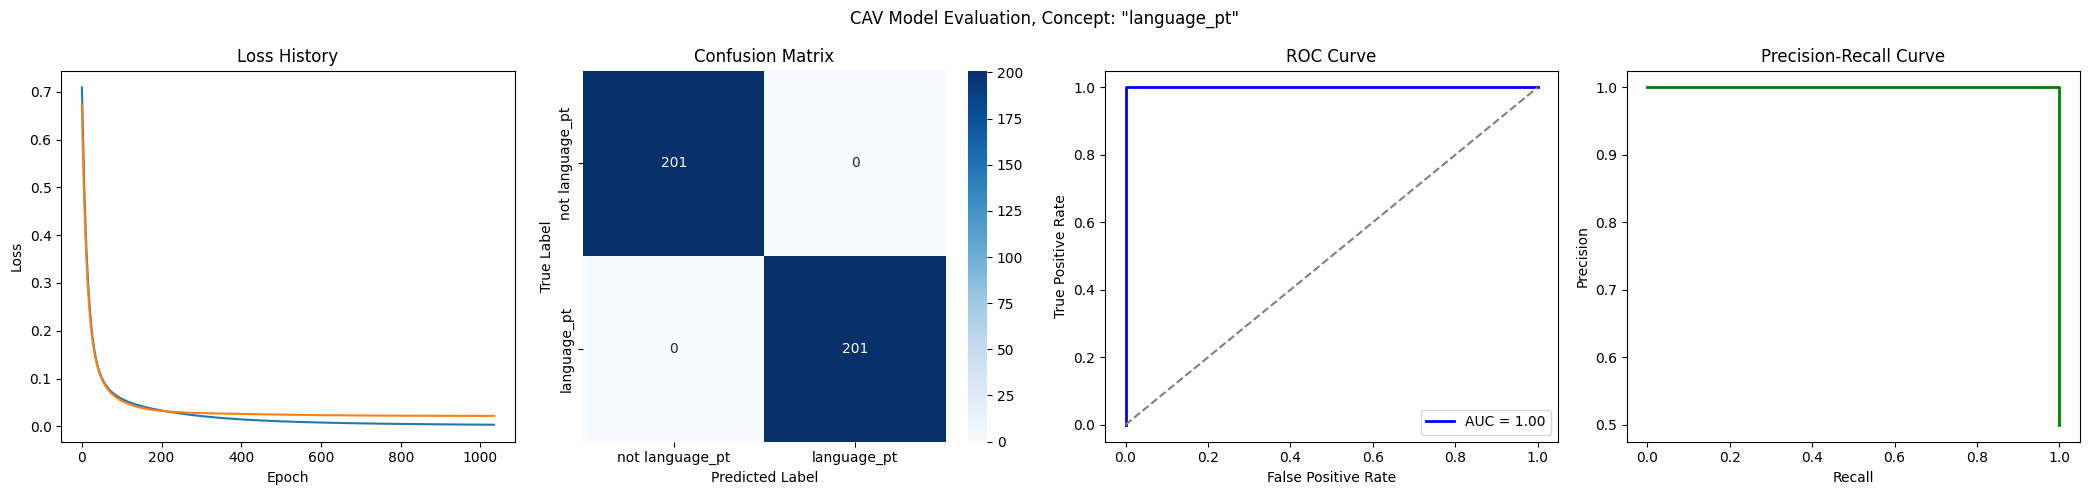


Fitting project: language_pt for encoder: muq_large_msd
Epoch 1/10000
Epoch 1 Train Loss: 0.7019
Epoch 1 Validation Loss: 0.6949
Model saved to trainings/language_pt/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.2546
Epoch 101 Validation Loss: 0.4901
Model saved to trainings/language_pt/state_dict.pth
Early stopping at epoch 169
Loss history saved to trainings/language_pt/loss_history.json


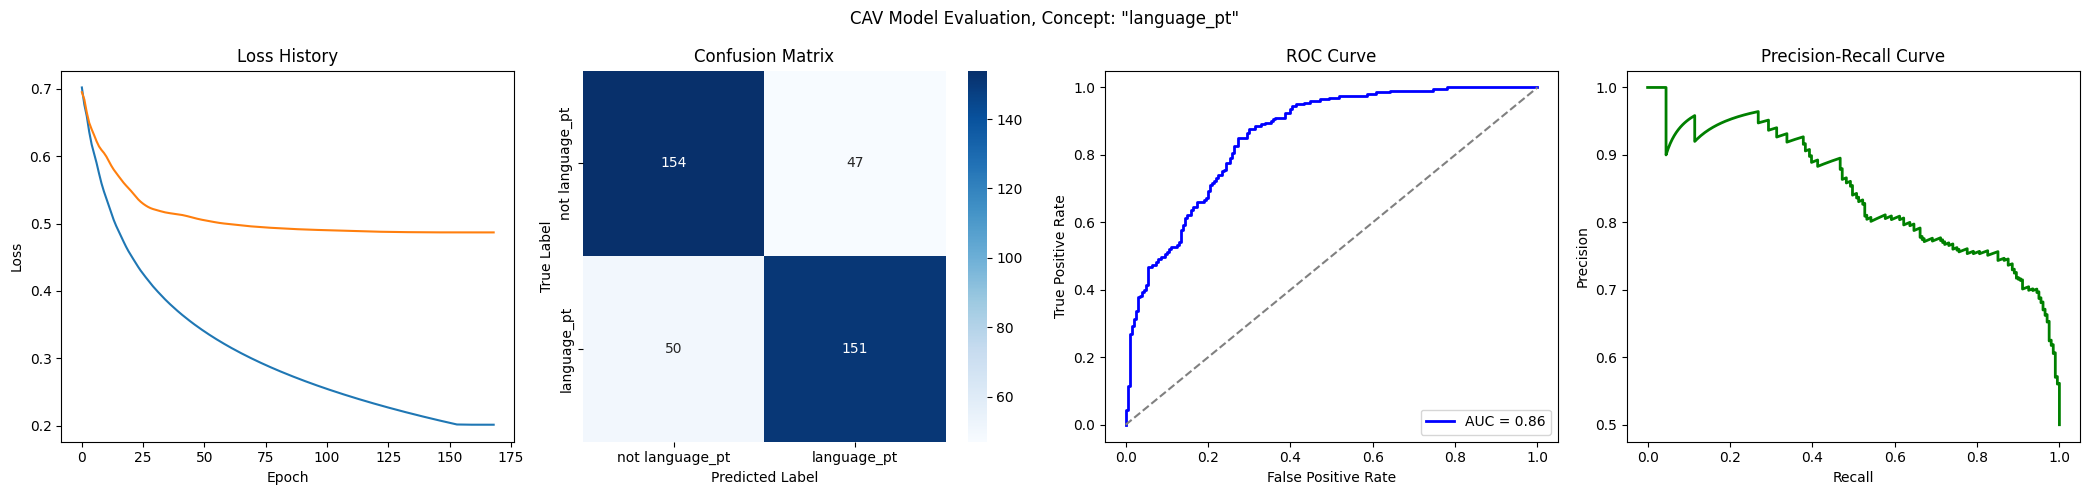


Fitting project: language_pt for encoder: muq_mulan_large
Epoch 1/10000
Epoch 1 Train Loss: 0.6960
Epoch 1 Validation Loss: 0.6913
Model saved to trainings/language_pt/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.5668
Epoch 101 Validation Loss: 0.6153
Model saved to trainings/language_pt/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.5322
Epoch 201 Validation Loss: 0.5935
Model saved to trainings/language_pt/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.5126
Epoch 301 Validation Loss: 0.5843
Model saved to trainings/language_pt/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.4989
Epoch 401 Validation Loss: 0.5796
Model saved to trainings/language_pt/state_dict.pth
Early stopping at epoch 498
Loss history saved to trainings/language_pt/loss_history.json


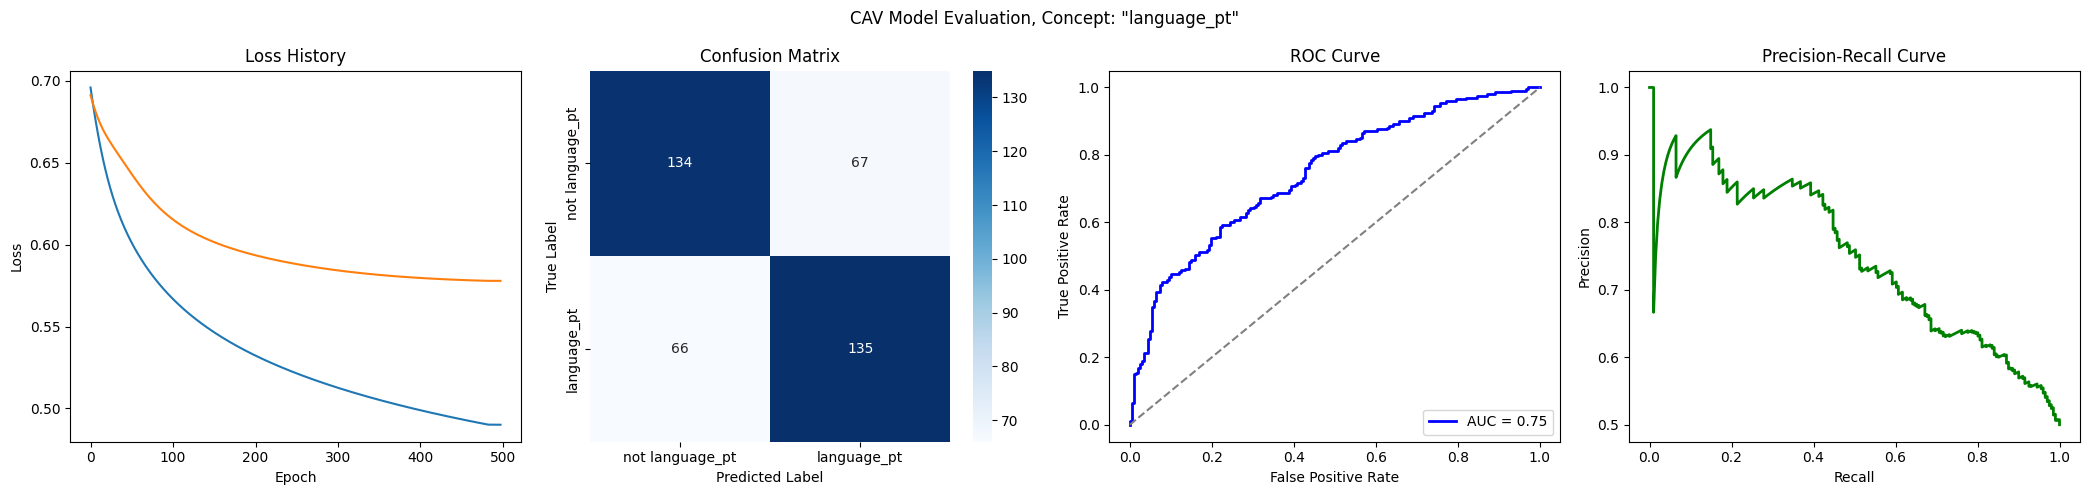

In [ ]:
train_variations = [*itertools.product(project_names, encoder_ids)]


for project_name, (encoder_id, embedding_dim) in train_variations:
    print(f"\nFitting project: {project_name} for encoder: {encoder_id}")
    df = load_df_and_embeddings(
        project_name, "train", encoder_id, dataset_prefix, embedding_prefix, s3
    )

    training_sample_count = int(len(df) * train_val_split)
    validation_sample_count = len(df) - training_sample_count

    df_test = load_df_and_embeddings(
        project_name, "test", encoder_id, dataset_prefix, embedding_prefix, s3
    )

    cav_vector, evaluation_metric = train_one_cav(
        random_state=0,
        df=df,
        project_name=project_name,
        training_sample_count=training_sample_count,
        validation_sample_count=validation_sample_count,
        epochs=epochs,
        learning_rate=learning_rate,
        embedding_dim=embedding_dim,
        dropout_rate=dropout_rate,
        df_test=df_test,
    )

    store_cav_vector_array(
        cav_vector,
        f"cav_full_{project_name}.npy",
        encoder_id,
        project_name,
    )
    store_evaluation_metrics(
        evaluation_metric,
        f"evaluation_metrics_full_{project_name}.json",
        encoder_id,
        project_name,
    )


Fitting project: gender_female for encoder: mert_v1_95m
Epoch 1/5000
Epoch 1 Train Loss: 0.6942
Epoch 1 Validation Loss: 0.6874
Model saved to trainings/gender_female/state_dict.pth
Epoch 101/5000
Epoch 101 Train Loss: 0.4106
Epoch 101 Validation Loss: 0.4301
Model saved to trainings/gender_female/state_dict.pth
Epoch 201/5000
Epoch 201 Train Loss: 0.3530
Epoch 201 Validation Loss: 0.3990
Model saved to trainings/gender_female/state_dict.pth
Epoch 301/5000
Epoch 301 Train Loss: 0.3246
Epoch 301 Validation Loss: 0.3906
Model saved to trainings/gender_female/state_dict.pth
Epoch 401/5000
Epoch 401 Train Loss: 0.3067
Epoch 401 Validation Loss: 0.3883
Model saved to trainings/gender_female/state_dict.pth
Early stopping at epoch 422
Loss history saved to trainings/gender_female/loss_history.json


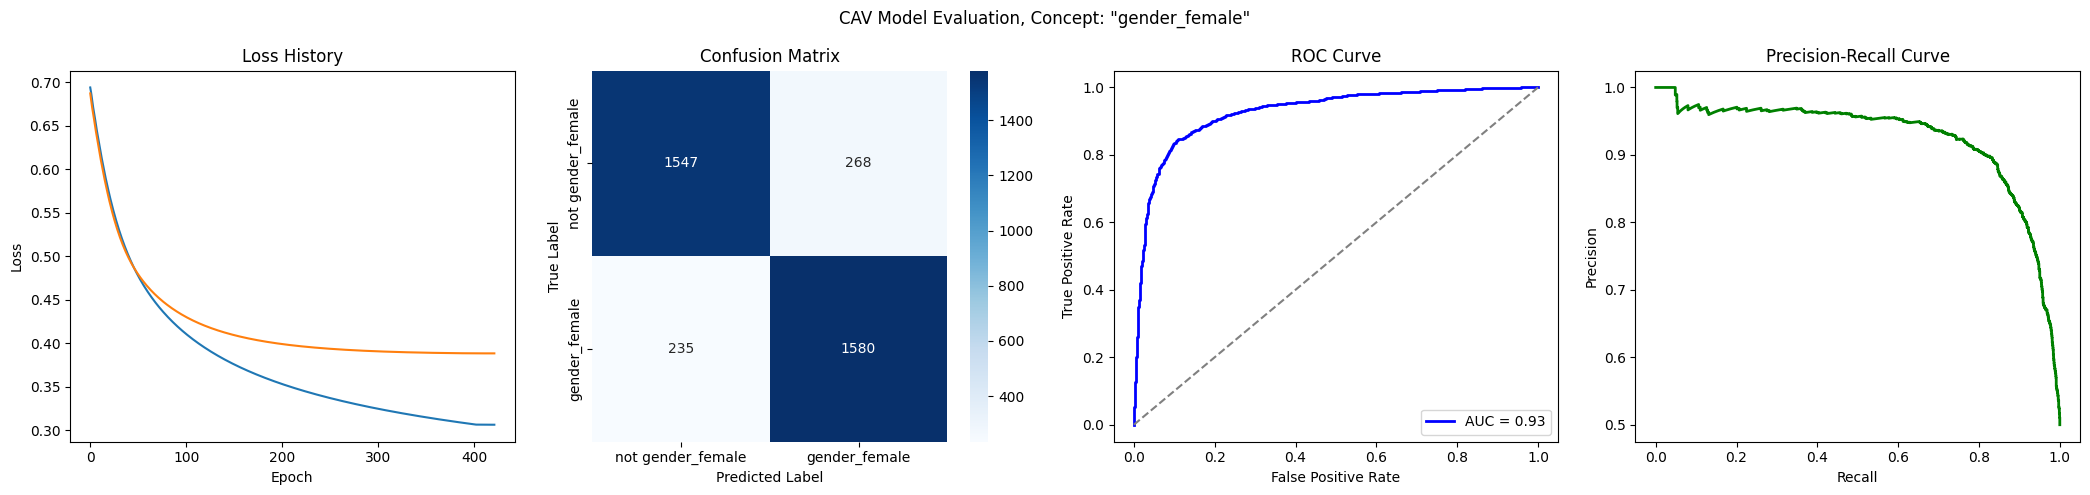


Fitting project: gender_female for encoder: whisper_large_v2
Epoch 1/5000
Epoch 1 Train Loss: 0.6961
Epoch 1 Validation Loss: 0.7084
Model saved to trainings/gender_female/state_dict.pth
Epoch 101/5000
Epoch 101 Train Loss: 0.4630
Epoch 101 Validation Loss: 0.4933
Model saved to trainings/gender_female/state_dict.pth
Epoch 201/5000
Epoch 201 Train Loss: 0.3698
Epoch 201 Validation Loss: 0.4172
Model saved to trainings/gender_female/state_dict.pth
Epoch 301/5000
Epoch 301 Train Loss: 0.3206
Epoch 301 Validation Loss: 0.3820
Model saved to trainings/gender_female/state_dict.pth
Epoch 401/5000
Epoch 401 Train Loss: 0.2894
Epoch 401 Validation Loss: 0.3630
Model saved to trainings/gender_female/state_dict.pth
Epoch 501/5000
Epoch 501 Train Loss: 0.2673
Epoch 501 Validation Loss: 0.3519
Model saved to trainings/gender_female/state_dict.pth
Epoch 601/5000
Epoch 601 Train Loss: 0.2503
Epoch 601 Validation Loss: 0.3452
Model saved to trainings/gender_female/state_dict.pth
Epoch 701/5000
Epoch

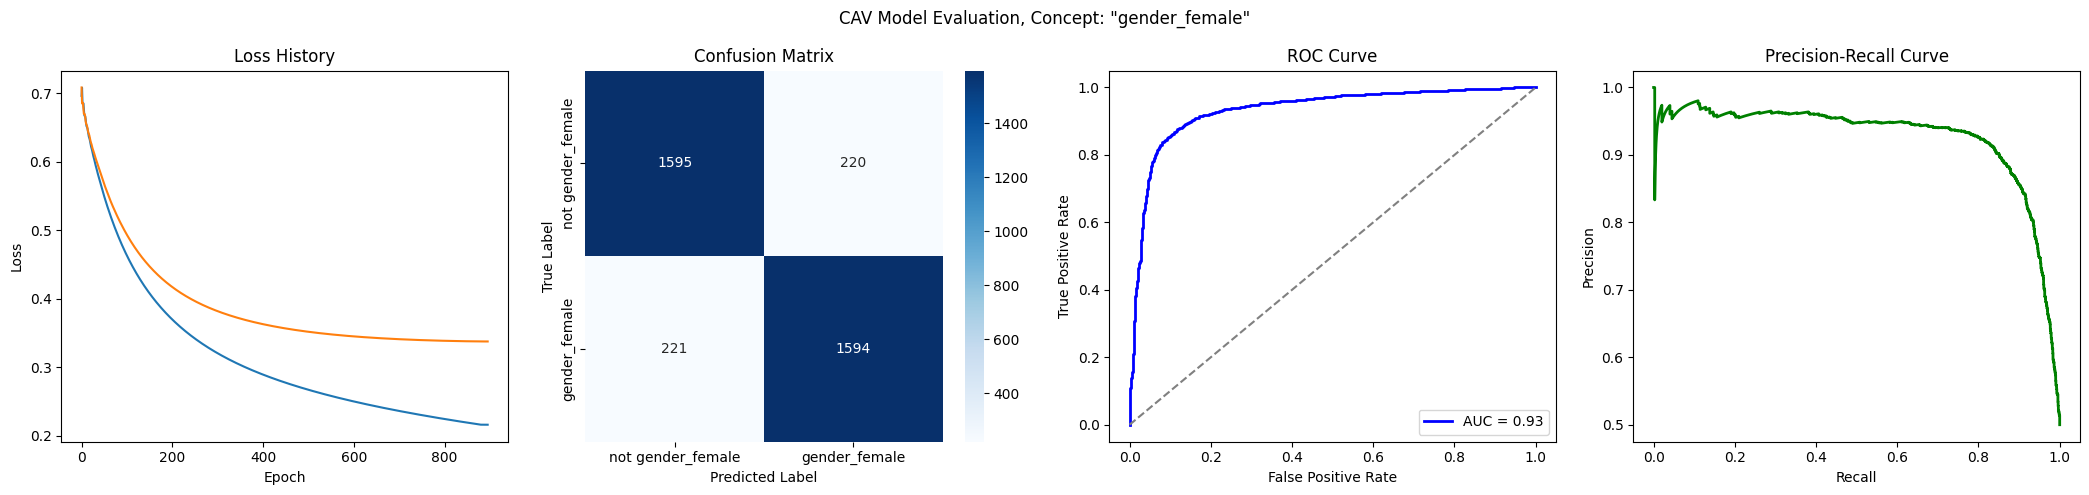


Fitting project: gender_female for encoder: muq_large_msd
Epoch 1/5000
Epoch 1 Train Loss: 0.6962
Epoch 1 Validation Loss: 0.6738
Model saved to trainings/gender_female/state_dict.pth
Epoch 101/5000
Epoch 101 Train Loss: 0.2850
Epoch 101 Validation Loss: 0.3799
Model saved to trainings/gender_female/state_dict.pth
Early stopping at epoch 157
Loss history saved to trainings/gender_female/loss_history.json


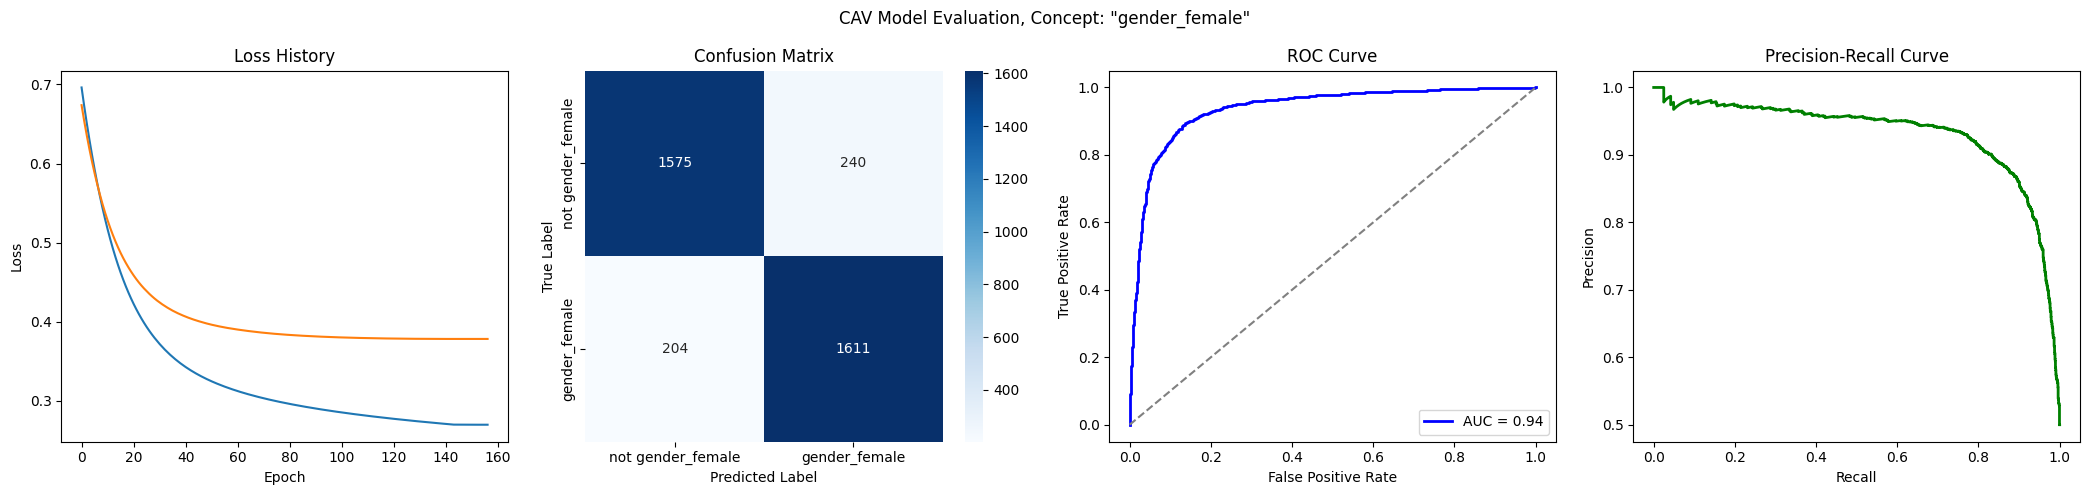


Fitting project: gender_female for encoder: muq_mulan_large
Epoch 1/5000
Epoch 1 Train Loss: 0.6934
Epoch 1 Validation Loss: 0.6913
Model saved to trainings/gender_female/state_dict.pth
Epoch 101/5000
Epoch 101 Train Loss: 0.6124
Epoch 101 Validation Loss: 0.6132
Model saved to trainings/gender_female/state_dict.pth
Epoch 201/5000
Epoch 201 Train Loss: 0.5892
Epoch 201 Validation Loss: 0.5973
Model saved to trainings/gender_female/state_dict.pth
Epoch 301/5000
Epoch 301 Train Loss: 0.5751
Epoch 301 Validation Loss: 0.5871
Model saved to trainings/gender_female/state_dict.pth
Epoch 401/5000
Epoch 401 Train Loss: 0.5643
Epoch 401 Validation Loss: 0.5788
Model saved to trainings/gender_female/state_dict.pth
Epoch 501/5000
Epoch 501 Train Loss: 0.5550
Epoch 501 Validation Loss: 0.5715
Model saved to trainings/gender_female/state_dict.pth
Epoch 601/5000
Epoch 601 Train Loss: 0.5465
Epoch 601 Validation Loss: 0.5648
Model saved to trainings/gender_female/state_dict.pth
Epoch 701/5000
Epoch 

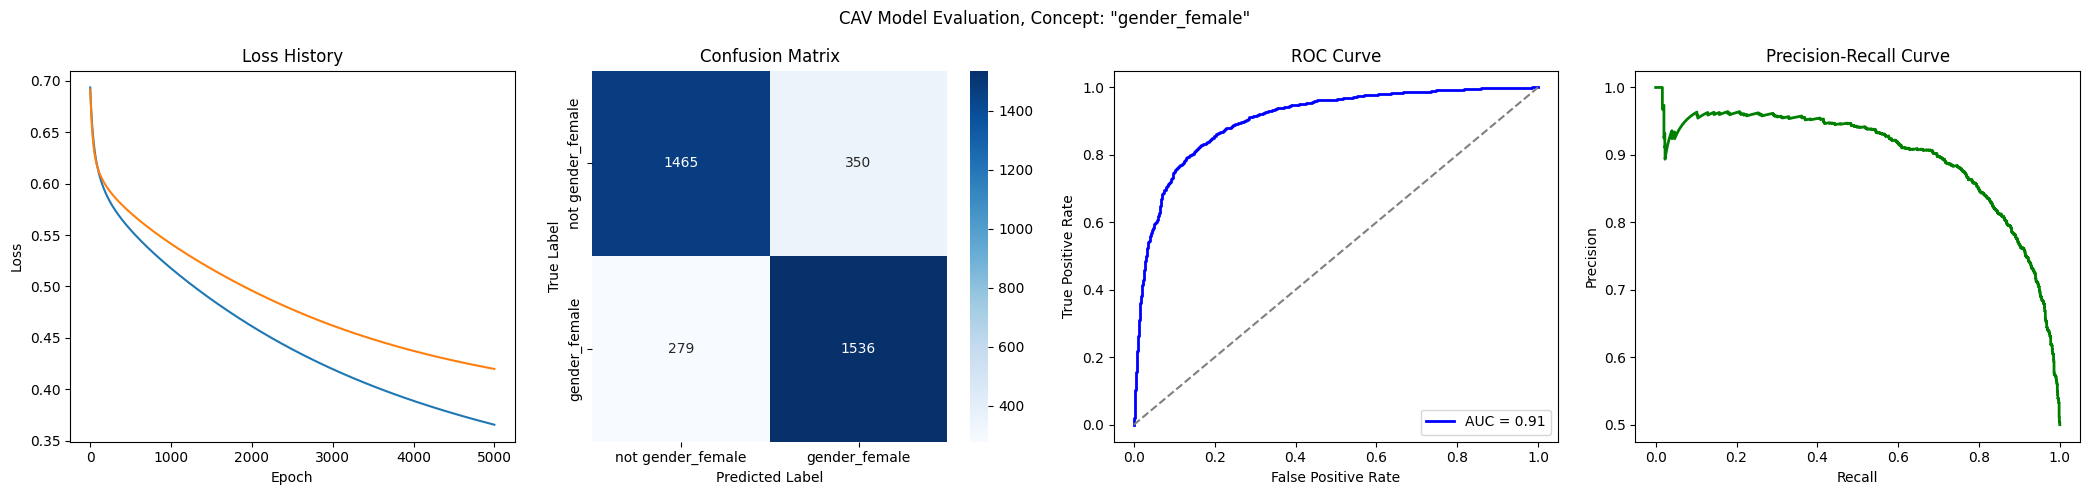


Fitting project: gender_male for encoder: mert_v1_95m
Epoch 1/5000
Epoch 1 Train Loss: 0.6981
Epoch 1 Validation Loss: 0.6911
Model saved to trainings/gender_male/state_dict.pth
Epoch 101/5000
Epoch 101 Train Loss: 0.4034
Epoch 101 Validation Loss: 0.4422
Model saved to trainings/gender_male/state_dict.pth
Epoch 201/5000
Epoch 201 Train Loss: 0.3441
Epoch 201 Validation Loss: 0.3994
Model saved to trainings/gender_male/state_dict.pth
Epoch 301/5000
Epoch 301 Train Loss: 0.3149
Epoch 301 Validation Loss: 0.3817
Model saved to trainings/gender_male/state_dict.pth
Epoch 401/5000
Epoch 401 Train Loss: 0.2964
Epoch 401 Validation Loss: 0.3731
Model saved to trainings/gender_male/state_dict.pth
Epoch 501/5000
Epoch 501 Train Loss: 0.2830
Epoch 501 Validation Loss: 0.3685
Model saved to trainings/gender_male/state_dict.pth
Epoch 601/5000
Epoch 601 Train Loss: 0.2727
Epoch 601 Validation Loss: 0.3662
Model saved to trainings/gender_male/state_dict.pth
Early stopping at epoch 684
Loss history 

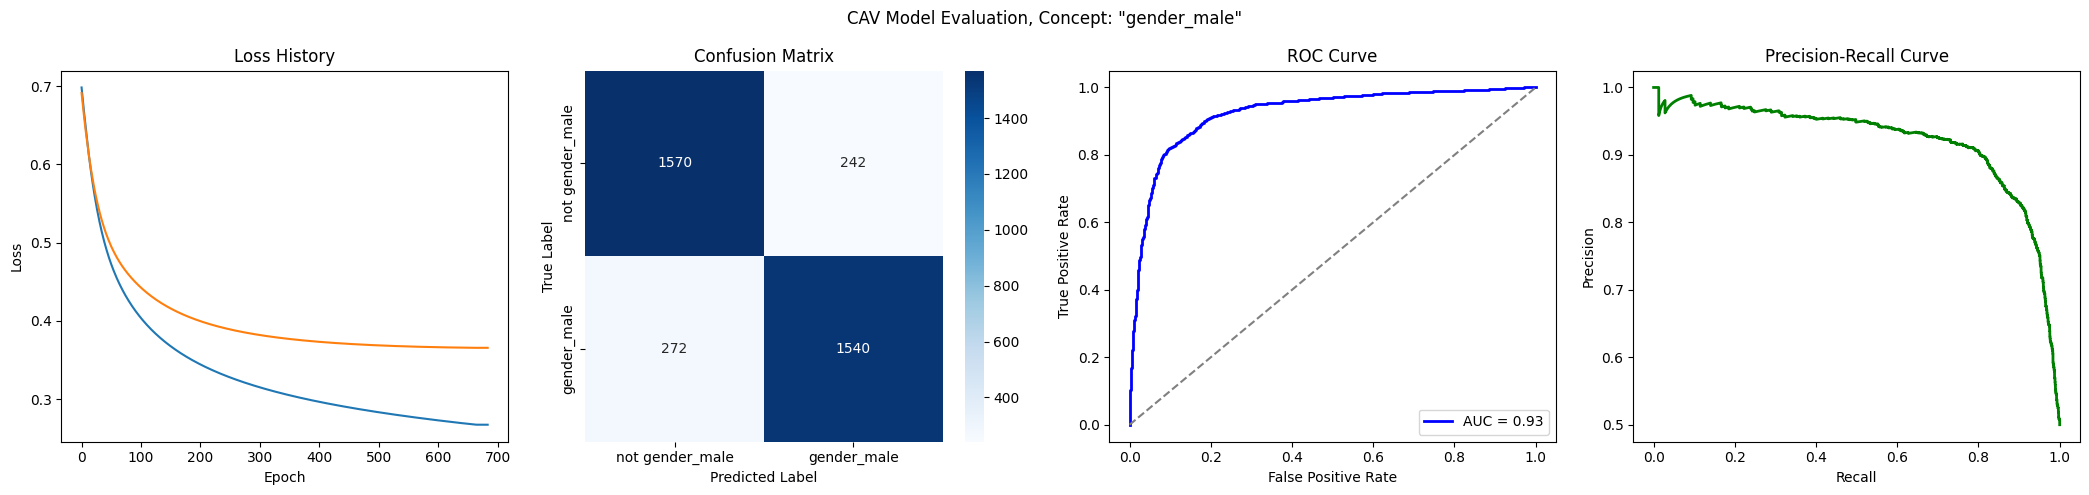


Fitting project: gender_male for encoder: whisper_large_v2
Epoch 1/5000
Epoch 1 Train Loss: 0.7052
Epoch 1 Validation Loss: 0.7035
Model saved to trainings/gender_male/state_dict.pth
Epoch 101/5000
Epoch 101 Train Loss: 0.4572
Epoch 101 Validation Loss: 0.4844
Model saved to trainings/gender_male/state_dict.pth
Epoch 201/5000
Epoch 201 Train Loss: 0.3633
Epoch 201 Validation Loss: 0.4017
Model saved to trainings/gender_male/state_dict.pth
Epoch 301/5000
Epoch 301 Train Loss: 0.3145
Epoch 301 Validation Loss: 0.3614
Model saved to trainings/gender_male/state_dict.pth
Epoch 401/5000
Epoch 401 Train Loss: 0.2837
Epoch 401 Validation Loss: 0.3381
Model saved to trainings/gender_male/state_dict.pth
Epoch 501/5000
Epoch 501 Train Loss: 0.2618
Epoch 501 Validation Loss: 0.3232
Model saved to trainings/gender_male/state_dict.pth
Epoch 601/5000
Epoch 601 Train Loss: 0.2449
Epoch 601 Validation Loss: 0.3133
Model saved to trainings/gender_male/state_dict.pth
Epoch 701/5000
Epoch 701 Train Loss:

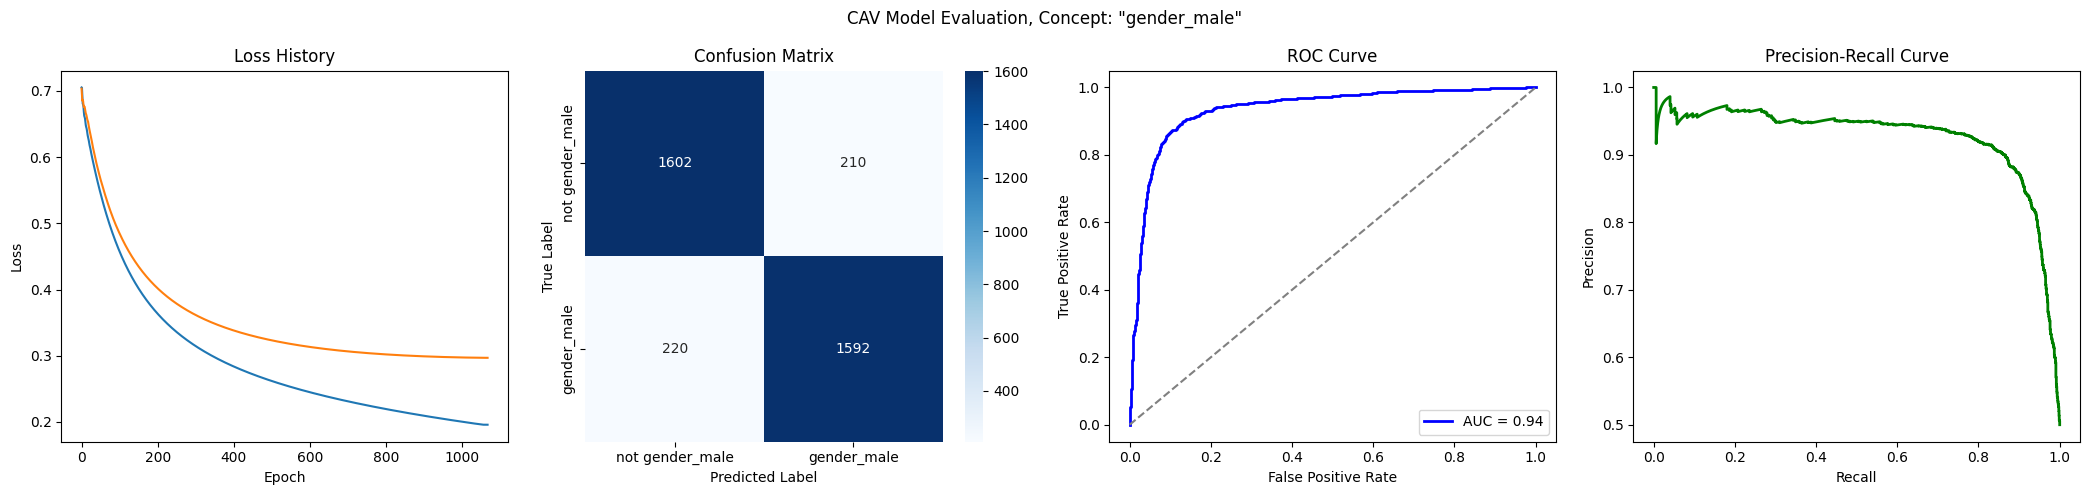


Fitting project: gender_male for encoder: muq_large_msd
Epoch 1/5000
Epoch 1 Train Loss: 0.6887
Epoch 1 Validation Loss: 0.6700
Model saved to trainings/gender_male/state_dict.pth
Epoch 101/5000
Epoch 101 Train Loss: 0.2865
Epoch 101 Validation Loss: 0.3140
Model saved to trainings/gender_male/state_dict.pth
Epoch 201/5000
Epoch 201 Train Loss: 0.2558
Epoch 201 Validation Loss: 0.3009
Model saved to trainings/gender_male/state_dict.pth
Early stopping at epoch 297
Loss history saved to trainings/gender_male/loss_history.json


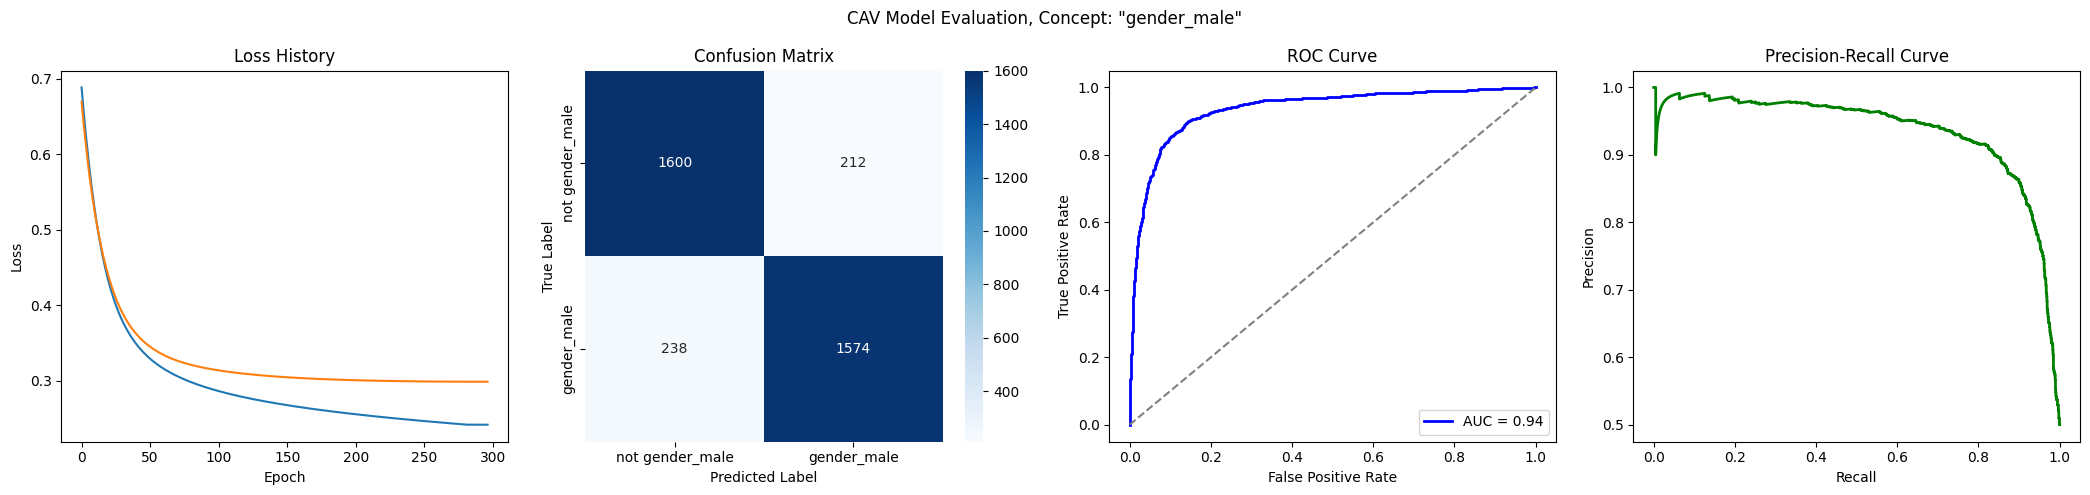


Fitting project: gender_male for encoder: muq_mulan_large
Epoch 1/5000
Epoch 1 Train Loss: 0.6925
Epoch 1 Validation Loss: 0.6902
Model saved to trainings/gender_male/state_dict.pth
Epoch 101/5000
Epoch 101 Train Loss: 0.6071
Epoch 101 Validation Loss: 0.6261
Model saved to trainings/gender_male/state_dict.pth
Epoch 201/5000
Epoch 201 Train Loss: 0.5824
Epoch 201 Validation Loss: 0.6105
Model saved to trainings/gender_male/state_dict.pth
Epoch 301/5000
Epoch 301 Train Loss: 0.5675
Epoch 301 Validation Loss: 0.6001
Model saved to trainings/gender_male/state_dict.pth
Epoch 401/5000
Epoch 401 Train Loss: 0.5565
Epoch 401 Validation Loss: 0.5916
Model saved to trainings/gender_male/state_dict.pth
Epoch 501/5000
Epoch 501 Train Loss: 0.5475
Epoch 501 Validation Loss: 0.5839
Model saved to trainings/gender_male/state_dict.pth
Epoch 601/5000
Epoch 601 Train Loss: 0.5395
Epoch 601 Validation Loss: 0.5767
Model saved to trainings/gender_male/state_dict.pth
Epoch 701/5000
Epoch 701 Train Loss: 

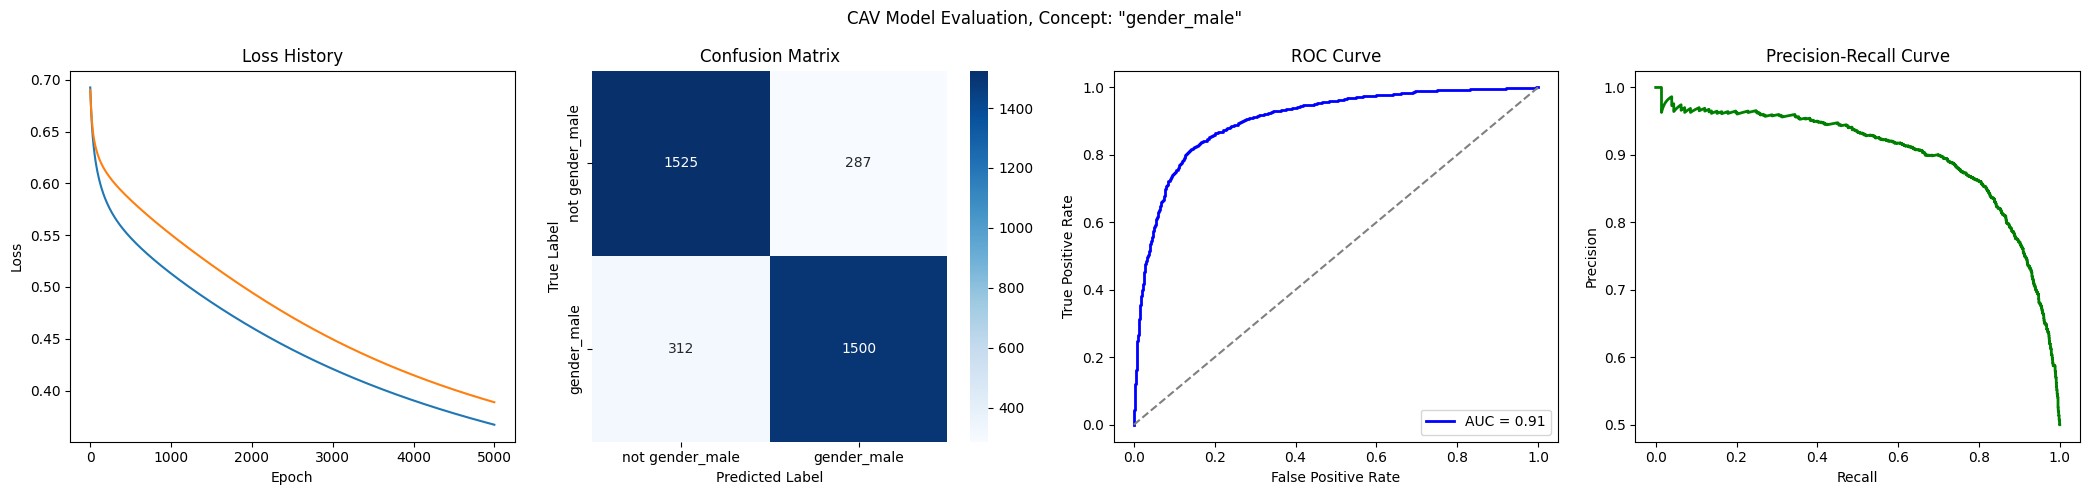


Fitting project: language_de for encoder: mert_v1_95m
Epoch 1/5000
Epoch 1 Train Loss: 0.6945
Epoch 1 Validation Loss: 0.6938
Model saved to trainings/language_de/state_dict.pth
Early stopping at epoch 51
Loss history saved to trainings/language_de/loss_history.json


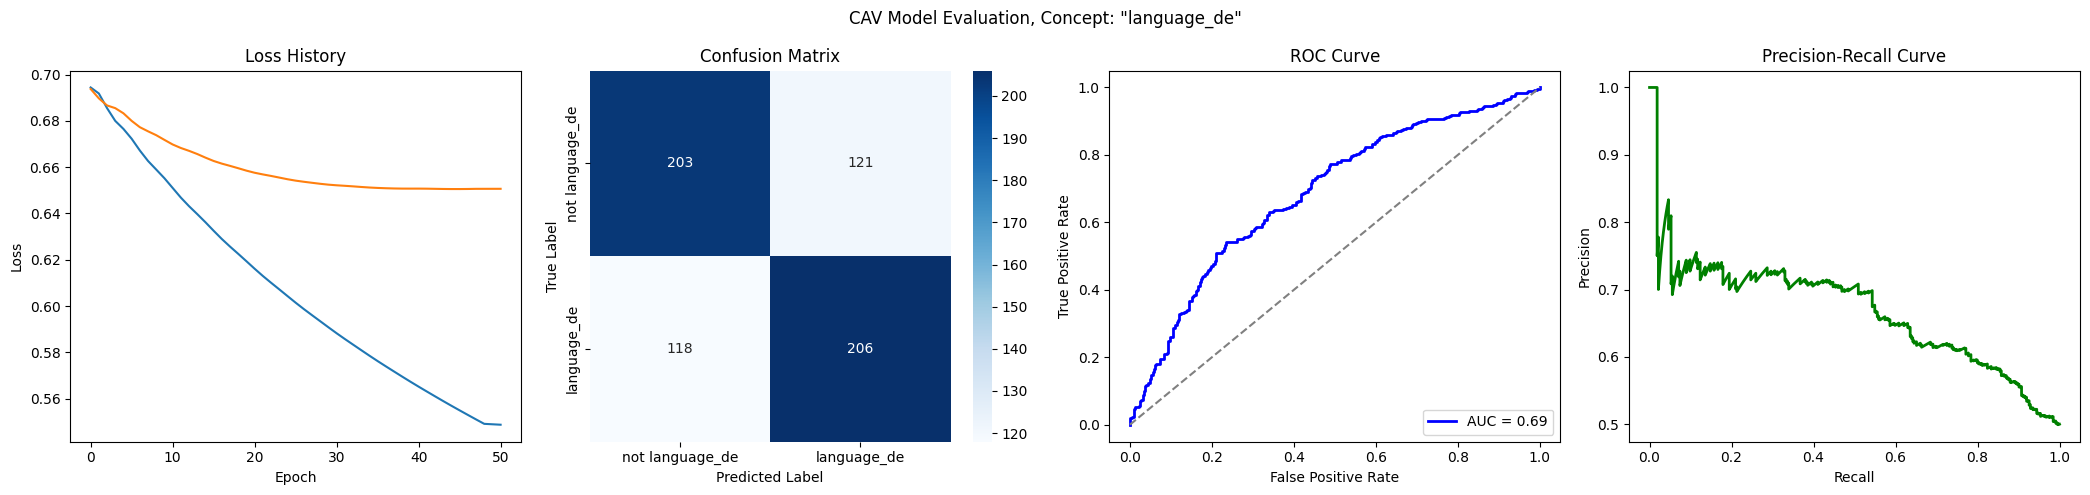


Fitting project: language_de for encoder: whisper_large_v2
Epoch 1/5000
Epoch 1 Train Loss: 0.6979
Epoch 1 Validation Loss: 0.6548
Model saved to trainings/language_de/state_dict.pth
Epoch 101/5000
Epoch 101 Train Loss: 0.0699
Epoch 101 Validation Loss: 0.0542
Model saved to trainings/language_de/state_dict.pth
Epoch 201/5000
Epoch 201 Train Loss: 0.0418
Epoch 201 Validation Loss: 0.0394
Model saved to trainings/language_de/state_dict.pth
Epoch 301/5000
Epoch 301 Train Loss: 0.0279
Epoch 301 Validation Loss: 0.0329
Model saved to trainings/language_de/state_dict.pth
Epoch 401/5000
Epoch 401 Train Loss: 0.0197
Epoch 401 Validation Loss: 0.0281
Model saved to trainings/language_de/state_dict.pth
Epoch 501/5000
Epoch 501 Train Loss: 0.0146
Epoch 501 Validation Loss: 0.0243
Model saved to trainings/language_de/state_dict.pth
Epoch 601/5000
Epoch 601 Train Loss: 0.0112
Epoch 601 Validation Loss: 0.0214
Model saved to trainings/language_de/state_dict.pth
Epoch 701/5000
Epoch 701 Train Loss:

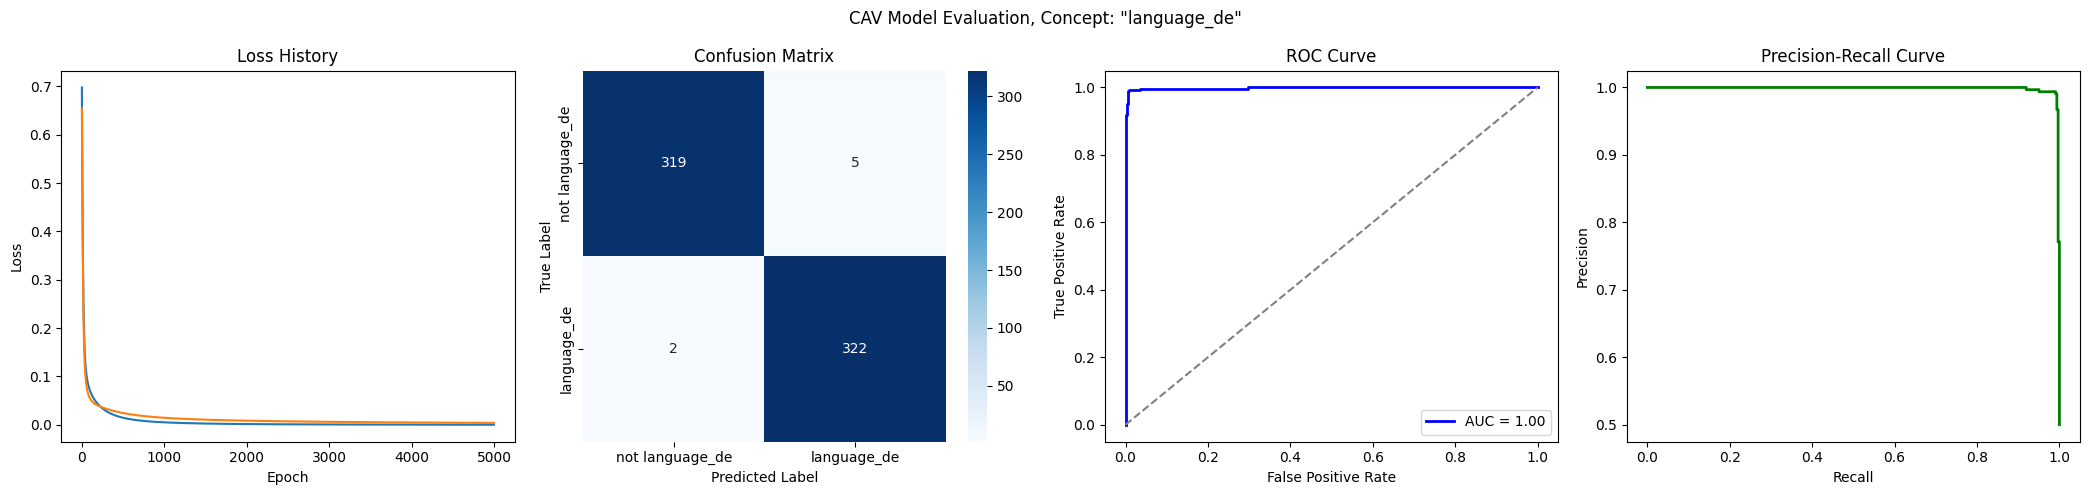


Fitting project: language_de for encoder: muq_large_msd
Epoch 1/5000
Epoch 1 Train Loss: 0.6868
Epoch 1 Validation Loss: 0.6656
Model saved to trainings/language_de/state_dict.pth
Epoch 101/5000
Epoch 101 Train Loss: 0.1966
Epoch 101 Validation Loss: 0.4091
Model saved to trainings/language_de/state_dict.pth
Early stopping at epoch 172
Loss history saved to trainings/language_de/loss_history.json


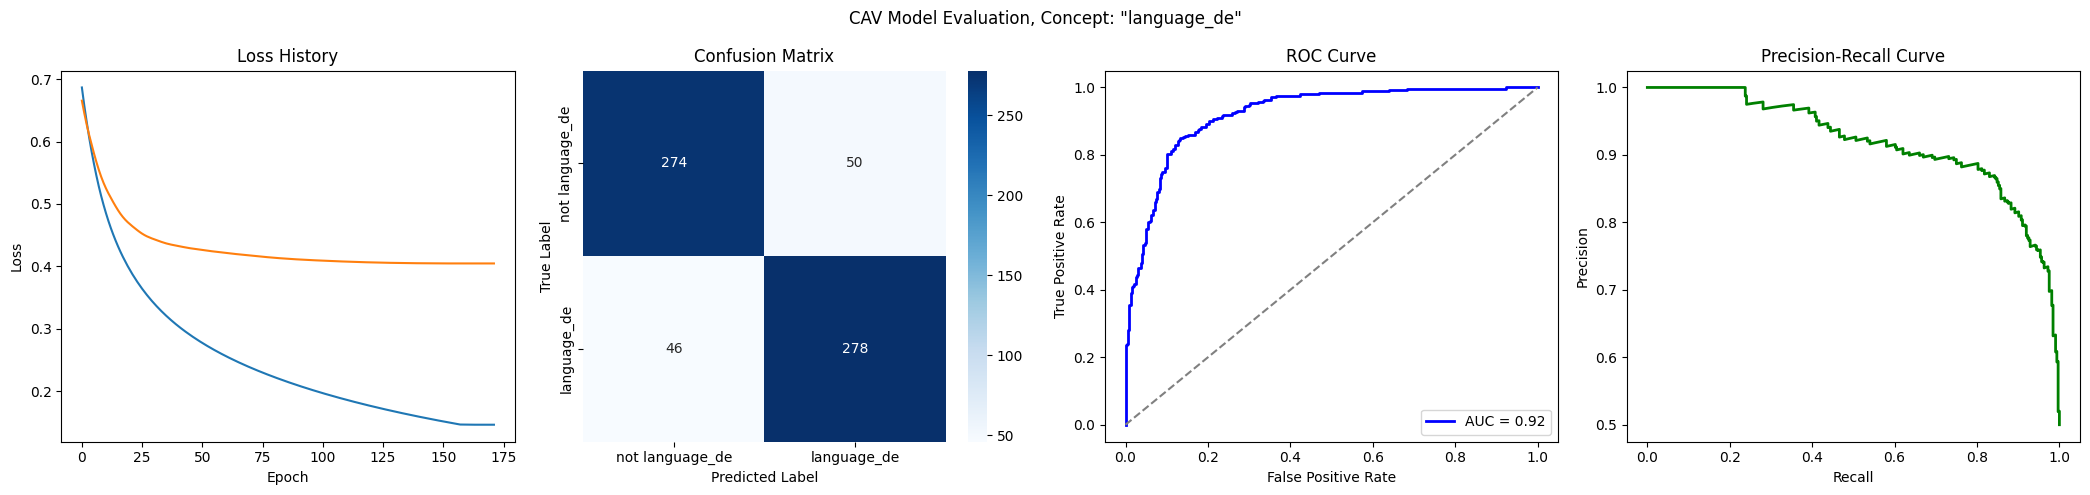


Fitting project: language_de for encoder: muq_mulan_large
Epoch 1/5000
Epoch 1 Train Loss: 0.6934
Epoch 1 Validation Loss: 0.6896
Model saved to trainings/language_de/state_dict.pth
Epoch 101/5000
Epoch 101 Train Loss: 0.5424
Epoch 101 Validation Loss: 0.5696
Model saved to trainings/language_de/state_dict.pth
Epoch 201/5000
Epoch 201 Train Loss: 0.4945
Epoch 201 Validation Loss: 0.5568
Model saved to trainings/language_de/state_dict.pth
Early stopping at epoch 213
Loss history saved to trainings/language_de/loss_history.json


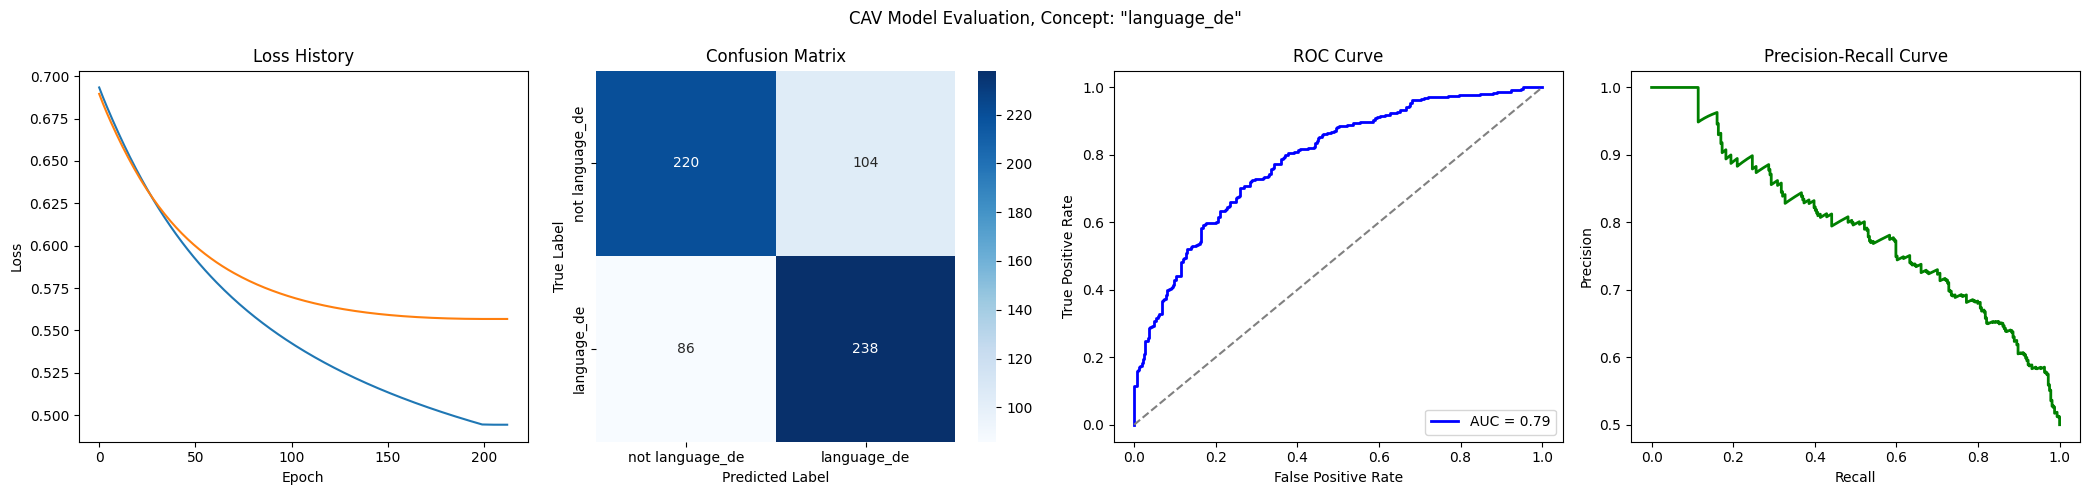


Fitting project: language_en for encoder: mert_v1_95m
Epoch 1/5000
Epoch 1 Train Loss: 0.6930
Epoch 1 Validation Loss: 0.6989
Model saved to trainings/language_en/state_dict.pth
Epoch 101/5000
Epoch 101 Train Loss: 0.5531
Epoch 101 Validation Loss: 0.6567
Model saved to trainings/language_en/state_dict.pth
Early stopping at epoch 156
Loss history saved to trainings/language_en/loss_history.json


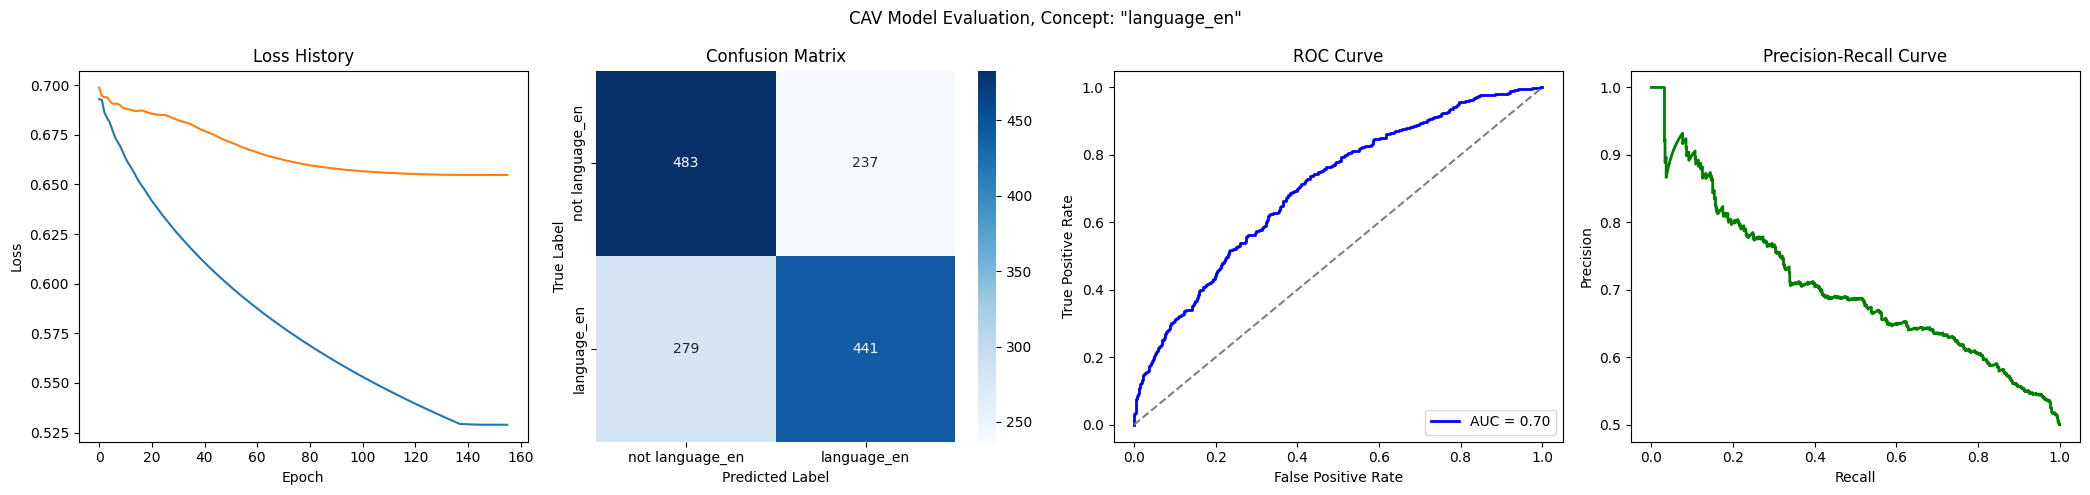


Fitting project: language_en for encoder: whisper_large_v2
Epoch 1/5000
Epoch 1 Train Loss: 0.6975
Epoch 1 Validation Loss: 0.6459
Model saved to trainings/language_en/state_dict.pth
Epoch 101/5000
Epoch 101 Train Loss: 0.0726
Epoch 101 Validation Loss: 0.0737
Model saved to trainings/language_en/state_dict.pth
Early stopping at epoch 188
Loss history saved to trainings/language_en/loss_history.json


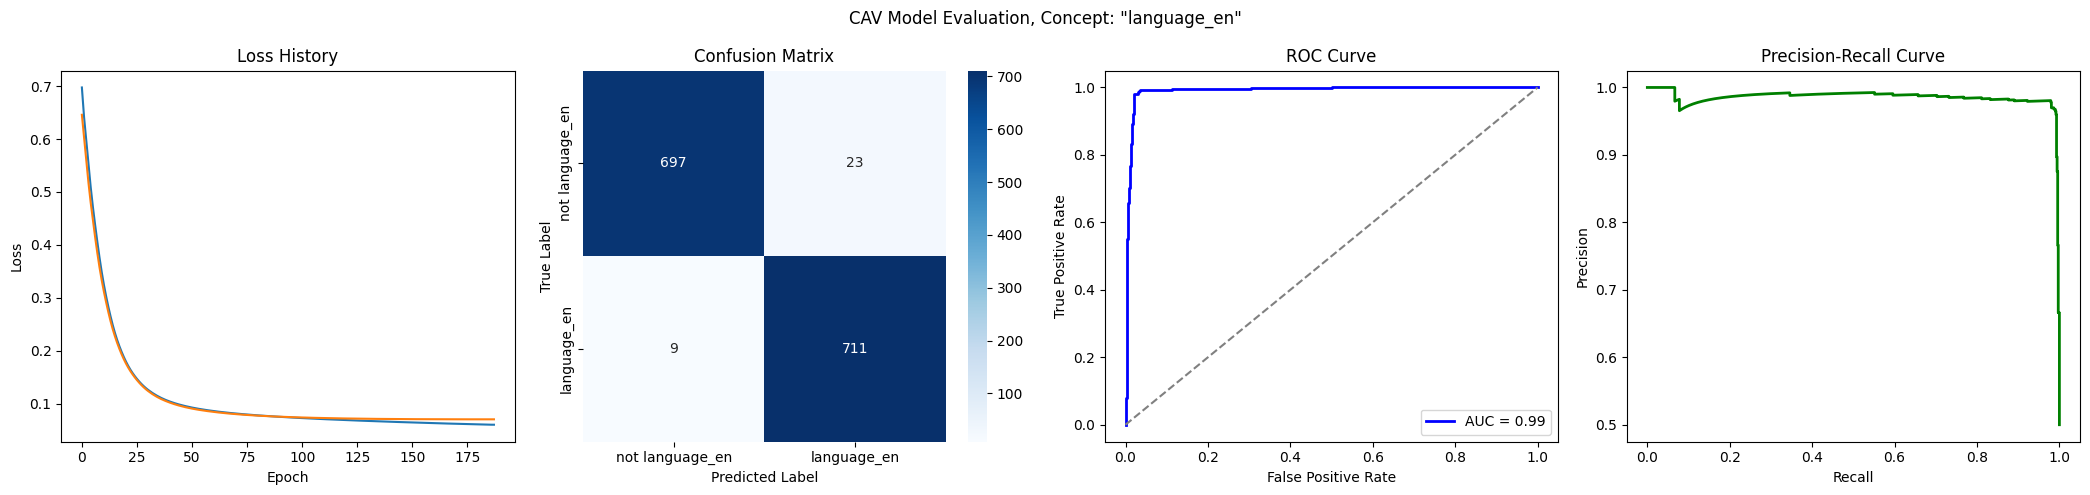


Fitting project: language_en for encoder: muq_large_msd
Epoch 1/5000
Epoch 1 Train Loss: 0.6960
Epoch 1 Validation Loss: 0.6779
Model saved to trainings/language_en/state_dict.pth
Epoch 101/5000
Epoch 101 Train Loss: 0.2352
Epoch 101 Validation Loss: 0.2824
Model saved to trainings/language_en/state_dict.pth
Epoch 201/5000
Epoch 201 Train Loss: 0.1759
Epoch 201 Validation Loss: 0.2446
Model saved to trainings/language_en/state_dict.pth
Epoch 301/5000
Epoch 301 Train Loss: 0.1449
Epoch 301 Validation Loss: 0.2343
Model saved to trainings/language_en/state_dict.pth
Early stopping at epoch 389
Loss history saved to trainings/language_en/loss_history.json


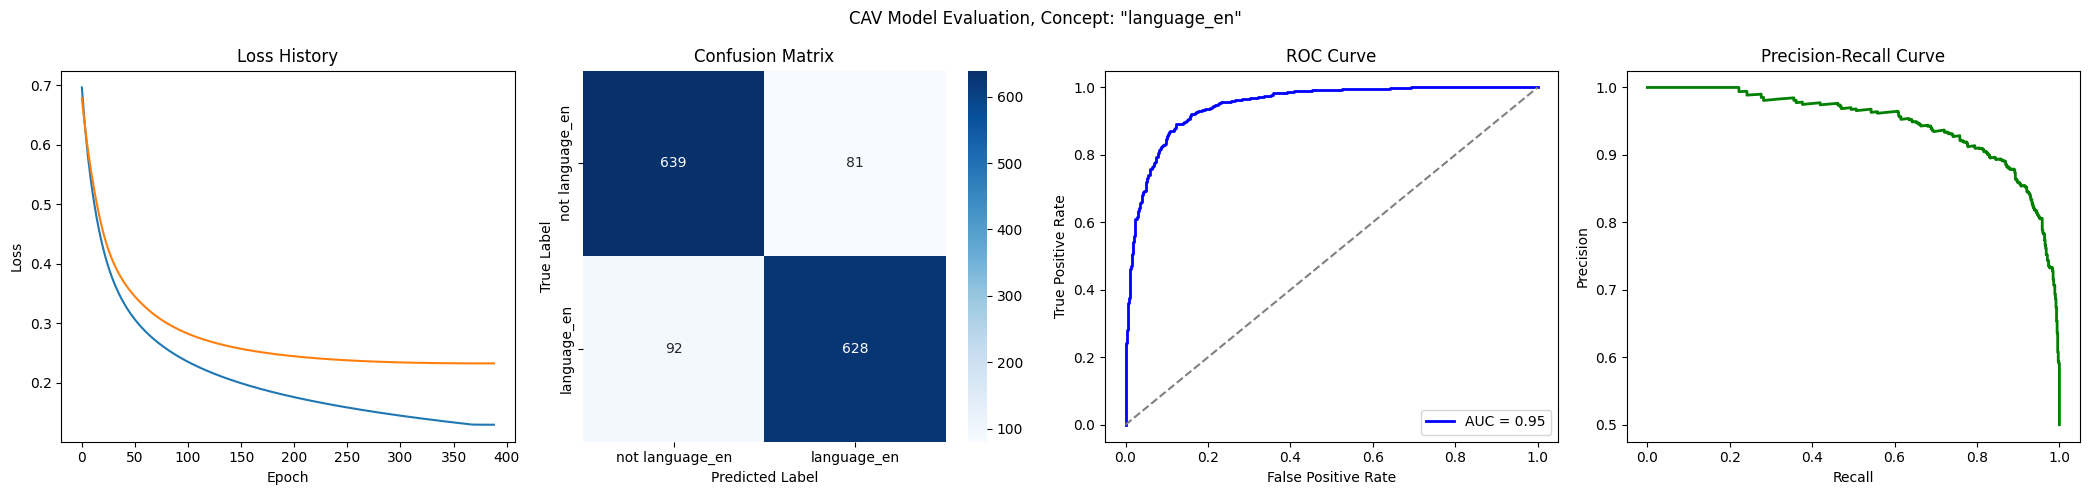


Fitting project: language_en for encoder: muq_mulan_large
Epoch 1/5000
Epoch 1 Train Loss: 0.6914
Epoch 1 Validation Loss: 0.6875
Model saved to trainings/language_en/state_dict.pth
Epoch 101/5000
Epoch 101 Train Loss: 0.5010
Epoch 101 Validation Loss: 0.4998
Model saved to trainings/language_en/state_dict.pth
Epoch 201/5000
Epoch 201 Train Loss: 0.4422
Epoch 201 Validation Loss: 0.4310
Model saved to trainings/language_en/state_dict.pth
Epoch 301/5000
Epoch 301 Train Loss: 0.4135
Epoch 301 Validation Loss: 0.3953
Model saved to trainings/language_en/state_dict.pth
Epoch 401/5000
Epoch 401 Train Loss: 0.3958
Epoch 401 Validation Loss: 0.3733
Model saved to trainings/language_en/state_dict.pth
Epoch 501/5000
Epoch 501 Train Loss: 0.3834
Epoch 501 Validation Loss: 0.3584
Model saved to trainings/language_en/state_dict.pth
Epoch 601/5000
Epoch 601 Train Loss: 0.3739
Epoch 601 Validation Loss: 0.3474
Model saved to trainings/language_en/state_dict.pth
Epoch 701/5000
Epoch 701 Train Loss: 

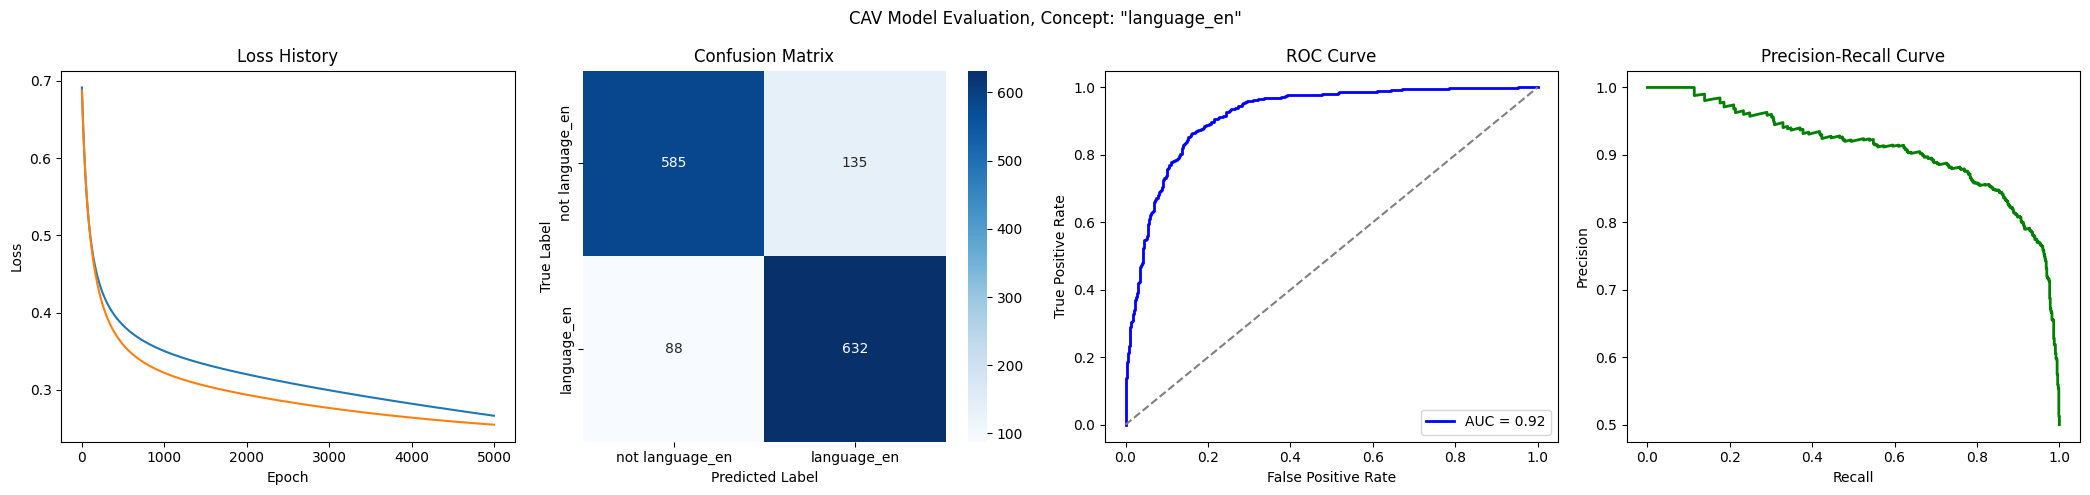


Fitting project: language_es for encoder: mert_v1_95m
Epoch 1/5000
Epoch 1 Train Loss: 0.6956
Epoch 1 Validation Loss: 0.6874
Model saved to trainings/language_es/state_dict.pth
Early stopping at epoch 96
Loss history saved to trainings/language_es/loss_history.json


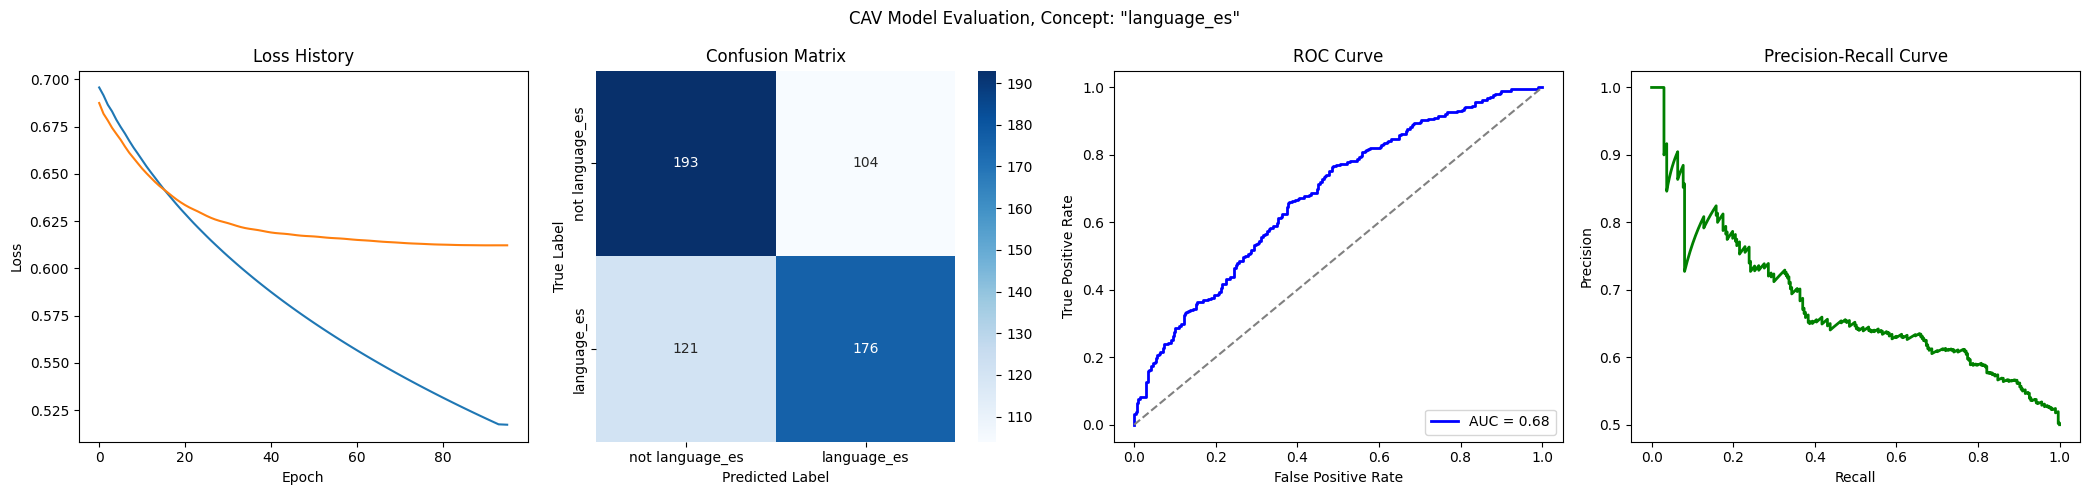


Fitting project: language_es for encoder: whisper_large_v2
Epoch 1/5000
Epoch 1 Train Loss: 0.7028
Epoch 1 Validation Loss: 0.6758
Model saved to trainings/language_es/state_dict.pth
Epoch 101/5000
Epoch 101 Train Loss: 0.1226
Epoch 101 Validation Loss: 0.0913
Model saved to trainings/language_es/state_dict.pth
Epoch 201/5000
Epoch 201 Train Loss: 0.0827
Epoch 201 Validation Loss: 0.0606
Model saved to trainings/language_es/state_dict.pth
Epoch 301/5000
Epoch 301 Train Loss: 0.0619
Epoch 301 Validation Loss: 0.0531
Model saved to trainings/language_es/state_dict.pth
Epoch 401/5000
Epoch 401 Train Loss: 0.0472
Epoch 401 Validation Loss: 0.0502
Model saved to trainings/language_es/state_dict.pth
Epoch 501/5000
Epoch 501 Train Loss: 0.0365
Epoch 501 Validation Loss: 0.0480
Model saved to trainings/language_es/state_dict.pth
Epoch 601/5000
Epoch 601 Train Loss: 0.0287
Epoch 601 Validation Loss: 0.0457
Model saved to trainings/language_es/state_dict.pth
Epoch 701/5000
Epoch 701 Train Loss:

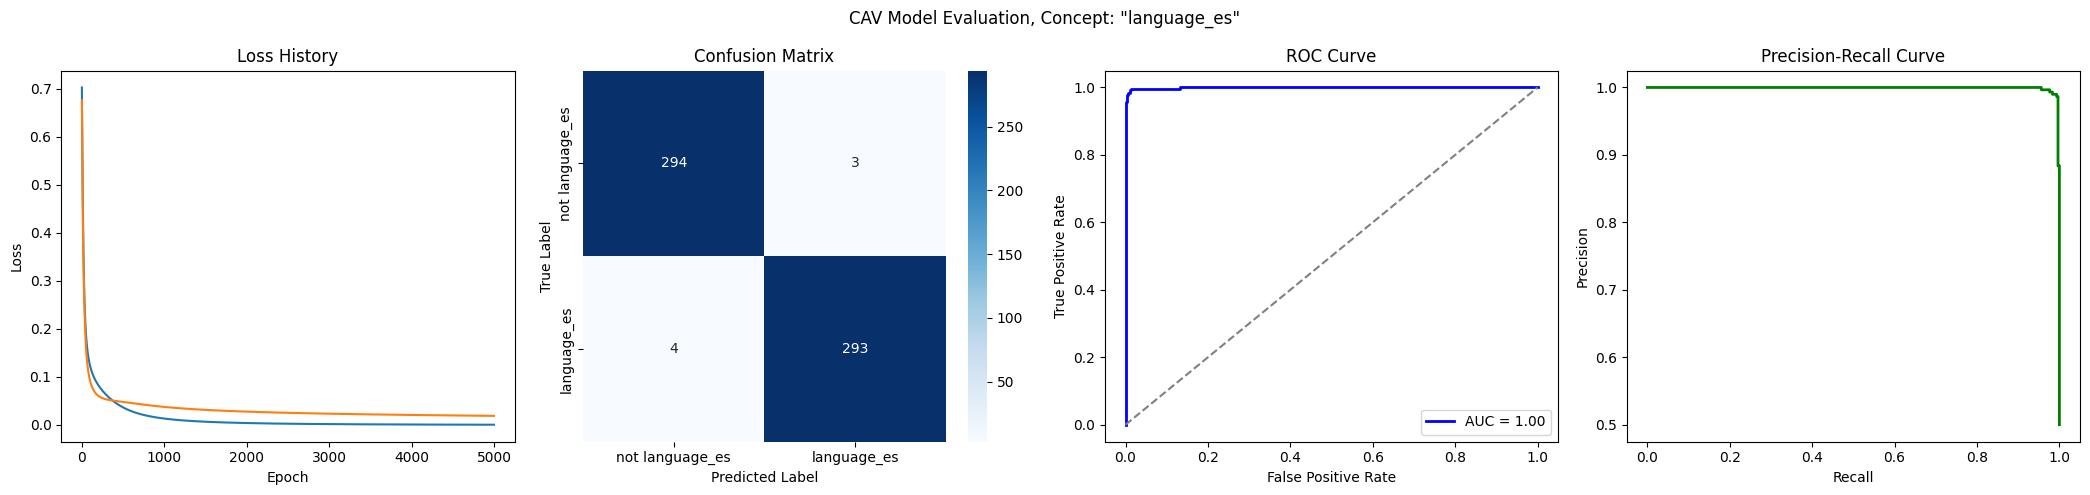


Fitting project: language_es for encoder: muq_large_msd
Epoch 1/5000
Epoch 1 Train Loss: 0.6968
Epoch 1 Validation Loss: 0.6653
Model saved to trainings/language_es/state_dict.pth
Epoch 101/5000
Epoch 101 Train Loss: 0.3212
Epoch 101 Validation Loss: 0.4560
Model saved to trainings/language_es/state_dict.pth
Epoch 201/5000
Epoch 201 Train Loss: 0.2317
Epoch 201 Validation Loss: 0.4195
Model saved to trainings/language_es/state_dict.pth
Epoch 301/5000
Epoch 301 Train Loss: 0.1790
Epoch 301 Validation Loss: 0.4056
Model saved to trainings/language_es/state_dict.pth
Epoch 401/5000
Epoch 401 Train Loss: 0.1427
Epoch 401 Validation Loss: 0.3996
Model saved to trainings/language_es/state_dict.pth
Early stopping at epoch 463
Loss history saved to trainings/language_es/loss_history.json


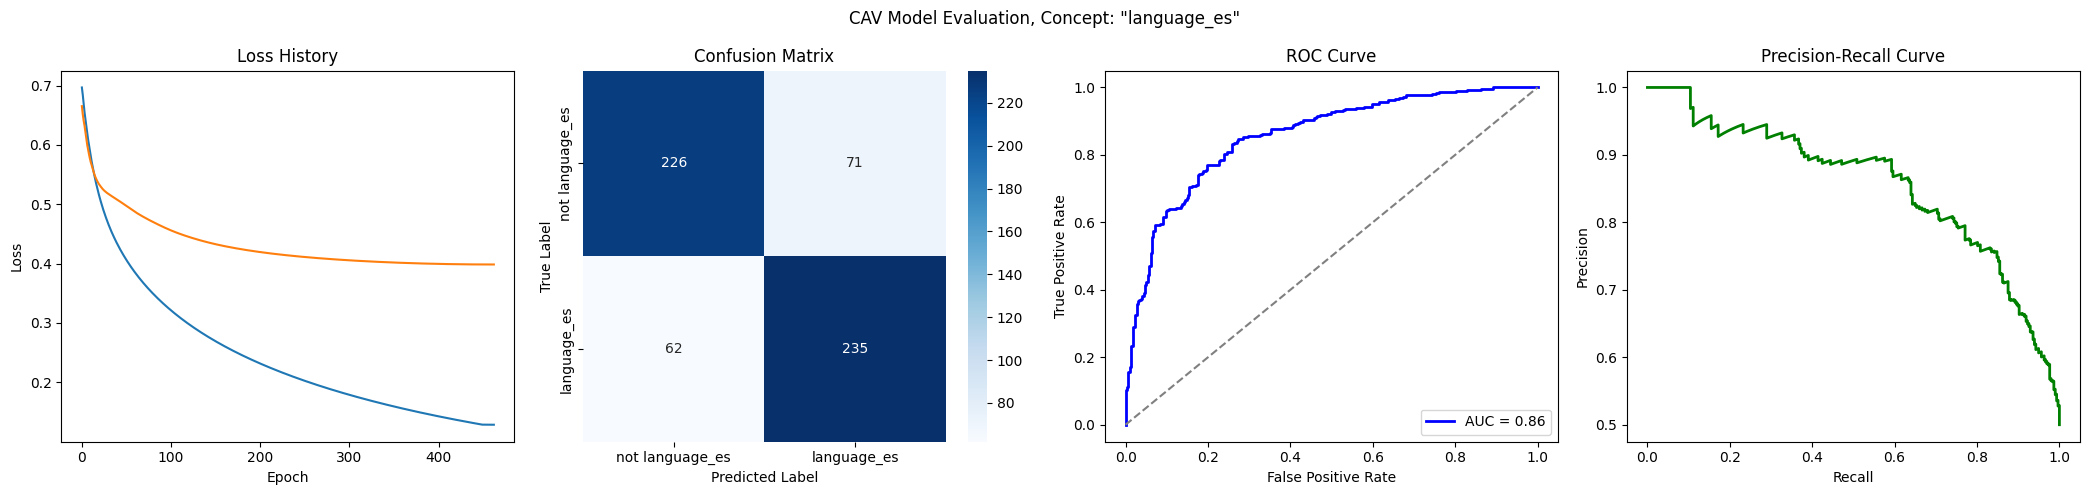


Fitting project: language_es for encoder: muq_mulan_large
Epoch 1/5000
Epoch 1 Train Loss: 0.6930
Epoch 1 Validation Loss: 0.6887
Model saved to trainings/language_es/state_dict.pth
Epoch 101/5000
Epoch 101 Train Loss: 0.6057
Epoch 101 Validation Loss: 0.5490
Model saved to trainings/language_es/state_dict.pth
Epoch 201/5000
Epoch 201 Train Loss: 0.5816
Epoch 201 Validation Loss: 0.5253
Model saved to trainings/language_es/state_dict.pth
Epoch 301/5000
Epoch 301 Train Loss: 0.5665
Epoch 301 Validation Loss: 0.5123
Model saved to trainings/language_es/state_dict.pth
Epoch 401/5000
Epoch 401 Train Loss: 0.5556
Epoch 401 Validation Loss: 0.5035
Model saved to trainings/language_es/state_dict.pth
Epoch 501/5000
Epoch 501 Train Loss: 0.5470
Epoch 501 Validation Loss: 0.4973
Model saved to trainings/language_es/state_dict.pth
Epoch 601/5000
Epoch 601 Train Loss: 0.5398
Epoch 601 Validation Loss: 0.4929
Model saved to trainings/language_es/state_dict.pth
Epoch 701/5000
Epoch 701 Train Loss: 

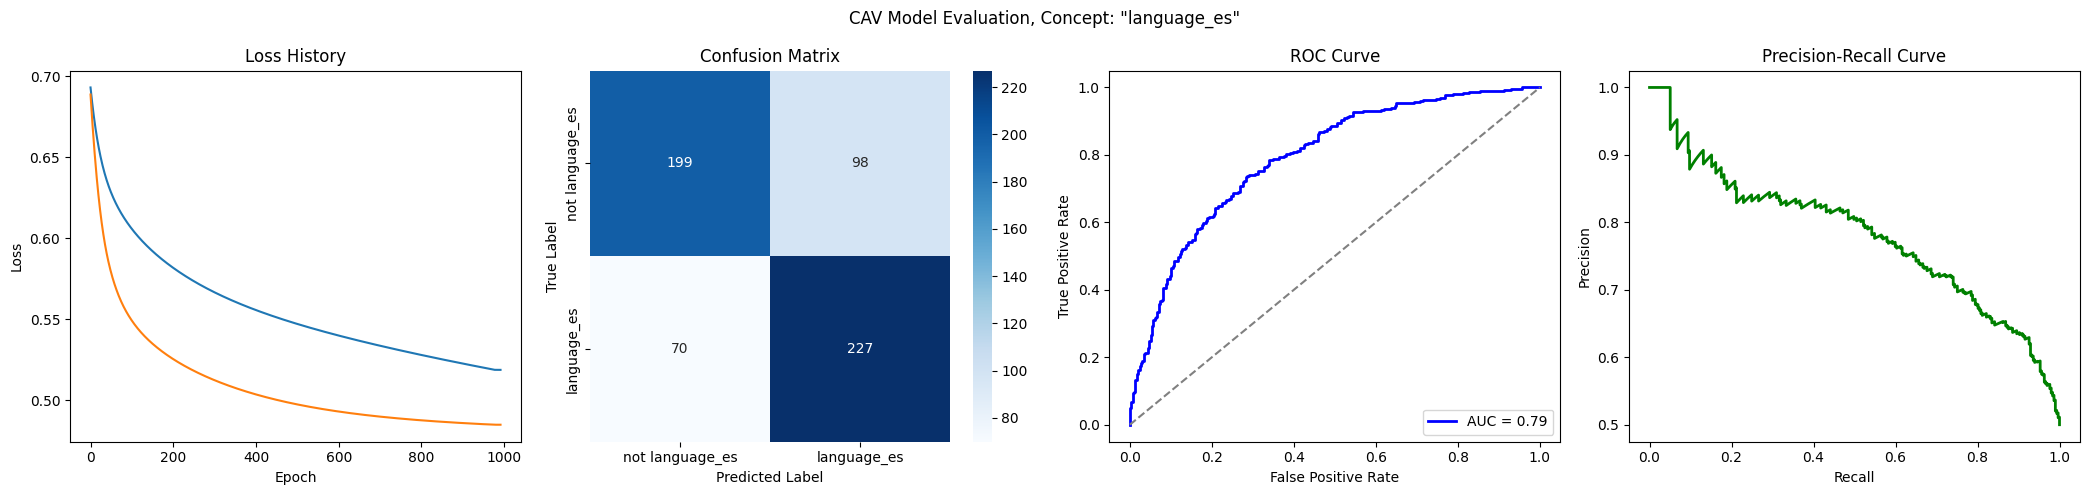


Fitting project: language_fr for encoder: mert_v1_95m
Epoch 1/5000
Epoch 1 Train Loss: 0.6930
Epoch 1 Validation Loss: 0.6924
Model saved to trainings/language_fr/state_dict.pth
Early stopping at epoch 21
Loss history saved to trainings/language_fr/loss_history.json


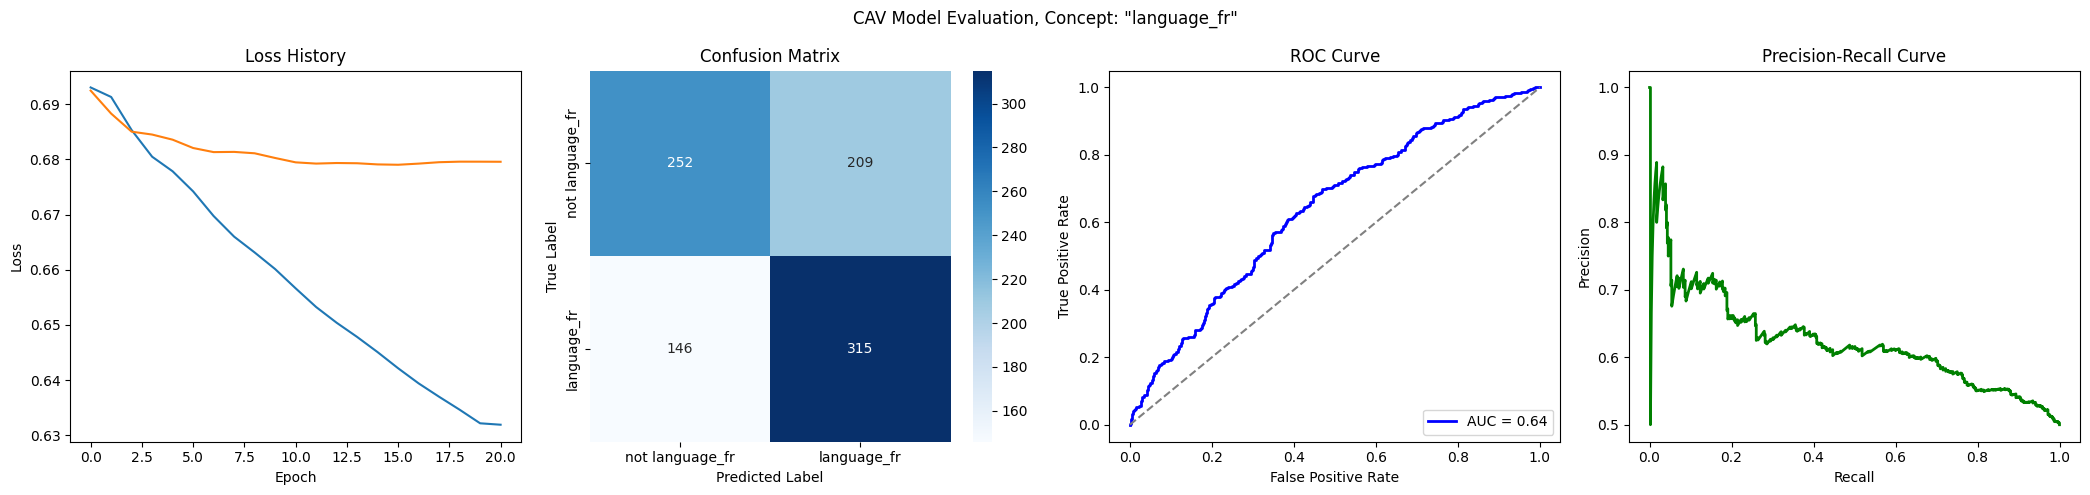


Fitting project: language_fr for encoder: whisper_large_v2
Epoch 1/5000
Epoch 1 Train Loss: 0.6878
Epoch 1 Validation Loss: 0.6536
Model saved to trainings/language_fr/state_dict.pth
Epoch 101/5000
Epoch 101 Train Loss: 0.0547
Epoch 101 Validation Loss: 0.1382
Model saved to trainings/language_fr/state_dict.pth
Early stopping at epoch 172
Loss history saved to trainings/language_fr/loss_history.json


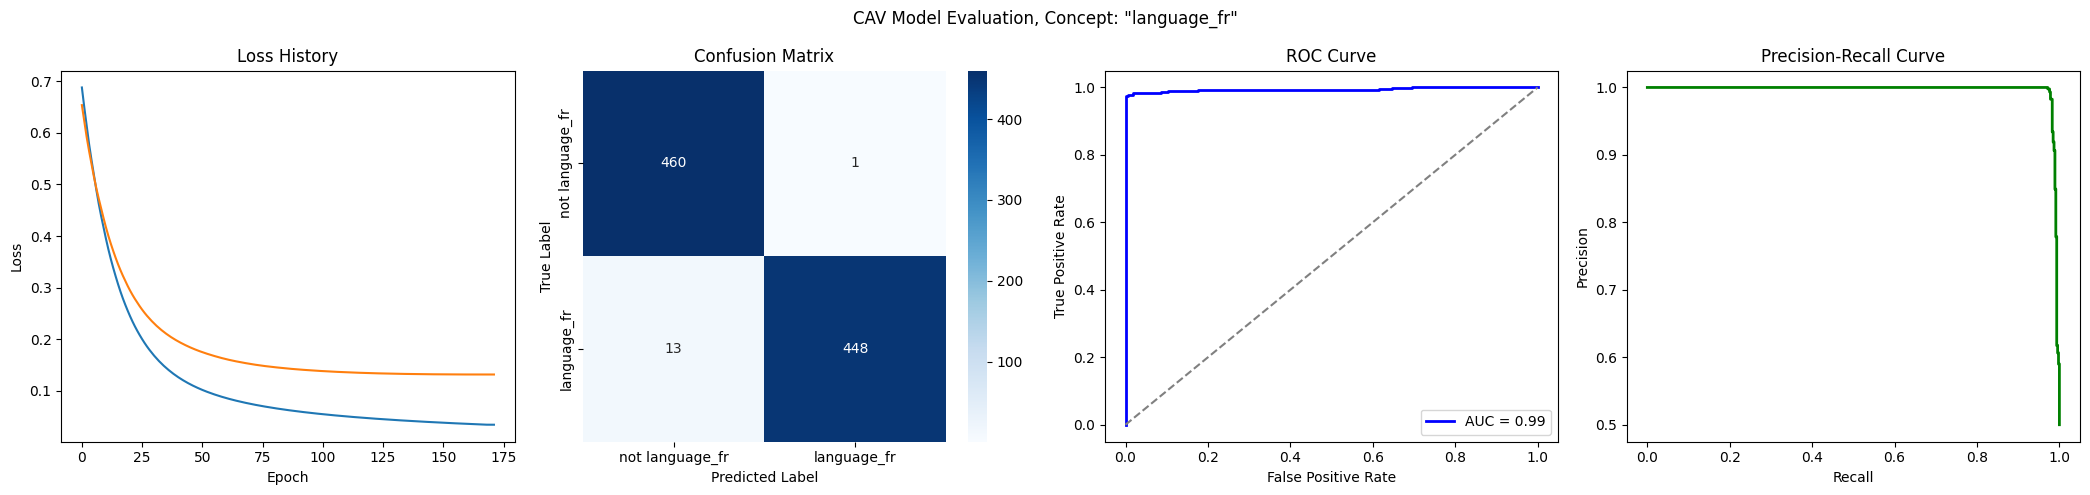


Fitting project: language_fr for encoder: muq_large_msd
Epoch 1/5000
Epoch 1 Train Loss: 0.6929
Epoch 1 Validation Loss: 0.6735
Model saved to trainings/language_fr/state_dict.pth
Early stopping at epoch 93
Loss history saved to trainings/language_fr/loss_history.json


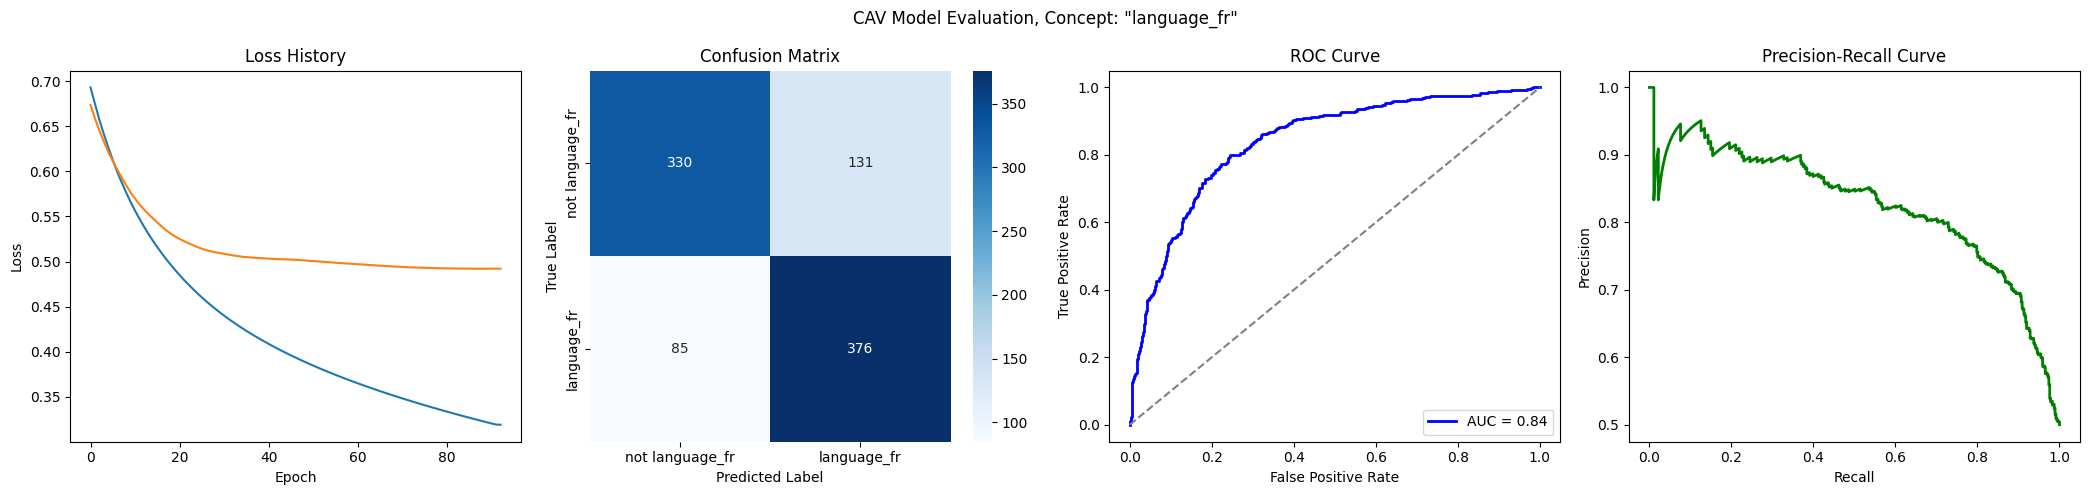


Fitting project: language_fr for encoder: muq_mulan_large
Epoch 1/5000
Epoch 1 Train Loss: 0.6950
Epoch 1 Validation Loss: 0.6904
Model saved to trainings/language_fr/state_dict.pth
Epoch 101/5000
Epoch 101 Train Loss: 0.5681
Epoch 101 Validation Loss: 0.6007
Model saved to trainings/language_fr/state_dict.pth
Early stopping at epoch 189
Loss history saved to trainings/language_fr/loss_history.json


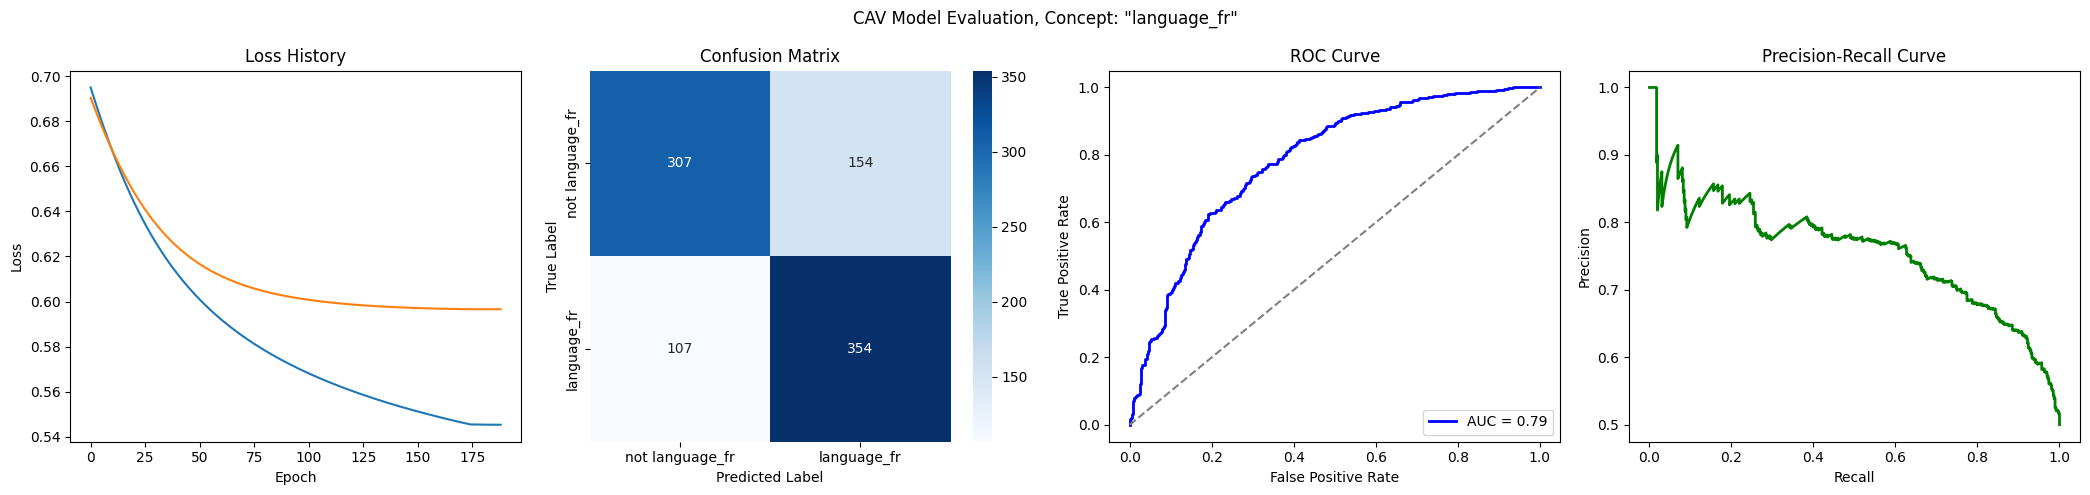


Fitting project: language_it for encoder: mert_v1_95m
Epoch 1/5000
Epoch 1 Train Loss: 0.6949
Epoch 1 Validation Loss: 0.6927
Model saved to trainings/language_it/state_dict.pth
Epoch 101/5000
Epoch 101 Train Loss: 0.4909
Epoch 101 Validation Loss: 0.6157
Model saved to trainings/language_it/state_dict.pth
Epoch 201/5000
Epoch 201 Train Loss: 0.4150
Epoch 201 Validation Loss: 0.6074
Early stopping at epoch 209
Loss history saved to trainings/language_it/loss_history.json


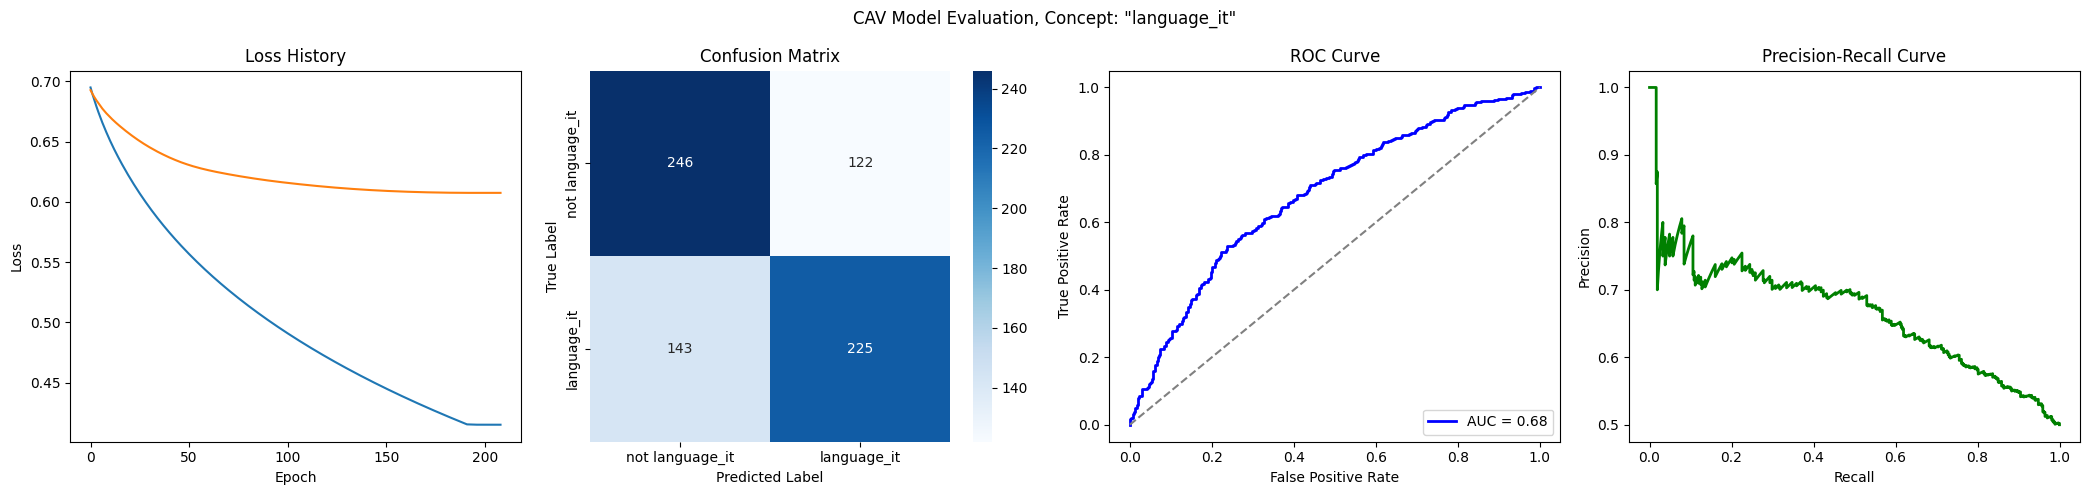


Fitting project: language_it for encoder: whisper_large_v2
Epoch 1/5000
Epoch 1 Train Loss: 0.6999
Epoch 1 Validation Loss: 0.6689
Model saved to trainings/language_it/state_dict.pth
Epoch 101/5000
Epoch 101 Train Loss: 0.0653
Epoch 101 Validation Loss: 0.0889
Model saved to trainings/language_it/state_dict.pth
Epoch 201/5000
Epoch 201 Train Loss: 0.0327
Epoch 201 Validation Loss: 0.0649
Model saved to trainings/language_it/state_dict.pth
Epoch 301/5000
Epoch 301 Train Loss: 0.0206
Epoch 301 Validation Loss: 0.0567
Model saved to trainings/language_it/state_dict.pth
Epoch 401/5000
Epoch 401 Train Loss: 0.0144
Epoch 401 Validation Loss: 0.0527
Model saved to trainings/language_it/state_dict.pth
Epoch 501/5000
Epoch 501 Train Loss: 0.0107
Epoch 501 Validation Loss: 0.0504
Model saved to trainings/language_it/state_dict.pth
Epoch 601/5000
Epoch 601 Train Loss: 0.0083
Epoch 601 Validation Loss: 0.0490
Model saved to trainings/language_it/state_dict.pth
Epoch 701/5000
Epoch 701 Train Loss:

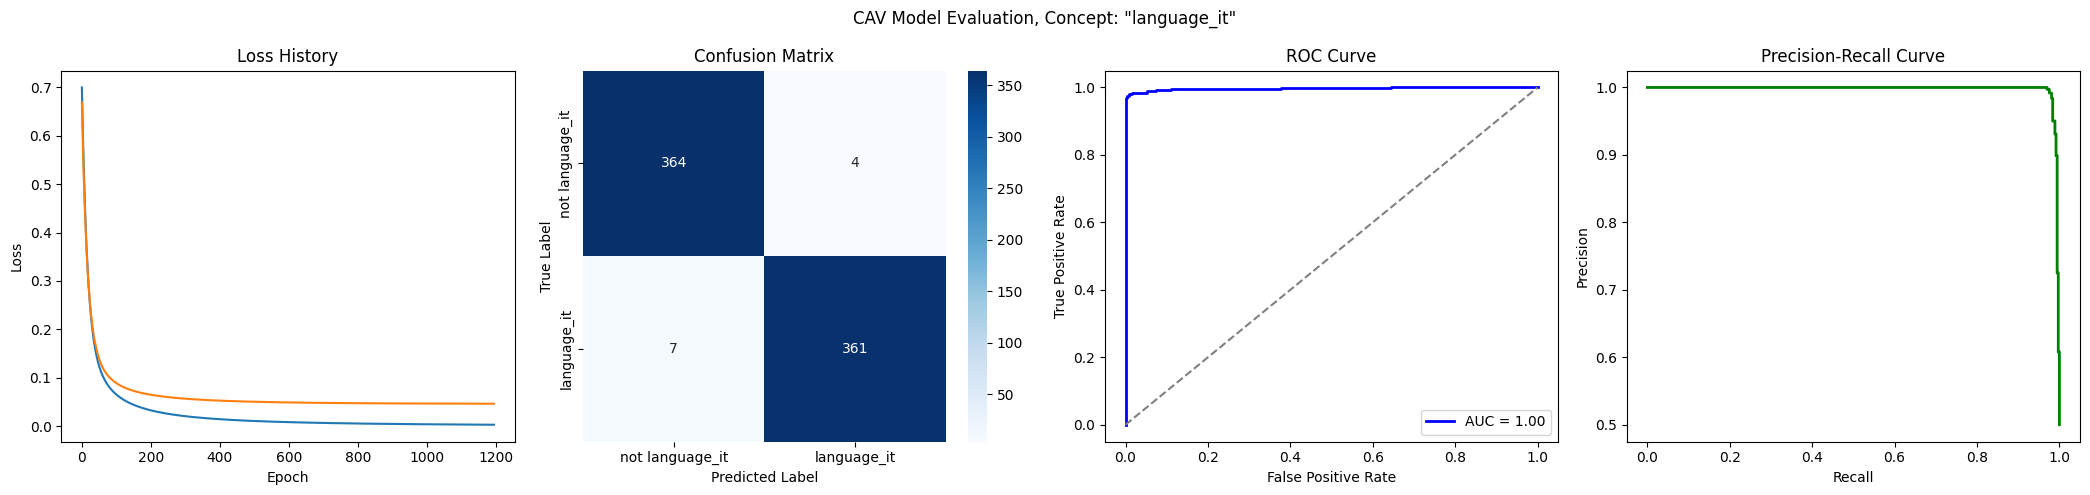


Fitting project: language_it for encoder: muq_large_msd
Epoch 1/5000
Epoch 1 Train Loss: 0.6960
Epoch 1 Validation Loss: 0.6777
Model saved to trainings/language_it/state_dict.pth
Epoch 101/5000
Epoch 101 Train Loss: 0.3163
Epoch 101 Validation Loss: 0.4715
Model saved to trainings/language_it/state_dict.pth
Early stopping at epoch 148
Loss history saved to trainings/language_it/loss_history.json


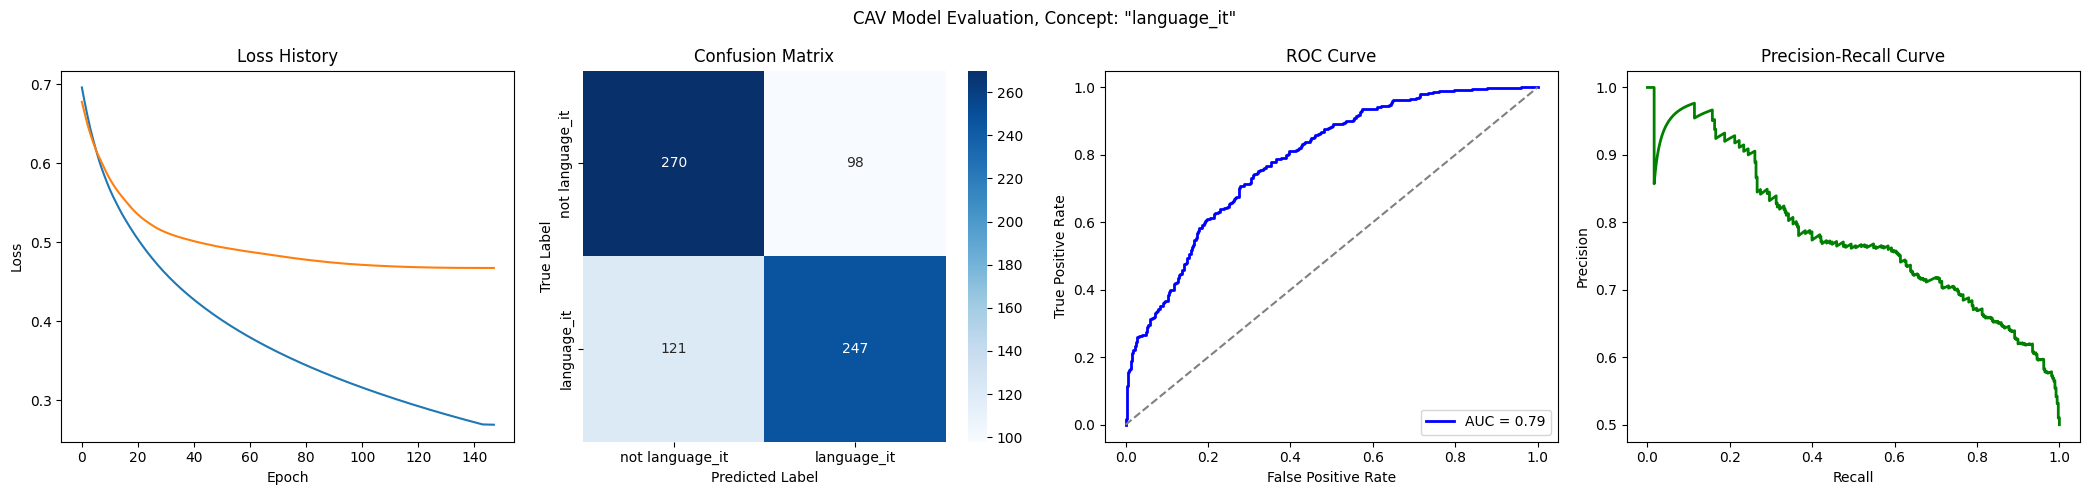


Fitting project: language_it for encoder: muq_mulan_large
Epoch 1/5000
Epoch 1 Train Loss: 0.6927
Epoch 1 Validation Loss: 0.6907
Model saved to trainings/language_it/state_dict.pth
Epoch 101/5000
Epoch 101 Train Loss: 0.5896
Epoch 101 Validation Loss: 0.5993
Model saved to trainings/language_it/state_dict.pth
Epoch 201/5000
Epoch 201 Train Loss: 0.5580
Epoch 201 Validation Loss: 0.5768
Model saved to trainings/language_it/state_dict.pth
Epoch 301/5000
Epoch 301 Train Loss: 0.5410
Epoch 301 Validation Loss: 0.5682
Model saved to trainings/language_it/state_dict.pth
Epoch 401/5000
Epoch 401 Train Loss: 0.5303
Epoch 401 Validation Loss: 0.5651
Model saved to trainings/language_it/state_dict.pth
Early stopping at epoch 430
Loss history saved to trainings/language_it/loss_history.json


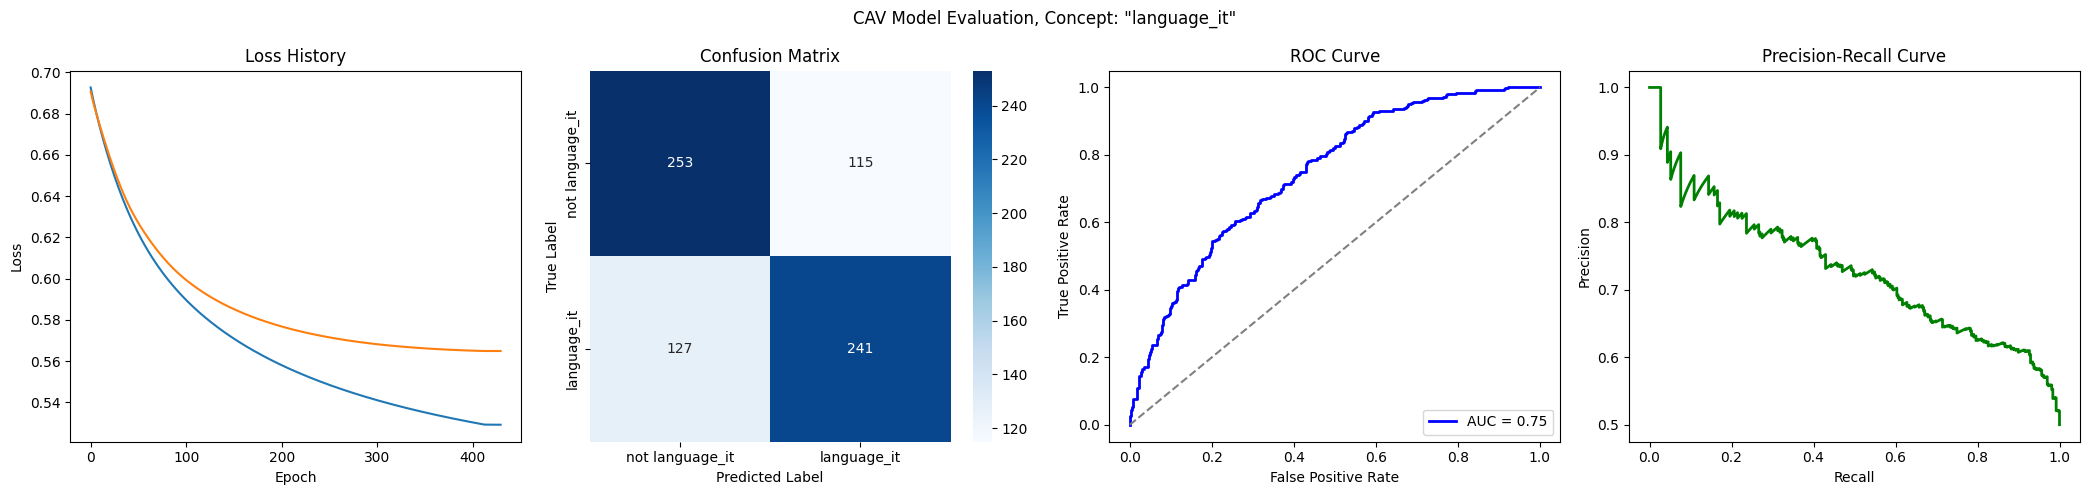


Fitting project: language_ja for encoder: mert_v1_95m
Epoch 1/5000
Epoch 1 Train Loss: 0.6964
Epoch 1 Validation Loss: 0.6879
Model saved to trainings/language_ja/state_dict.pth
Epoch 101/5000
Epoch 101 Train Loss: 0.4003
Epoch 101 Validation Loss: 0.4122
Model saved to trainings/language_ja/state_dict.pth
Epoch 201/5000
Epoch 201 Train Loss: 0.3137
Epoch 201 Validation Loss: 0.3693
Model saved to trainings/language_ja/state_dict.pth
Epoch 301/5000
Epoch 301 Train Loss: 0.2629
Epoch 301 Validation Loss: 0.3540
Model saved to trainings/language_ja/state_dict.pth
Epoch 401/5000
Epoch 401 Train Loss: 0.2278
Epoch 401 Validation Loss: 0.3483
Model saved to trainings/language_ja/state_dict.pth
Early stopping at epoch 490
Loss history saved to trainings/language_ja/loss_history.json


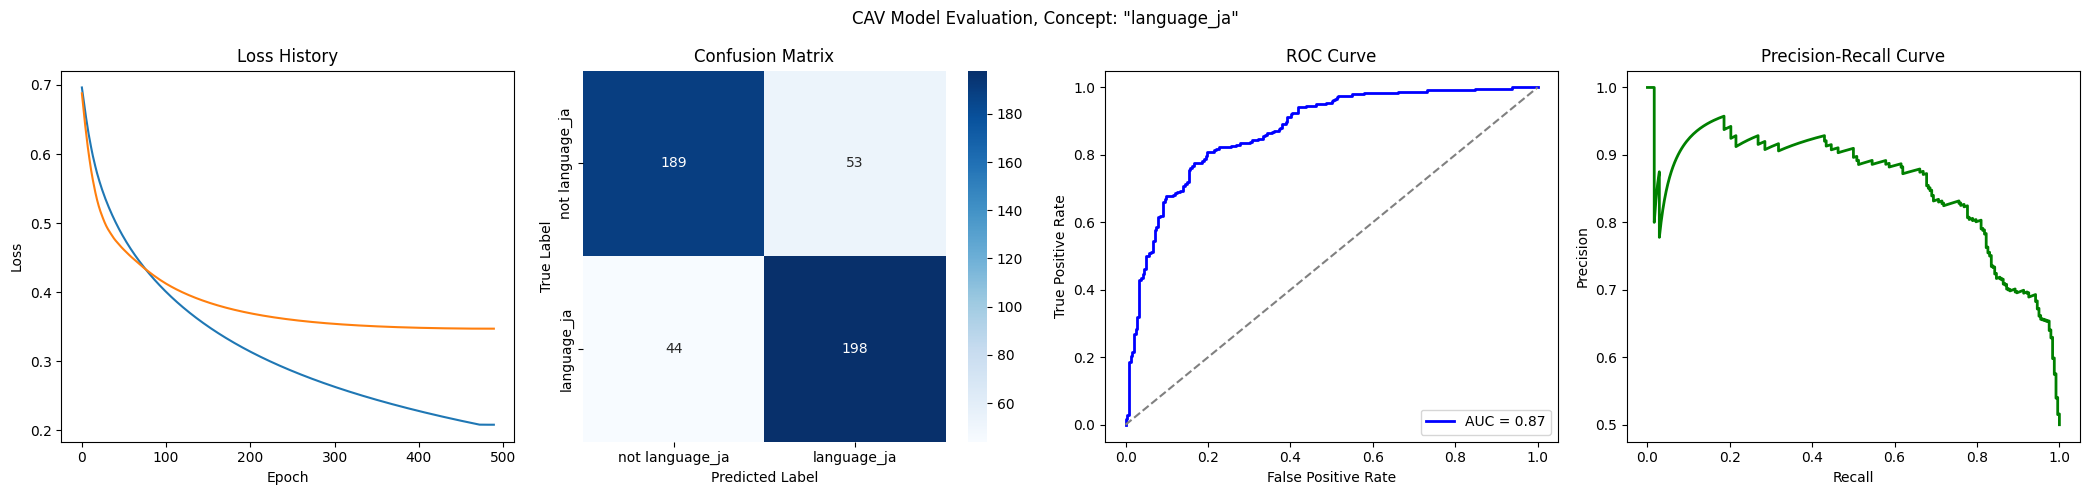


Fitting project: language_ja for encoder: whisper_large_v2
Epoch 1/5000
Epoch 1 Train Loss: 0.6949
Epoch 1 Validation Loss: 0.6336
Model saved to trainings/language_ja/state_dict.pth
Epoch 101/5000
Epoch 101 Train Loss: 0.0615
Epoch 101 Validation Loss: 0.0822
Model saved to trainings/language_ja/state_dict.pth
Epoch 201/5000
Epoch 201 Train Loss: 0.0391
Epoch 201 Validation Loss: 0.0695
Model saved to trainings/language_ja/state_dict.pth
Epoch 301/5000
Epoch 301 Train Loss: 0.0276
Epoch 301 Validation Loss: 0.0638
Model saved to trainings/language_ja/state_dict.pth
Epoch 401/5000
Epoch 401 Train Loss: 0.0205
Epoch 401 Validation Loss: 0.0608
Model saved to trainings/language_ja/state_dict.pth
Epoch 501/5000
Epoch 501 Train Loss: 0.0157
Epoch 501 Validation Loss: 0.0593
Model saved to trainings/language_ja/state_dict.pth
Epoch 601/5000
Epoch 601 Train Loss: 0.0124
Epoch 601 Validation Loss: 0.0586
Model saved to trainings/language_ja/state_dict.pth
Early stopping at epoch 677
Loss his

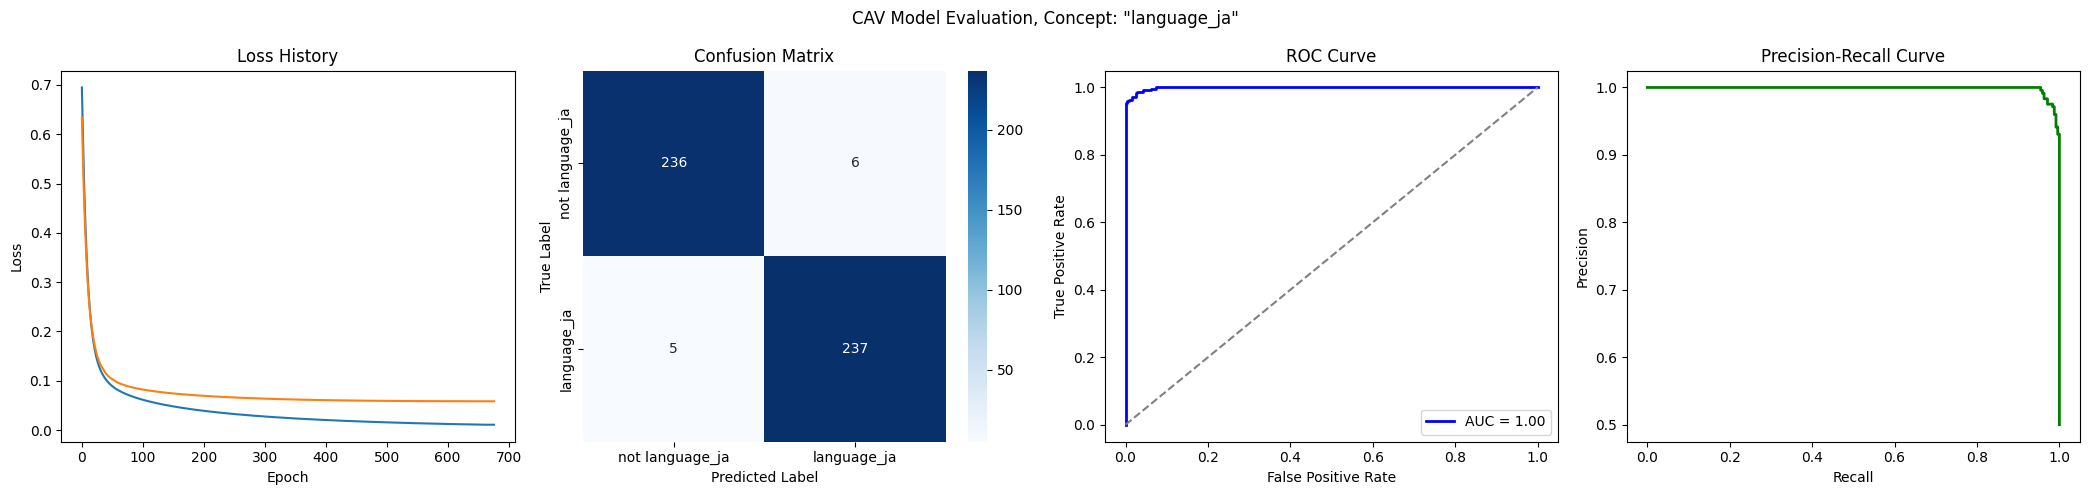


Fitting project: language_ja for encoder: muq_large_msd
Epoch 1/5000
Epoch 1 Train Loss: 0.7119
Epoch 1 Validation Loss: 0.6533
Model saved to trainings/language_ja/state_dict.pth
Epoch 101/5000
Epoch 101 Train Loss: 0.1515
Epoch 101 Validation Loss: 0.2613
Model saved to trainings/language_ja/state_dict.pth
Epoch 201/5000
Epoch 201 Train Loss: 0.0946
Epoch 201 Validation Loss: 0.2528
Model saved to trainings/language_ja/state_dict.pth
Early stopping at epoch 206
Loss history saved to trainings/language_ja/loss_history.json


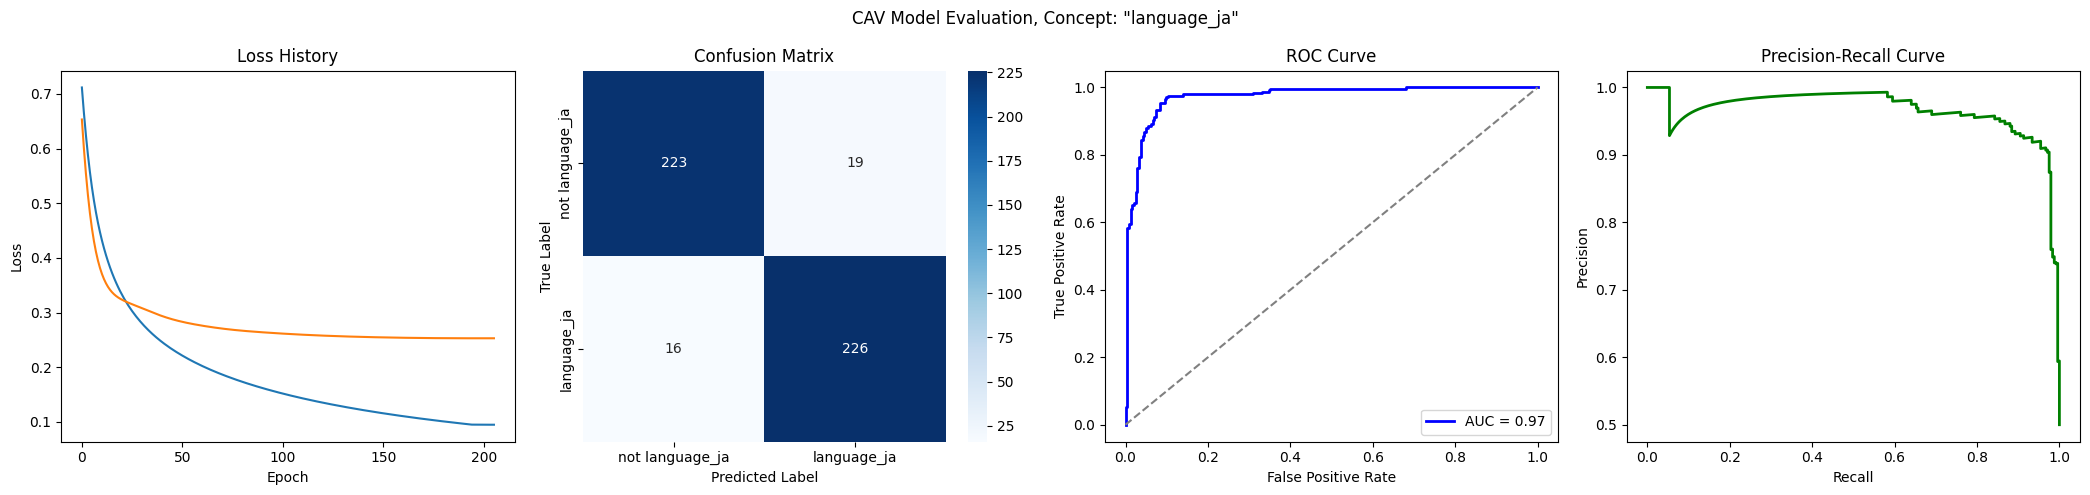


Fitting project: language_ja for encoder: muq_mulan_large
Epoch 1/5000
Epoch 1 Train Loss: 0.6921
Epoch 1 Validation Loss: 0.6877
Model saved to trainings/language_ja/state_dict.pth
Epoch 101/5000
Epoch 101 Train Loss: 0.4728
Epoch 101 Validation Loss: 0.4586
Model saved to trainings/language_ja/state_dict.pth
Epoch 201/5000
Epoch 201 Train Loss: 0.4029
Epoch 201 Validation Loss: 0.3963
Model saved to trainings/language_ja/state_dict.pth
Epoch 301/5000
Epoch 301 Train Loss: 0.3686
Epoch 301 Validation Loss: 0.3698
Model saved to trainings/language_ja/state_dict.pth
Epoch 401/5000
Epoch 401 Train Loss: 0.3477
Epoch 401 Validation Loss: 0.3551
Model saved to trainings/language_ja/state_dict.pth
Epoch 501/5000
Epoch 501 Train Loss: 0.3330
Epoch 501 Validation Loss: 0.3449
Model saved to trainings/language_ja/state_dict.pth
Epoch 601/5000
Epoch 601 Train Loss: 0.3218
Epoch 601 Validation Loss: 0.3366
Model saved to trainings/language_ja/state_dict.pth
Epoch 701/5000
Epoch 701 Train Loss: 

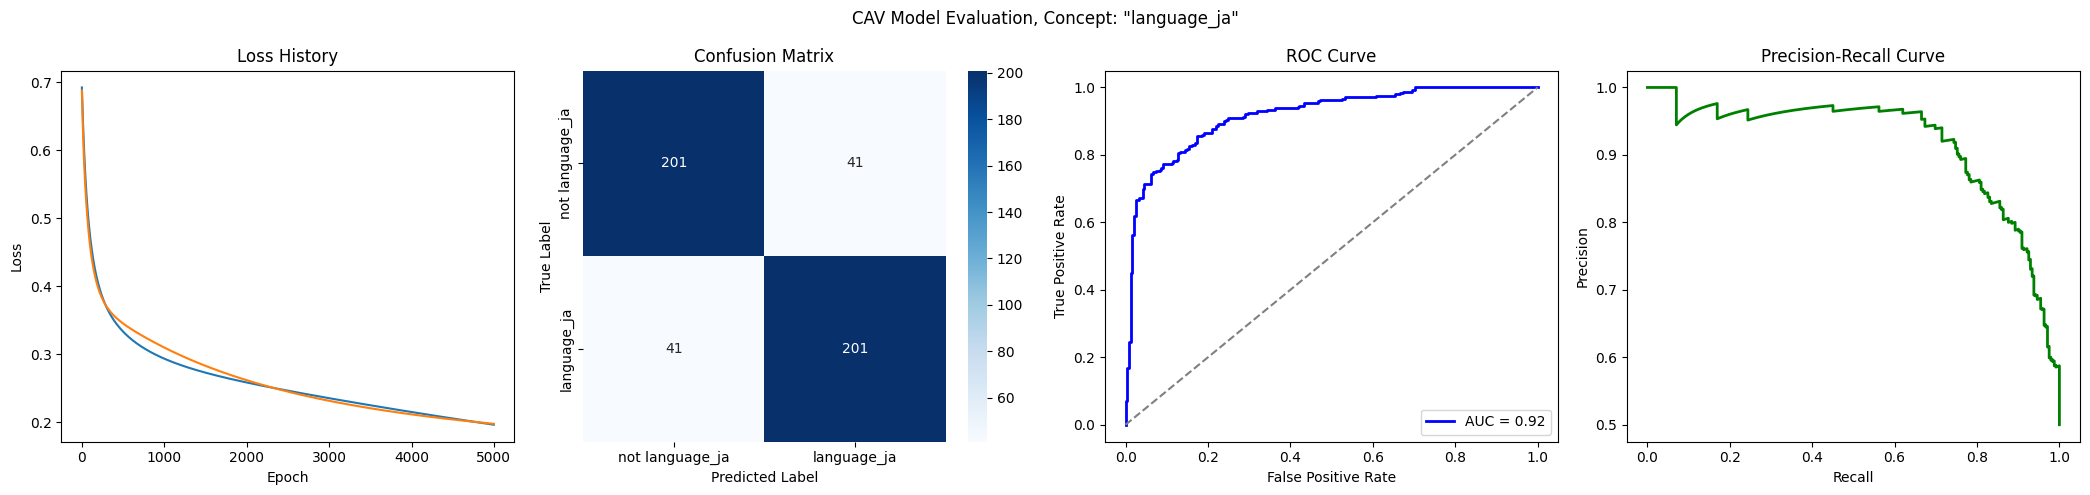


Fitting project: language_pt for encoder: mert_v1_95m
Epoch 1/5000
Epoch 1 Train Loss: 0.6949
Epoch 1 Validation Loss: 0.6914
Model saved to trainings/language_pt/state_dict.pth
Early stopping at epoch 92
Loss history saved to trainings/language_pt/loss_history.json


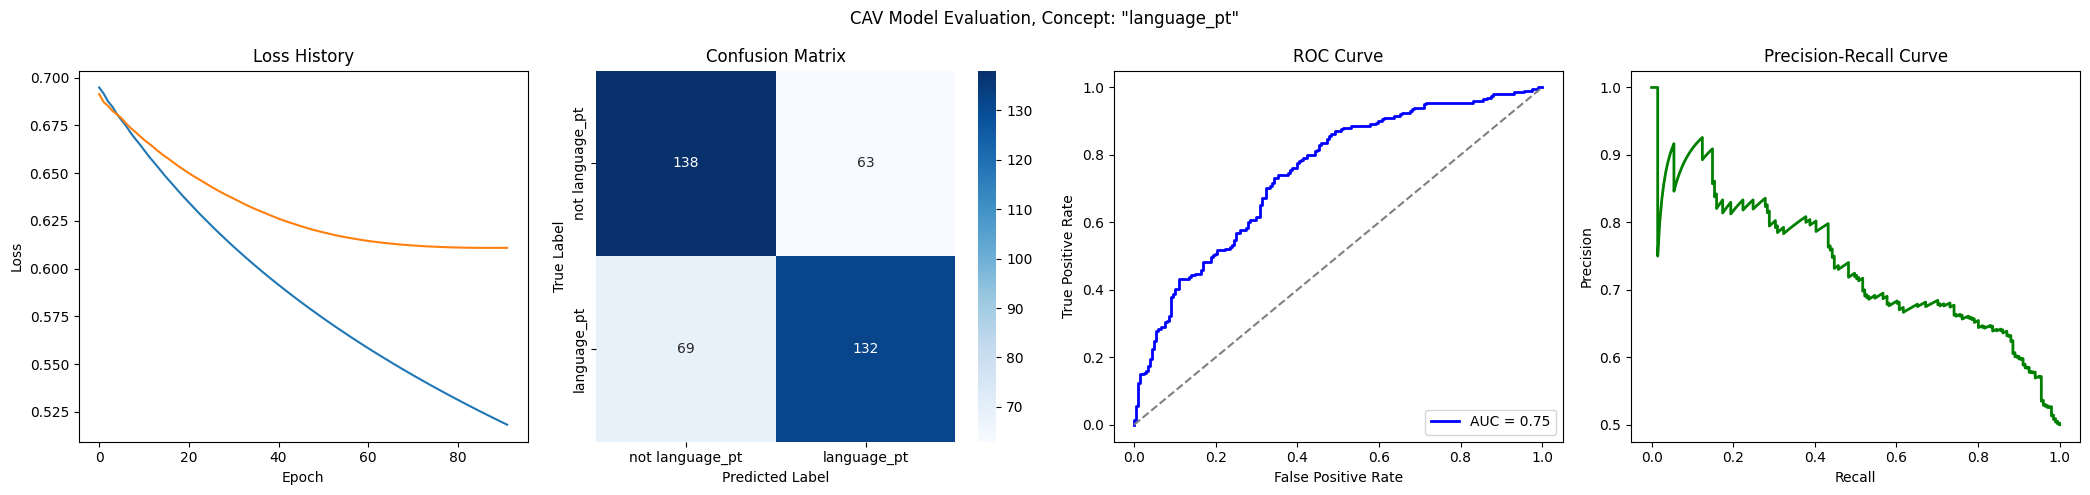


Fitting project: language_pt for encoder: whisper_large_v2
Epoch 1/5000
Epoch 1 Train Loss: 0.6935
Epoch 1 Validation Loss: 0.6681
Model saved to trainings/language_pt/state_dict.pth
Epoch 101/5000
Epoch 101 Train Loss: 0.0670
Epoch 101 Validation Loss: 0.0641
Model saved to trainings/language_pt/state_dict.pth
Epoch 201/5000
Epoch 201 Train Loss: 0.0383
Epoch 201 Validation Loss: 0.0365
Model saved to trainings/language_pt/state_dict.pth
Epoch 301/5000
Epoch 301 Train Loss: 0.0256
Epoch 301 Validation Loss: 0.0297
Model saved to trainings/language_pt/state_dict.pth
Epoch 401/5000
Epoch 401 Train Loss: 0.0179
Epoch 401 Validation Loss: 0.0274
Model saved to trainings/language_pt/state_dict.pth
Epoch 501/5000
Epoch 501 Train Loss: 0.0130
Epoch 501 Validation Loss: 0.0258
Model saved to trainings/language_pt/state_dict.pth
Epoch 601/5000
Epoch 601 Train Loss: 0.0099
Epoch 601 Validation Loss: 0.0246
Model saved to trainings/language_pt/state_dict.pth
Epoch 701/5000
Epoch 701 Train Loss:

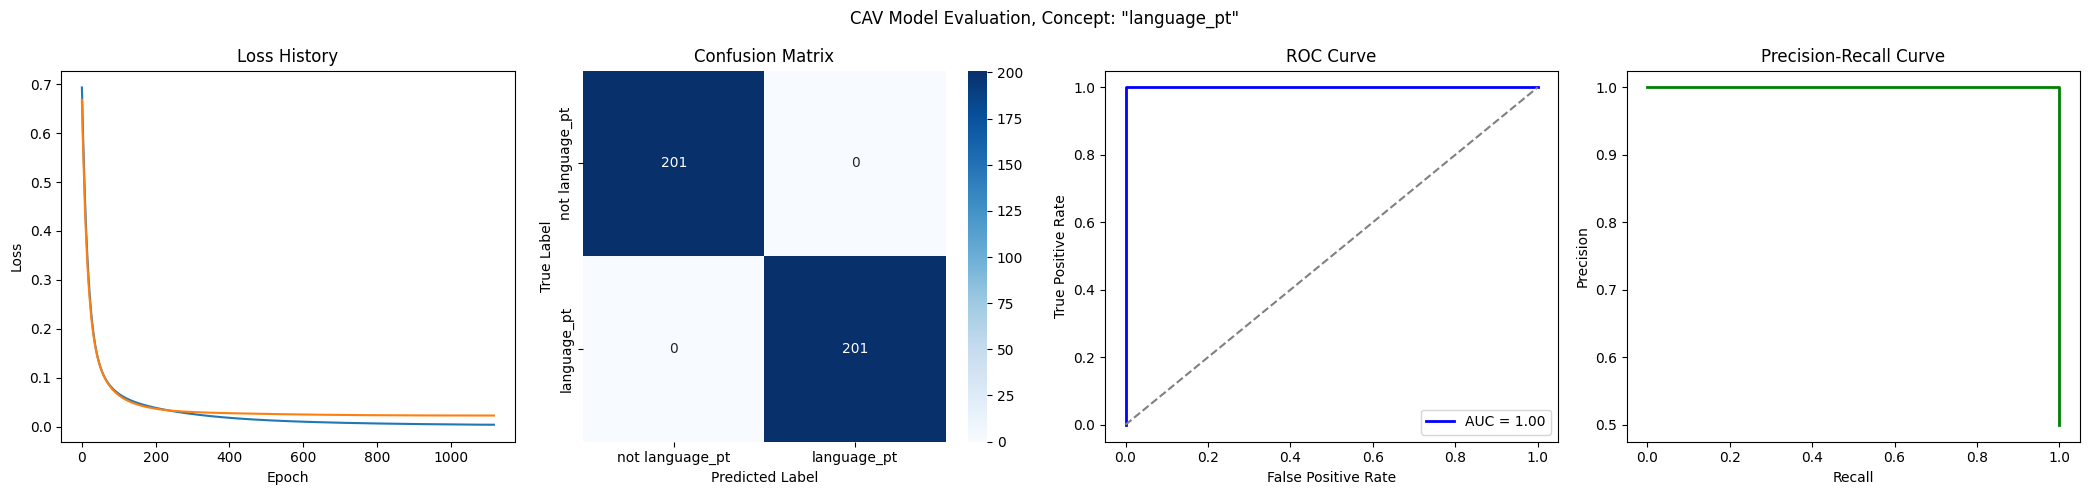


Fitting project: language_pt for encoder: muq_large_msd
Epoch 1/5000
Epoch 1 Train Loss: 0.6921
Epoch 1 Validation Loss: 0.6775
Model saved to trainings/language_pt/state_dict.pth
Epoch 101/5000
Epoch 101 Train Loss: 0.2545
Epoch 101 Validation Loss: 0.4916
Model saved to trainings/language_pt/state_dict.pth
Epoch 201/5000
Epoch 201 Train Loss: 0.1694
Epoch 201 Validation Loss: 0.4837
Model saved to trainings/language_pt/state_dict.pth
Early stopping at epoch 228
Loss history saved to trainings/language_pt/loss_history.json


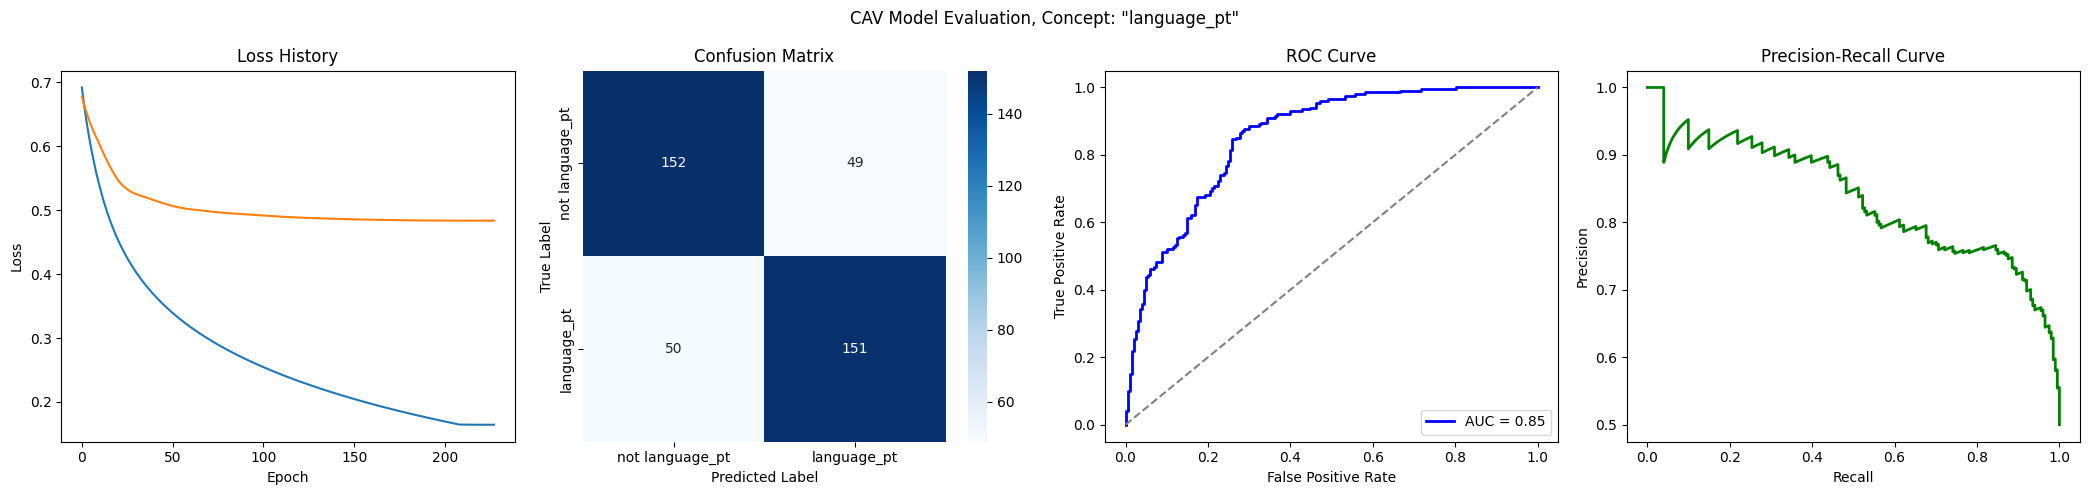


Fitting project: language_pt for encoder: muq_mulan_large
Epoch 1/5000
Epoch 1 Train Loss: 0.6921
Epoch 1 Validation Loss: 0.6905
Model saved to trainings/language_pt/state_dict.pth
Epoch 101/5000
Epoch 101 Train Loss: 0.5768
Epoch 101 Validation Loss: 0.6223
Model saved to trainings/language_pt/state_dict.pth
Epoch 201/5000
Epoch 201 Train Loss: 0.5421
Epoch 201 Validation Loss: 0.5986
Model saved to trainings/language_pt/state_dict.pth
Epoch 301/5000
Epoch 301 Train Loss: 0.5222
Epoch 301 Validation Loss: 0.5883
Model saved to trainings/language_pt/state_dict.pth
Epoch 401/5000
Epoch 401 Train Loss: 0.5084
Epoch 401 Validation Loss: 0.5825
Model saved to trainings/language_pt/state_dict.pth
Epoch 501/5000
Epoch 501 Train Loss: 0.4978
Epoch 501 Validation Loss: 0.5792
Model saved to trainings/language_pt/state_dict.pth
Early stopping at epoch 588
Loss history saved to trainings/language_pt/loss_history.json


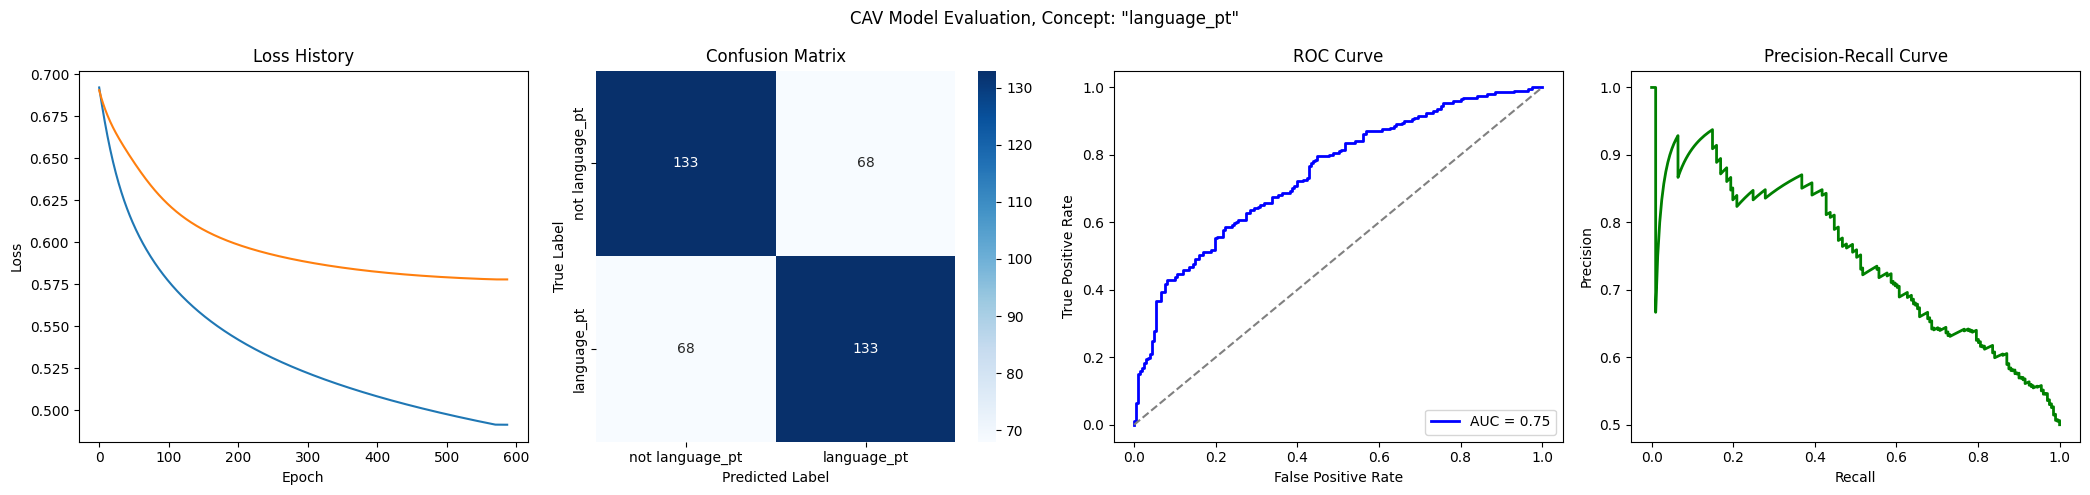

In [ ]:
train_variations = [*itertools.product(project_names, encoder_ids)]


for project_name, (encoder_id, embedding_dim) in train_variations:
    print(f"\nFitting project: {project_name} for encoder: {encoder_id}")
    df = load_df_and_embeddings(
        project_name, "train", encoder_id, dataset_prefix, embedding_prefix, s3
    )

    training_sample_count = int(len(df) * train_val_split)
    validation_sample_count = len(df) - training_sample_count

    df_test = load_df_and_embeddings(
        project_name, "test", encoder_id, dataset_prefix, embedding_prefix, s3
    )

    cav_vector, evaluation_metric = train_one_cav(
        random_state=0,
        df=df,
        project_name=project_name,
        training_sample_count=training_sample_count,
        validation_sample_count=validation_sample_count,
        epochs=epochs,
        learning_rate=learning_rate,
        embedding_dim=embedding_dim,
        dropout_rate=dropout_rate,
        df_test=df_test,
    )

    store_cav_vector_array(
        evaluation_metric,
        f"cav_full_{project_name}.npy",
        encoder_id,
        project_name,
    )
    store_evaluation_metrics(
        evaluation_metric,
        f"evaluation_metrics_full_{project_name}.json",
        encoder_id,
        project_name,
    )